# Предсказание увольнения сотрудника

Необходимо создать модели для предсказания удовлетворённостью работой и вероятностью увольнения сотрудников.

## Цель
С помощью модели необходимо предсказывать удовлетворённость и вероятность ухода из компании сотрудников:
 - выбрать алгоритм и обучить модель регрессии, предсказвающую удовлетворённость сотрудника своим местом работы;
 - выбрать алгоритм и обучить модель классификации, предсказывающую увольнение сотрундика;
 - исследовать связь удовлетворённости рабочим местом и вероятностью его увольнения
 - построить основную уточнённую модель предсказания вероятности увольнения сотрудника 
 - дать рекомендации по повышению удовлетворённости сотрудников работой и их удержанию в компании

## Описание данных:
### Характеристики сотрудника
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.
### Увольнение сотрудника
- `id` — уникальный идентификатор сотрудника;
- `quit` — признак увольнения сотрудника.

## План исследования

1) Предобработка данных
2) Исследовательский анализ данных
3) Корреляционный анализ
4) Построение пайплайнов для выбора лучшей модели регрессии
5) Анализ важности признаков регрессии
6) Создание personality уволившегося сотрудника 
6) Построение основной уточнённой модели предсказания вероятности увольнения сотрудника
7) Анализ важности признаков улучшенной модели
8) Предложения по повышению удовлетворённости сотрудников работой и их удержанию в компании
9) Общий вывод

##  Предобработка данных

### Импорт модулей

In [1]:
pip install phik==0.12.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy==1.8.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib==3.5.2

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imbalanced-learn==0.12.3

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns
from typing import Optional
import random
import phik
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from statsmodels.tools.tools import add_constant
import warnings
from scipy.stats import ttest_ind

Подавим вывод предупреждения для экономии места в завершённом проекте

In [7]:
warnings.filterwarnings('ignore')

Определение констант

In [8]:
RANDOM_STATE = 1
NUM_BINS = 60  

Загрузка данных

In [9]:
try:
    X_test = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Composite_Project_2_HR_Analytics\source\test_features.csv")
    y_test_classif = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Composite_Project_2_HR_Analytics\source\test_target_quit.csv")
    y_test_regress = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Composite_Project_2_HR_Analytics\source\test_target_job_satisfaction_rate.csv")
    X_train_js = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Composite_Project_2_HR_Analytics\source\train_job_satisfaction_rate.csv")
    X_train_q = pd.read_csv(r"C:\Users\yka\Documents\Practicum\DS_Practicum\Composite_Project_2_HR_Analytics\source\train_quit.csv")
except:
    X_test = pd.read_csv(r"/datasets/test_features.csv")
    y_test_classif = pd.read_csv(r"/datasets/test_target_quit.csv")
    y_test_regress = pd.read_csv(r"/datasets/test_target_job_satisfaction_rate.csv")
    X_train_js = pd.read_csv(r"/datasets/train_job_satisfaction_rate.csv")
    X_train_q = pd.read_csv(r"/datasets/train_quit.csv")

pd.set_option('display.max_columns', None)

display(X_test.head(20))
display(y_test_classif.head(20))
display(y_test_regress.head(20))
display(X_train_js.head(20))
display(X_train_q.head(20))

id        dept   level workload  employment_years last_year_promo  \
0   485046   marketing  junior   medium                 2              no   
1   686555          hr  junior   medium                 1              no   
2   467458       sales  middle      low                 5              no   
3   418655       sales  middle      low                 6              no   
4   789145          hr  middle   medium                 5              no   
5   429973  purchasing  middle   medium                 6              no   
6   850699  technology  junior   medium                 3              no   
7   500791       sales  middle     high                 9              no   
8   767867   marketing  middle     high                 3              no   
9   937235       sales  junior   medium                 1              no   
10  354261  technology  junior      low                 3              no   
11  473072          hr  middle   medium                 1              no   
12  984128       sales  middle   medium                 5              no   
13  252146   marketing  middle      low                 7              no   
14  838149  technology  middle   medium                 4             yes   
15  590867   marketing  junior                          4              no   
16  849959  technology  middle      low                 2              no   
17  780847       sales  junior      low                 1              no   
18  335909          hr  junior      low                 1              no   
19  179164  technology  sinior   medium                 8              no   

   last_year_violations  supervisor_evaluation  salary  
0                    no                      5   28800  
1                    no                      4   30000  
2                    no                      4   19200  
3                    no                      4   19200  
4                    no                      5   40800  
5                    no                      3   42000  
6                    no                      3   26400  
7                    no                      4   49200  
8                   yes                      4   62400  
9                   yes                      3   26400  
10                   no                      3   14400  
11                   no                      4   36000  
12                   no                      3   33600  
13                  yes                      1   19200  
14                   no                      2   44400  
15                   no                      4   28800  
16                   no                      4   27600  
17                   no                      2   14400  
18                   no                      1   12000  
19                   no                      4   64800

id quit
0   999029  yes
1   372846   no
2   726767   no
3   490105   no
4   416898  yes
5   223063   no
6   810370   no
7   998900   no
8   578329   no
9   648850   no
10  705199   no
11  867119   no
12  653711   no
13  501821   no
14  509518   no
15  605830   no
16  709750  yes
17  807221   no
18  644517   no
19  484268   no

id  job_satisfaction_rate
0   130604                   0.74
1   825977                   0.75
2   418490                   0.60
3   555320                   0.72
4   826430                   0.08
5   817219                   0.76
6   269033                   0.64
7   962356                   0.38
8   649052                   0.14
9   532834                   0.59
10  436938                   0.91
11  759748                   0.78
12  462750                   0.70
13  120724                   0.79
14  161234                   0.74
15  217807                   0.34
16  311719                   0.81
17  377223                   0.23
18  700796                   0.23
19  304609                   0.40

id        dept   level workload  employment_years last_year_promo  \
0   155278       sales  junior   medium                 2              no   
1   653870          hr  junior     high                 2              no   
2   184592       sales  junior      low                 1              no   
3   171431  technology  junior      low                 4              no   
4   693419          hr  junior   medium                 1              no   
5   405448          hr  middle      low                 7              no   
6   857135       sales  sinior   medium                 9              no   
7   400657  purchasing  middle     high                 9              no   
8   198846          hr  junior      low                 1              no   
9   149797  technology  middle     high                 6              no   
10  964158  purchasing  junior      low                 2              no   
11  784541       sales  middle      low                 3              no   
12  569960       sales  middle   medium                 3              no   
13  381081   marketing  junior     high                 2              no   
14  581188   marketing  middle   medium                 4              no   
15  798010  technology  junior   medium                 3              no   
16  861046          hr  junior   medium                 1              no   
17  955615  purchasing  junior     high                 2              no   
18  848242       sales  middle     high                 2             yes   
19  732462       sales  junior      low                 2              no   

   last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                    no                      1   24000                   0.58  
1                    no                      5   38400                   0.76  
2                    no                      2   12000                   0.11  
3                    no                      2   18000                   0.37  
4                    no                      3   22800                   0.20  
5                    no                      4   30000                   0.78  
6                    no                      3   56400                   0.56  
7                    no                      3   52800                   0.44  
8                    no                      2   13200                   0.14  
9                    no                      3   54000                   0.47  
10                   no                      4   13200                   0.74  
11                   no                      4   19200                   0.42  
12                   no                      3   38400                   0.32  
13                   no                      2   40800                   0.57  
14                   no                      2   34800                   0.16  
15                   no                      4   27600                   0.69  
16                   no                      3   26400                   0.33  
17                   no                      5   33600                   0.64  
18                   no                      1   50400                   0.39  
19                  yes                      4   15600                   0.74

id        dept   level workload  employment_years last_year_promo  \
0   723290       sales  middle     high                 2              no   
1   814010       sales  junior   medium                 2              no   
2   155091  purchasing  middle   medium                 5              no   
3   257132       sales  junior   medium                 2              no   
4   910140   marketing  junior   medium                 2              no   
5   699916       sales  junior      low                 1              no   
6   417070  technology  middle   medium                 8              no   
7   165489       sales  middle      low                 4              no   
8   996399   marketing  middle      low                 7              no   
9   613206  technology  middle   medium                 2              no   
10  832644       sales  middle     high                 3              no   
11  260997       sales  middle   medium                 5              no   
12  114153   marketing  junior      low                 3              no   
13  672533   marketing  middle   medium                 3             yes   
14  453936  purchasing  junior   medium                 2              no   
15  741016  technology  junior   medium                 1              no   
16  113657  technology  sinior     high                 5             yes   
17  458930       sales  middle      low                 5              no   
18  999835       sales  junior      low                 5              no   
19  120366          hr  middle      low                 9              no   

   last_year_violations  supervisor_evaluation  salary quit  
0                    no                      4   54000   no  
1                    no                      4   27600   no  
2                    no                      1   37200   no  
3                   yes                      3   24000  yes  
4                    no                      5   25200   no  
5                   yes                      3   18000  yes  
6                    no                      2   44400   no  
7                    no                      5   19200   no  
8                    no                      4   25200   no  
9                    no                      3   45600  yes  
10                   no                      4   57600   no  
11                   no                      3   33600   no  
12                   no                      4   16800   no  
13                  yes                      1   44400   no  
14                   no                      4   22800   no  
15                   no                      4   26400   no  
16                   no                      3   82800   no  
17                   no                      4   24000   no  
18                   no                      4   18000   no  
19                   no                      4   25200   no

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [11]:
y_test_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [12]:
y_test_regress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [13]:
X_train_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [14]:
X_train_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


### Проверим наличие явных дубликатов

In [15]:
def handle_duplicates(dataframe):
    duplicates_count = dataframe.duplicated().sum()

    if duplicates_count > 0:
        dataframe.drop_duplicates(inplace = True)
    
    display(f"Droped {duplicates_count} duplicates.")

In [16]:
handle_duplicates(X_test)
handle_duplicates(y_test_classif)
handle_duplicates(y_test_regress)
handle_duplicates(X_train_js)
handle_duplicates(X_train_q)

'Droped 0 duplicates.'

'Droped 0 duplicates.'

'Droped 0 duplicates.'

'Droped 0 duplicates.'

'Droped 0 duplicates.'

### Преобразуем данные к соответствующим типам

In [17]:
X_test = X_test.astype({"dept": "category", "level" : "category", "workload" : "category", "last_year_promo" : "category", "last_year_violations" : "category"})
y_test_classif = y_test_classif.astype({"quit": "category"})
X_train_js = X_train_js.astype({"dept": "category", "level" : "category", "workload" : "category", "last_year_promo" : "category", "last_year_violations" : "category"})
X_train_q = X_train_q.astype({"dept": "category", "level" : "category", "workload" : "category", "last_year_promo" : "category", "last_year_violations" : "category", "quit": "category"})

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     2000 non-null   int64   
 1   dept                   1998 non-null   category
 2   level                  1999 non-null   category
 3   workload               2000 non-null   category
 4   employment_years       2000 non-null   int64   
 5   last_year_promo        2000 non-null   category
 6   last_year_violations   2000 non-null   category
 7   supervisor_evaluation  2000 non-null   int64   
 8   salary                 2000 non-null   int64   
dtypes: category(5), int64(4)
memory usage: 73.2 KB


In [19]:
y_test_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      2000 non-null   int64   
 1   quit    2000 non-null   category
dtypes: category(1), int64(1)
memory usage: 17.8 KB


In [20]:
X_train_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     4000 non-null   int64   
 1   dept                   3994 non-null   category
 2   level                  3996 non-null   category
 3   workload               4000 non-null   category
 4   employment_years       4000 non-null   int64   
 5   last_year_promo        4000 non-null   category
 6   last_year_violations   4000 non-null   category
 7   supervisor_evaluation  4000 non-null   int64   
 8   salary                 4000 non-null   int64   
 9   job_satisfaction_rate  4000 non-null   float64 
dtypes: category(5), float64(1), int64(4)
memory usage: 176.6 KB


In [21]:
X_train_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     4000 non-null   int64   
 1   dept                   4000 non-null   category
 2   level                  4000 non-null   category
 3   workload               4000 non-null   category
 4   employment_years       4000 non-null   int64   
 5   last_year_promo        4000 non-null   category
 6   last_year_violations   4000 non-null   category
 7   supervisor_evaluation  4000 non-null   int64   
 8   salary                 4000 non-null   int64   
 9   quit                   4000 non-null   category
dtypes: category(6), int64(4)
memory usage: 149.4 KB


### Проверим наличие пропусков в данных

In [22]:
X_train_js.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

Устраним пропуски воспользовавшись пайплайном. Заполним качественные данные наиболее часто встречающимся значением, а количественные средним значением.

In [23]:
X_train_js_unproc = X_train_js.copy()
X_train_js = X_train_js.drop(["job_satisfaction_rate", "id"], axis=1)
cat_columns = X_train_js.select_dtypes(include = ["category"]).columns.tolist()
numeric_columns = X_train_js.select_dtypes(include = ["number"]).columns.tolist()
proc_columns = X_train_js.columns

impute_str_pipe = Pipeline(
        [("impute_str", SimpleImputer(strategy = "most_frequent"))]
    )
impute_num_pipe = Pipeline(
        [("impute_num", SimpleImputer(strategy = "mean"))]
    )
data_imputer = ColumnTransformer(
    [("impute_str", impute_str_pipe, cat_columns),
     ("impute_num", impute_num_pipe, numeric_columns)
    ], 
    remainder = "passthrough"
)

X_train_js = data_imputer.fit_transform(X_train_js)
X_train_js = pd.DataFrame(X_train_js, X_train_js_unproc.index,
    columns = [str(i).replace("impute_str__", '').replace("impute_num__", '') for i in data_imputer.get_feature_names_out().tolist()]) \
    .astype({"dept": "category", "level" : "category", "workload" : "category", "last_year_promo" : "category",
        "last_year_violations" : "category", "employment_years" : "int", "supervisor_evaluation" : "int",
        "salary" : "int"})
X_train_js["job_satisfaction_rate"] = X_train_js_unproc["job_satisfaction_rate"]
X_train_js["id"] = X_train_js_unproc["id"].astype({"id" : "int"})
X_train_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   4000 non-null   category
 1   level                  4000 non-null   category
 2   workload               4000 non-null   category
 3   last_year_promo        4000 non-null   category
 4   last_year_violations   4000 non-null   category
 5   employment_years       4000 non-null   int32   
 6   supervisor_evaluation  4000 non-null   int32   
 7   salary                 4000 non-null   int32   
 8   job_satisfaction_rate  4000 non-null   float64 
 9   id                     4000 non-null   int32   
dtypes: category(5), float64(1), int32(4)
memory usage: 114.1 KB


In [24]:
X_train_js.head()

dept   level workload last_year_promo last_year_violations  \
0       sales  junior   medium              no                   no   
1          hr  junior     high              no                   no   
2       sales  junior      low              no                   no   
3  technology  junior      low              no                   no   
4          hr  junior   medium              no                   no   

   employment_years  supervisor_evaluation  salary  job_satisfaction_rate  \
0                 2                      1   24000                   0.58   
1                 2                      5   38400                   0.76   
2                 1                      2   12000                   0.11   
3                 4                      2   18000                   0.37   
4                 1                      3   22800                   0.20   

       id  
0  155278  
1  653870  
2  184592  
3  171431  
4  693419

In [25]:
X_train_q.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [26]:
X_test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Заполним пропуски воспользовавшись пайплайном.

In [27]:
X_test_unproc = X_test.copy()
X_test = data_imputer.transform(X_test)
X_test = pd.DataFrame(X_test, X_test_unproc.index,
     columns = [str(i).replace("impute_str__", '').replace("impute_num__", '') for i in data_imputer.get_feature_names_out().tolist()])\
    .astype({"dept": "category", "level" : "category", "workload" : "category", "last_year_promo" : "category",
        "last_year_violations" : "category", "employment_years" : "int", "supervisor_evaluation" : "int",
        "salary" : "int"})
X_test["id"] = X_test_unproc["id"].astype({"id" : "int"})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   2000 non-null   category
 1   level                  2000 non-null   category
 2   workload               2000 non-null   category
 3   last_year_promo        2000 non-null   category
 4   last_year_violations   2000 non-null   category
 5   employment_years       2000 non-null   int32   
 6   supervisor_evaluation  2000 non-null   int32   
 7   salary                 2000 non-null   int32   
 8   id                     2000 non-null   int32   
dtypes: category(5), int32(4)
memory usage: 41.9 KB


In [28]:
y_test_regress.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [29]:
y_test_classif.isna().sum()

id      0
quit    0
dtype: int64

### Исправим описки в данных

Проверим данные на наличие описок:

In [30]:
for col in X_train_js.columns:
    vals = X_train_js[col].unique()
    display(f"{col}: {vals}")

"dept: ['sales', 'hr', 'technology', 'purchasing', 'marketing']\nCategories (5, object): ['sales', 'hr', 'technology', 'purchasing', 'marketing']"

"level: ['junior', 'middle', 'sinior']\nCategories (3, object): ['junior', 'middle', 'sinior']"

"workload: ['medium', 'high', 'low']\nCategories (3, object): ['medium', 'high', 'low']"

"last_year_promo: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

"last_year_violations: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

'employment_years: [ 2  1  4  7  9  6  3 10  8  5]'

'supervisor_evaluation: [1 5 2 3 4]'

'salary: [24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800\n 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000\n 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000\n 49200 55200 57600 68400 45600 51600 64800 80400 20400 61200 76800 69600\n 16800 36000 63600 81600 66000 74400 67200 70800 73200 75600 79200 94800\n 78000 88800 92400 85200 91200 98400 96000 97200]'

'job_satisfaction_rate: [0.58 0.76 0.11 0.37 0.2  0.78 0.56 0.44 0.14 0.47 0.74 0.42 0.32 0.57\n 0.16 0.69 0.33 0.64 0.39 0.8  0.79 0.17 0.65 0.18 0.19 0.49 0.63 0.22\n 0.23 0.5  0.35 0.3  0.77 0.88 0.59 0.21 0.36 0.85 0.7  0.48 0.6  0.1\n 0.27 0.71 0.86 0.54 0.73 0.46 0.31 0.72 0.51 0.61 0.81 0.99 0.15 0.91\n 0.68 0.4  0.89 0.67 0.75 0.98 0.26 0.45 0.92 0.82 0.66 0.55 0.38 0.53\n 0.84 0.52 0.24 0.62 0.41 0.28 0.09 0.97 0.83 0.25 0.43 0.04 0.13 0.29\n 0.95 0.93 0.87 0.08 0.94 0.07 0.34 0.9  0.12 0.06 0.96 0.05 1.   0.03]'

'id: [155278 653870 184592 ... 533318 706868 338347]'

In [31]:
X_train_js["level"].replace("sinior", "senior", inplace = True)

В обучающей выборке с удовлетворённостью работой нашли и исправили одну описку.

In [32]:
for col in X_train_q.columns:
    vals = X_train_q[col].unique()
    display(f"{col}: {vals}")

'id: [723290 814010 155091 ... 536432 692133 853842]'

"dept: ['sales', 'purchasing', 'marketing', 'technology', 'hr']\nCategories (5, object): ['sales', 'purchasing', 'marketing', 'technology', 'hr']"

"level: ['middle', 'junior', 'sinior']\nCategories (3, object): ['middle', 'junior', 'sinior']"

"workload: ['high', 'medium', 'low']\nCategories (3, object): ['high', 'medium', 'low']"

'employment_years: [ 2  5  1  8  4  7  3  9  6 10]'

"last_year_promo: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

"last_year_violations: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

'supervisor_evaluation: [4 1 3 5 2]'

'salary: [54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800\n 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000\n 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000\n 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000\n 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600\n 87600 75600 91200 76800 74400 80400 85200 86400 92400]'

"quit: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

In [33]:
X_train_q["level"].replace("sinior", "senior", inplace = True)

В обучающей выборке с покинувшими работу нашли и исправили одну описку.

In [34]:
for col in X_test.columns:
    vals = X_test[col].unique()
    display(f"{col}: {vals}")

"dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', ' ']\nCategories (6, object): ['marketing', 'hr', 'sales', 'purchasing', 'technology', ' ']"

"level: ['junior', 'middle', 'sinior']\nCategories (3, object): ['junior', 'middle', 'sinior']"

"workload: ['medium', 'low', 'high', ' ']\nCategories (4, object): ['medium', 'low', 'high', ' ']"

"last_year_promo: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

"last_year_violations: ['no', 'yes']\nCategories (2, object): ['no', 'yes']"

'employment_years: [ 2  1  5  6  3  9  7  4  8 10]'

'supervisor_evaluation: [5 4 3 1 2]'

'salary: [28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400\n 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200\n 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400\n 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000\n 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000\n 78000 75600 73200 84000 88800 92400]'

'id: [485046 686555 467458 ... 305653 160233 771859]'

In [35]:
X_test["level"].replace("sinior", "senior", inplace = True)

В тестовой выборке обнаружены помимо пропусков ещё и пустые строки. Исправлена общая описка. Уточним, сколько таких строк.

In [36]:
X_test[(X_test["dept"] == ' ') | (X_test["workload"] == ' ')]["id"].count()

2

Т.к. изменять тестовую выборку запрещено, обработаем эти пропуски в пайплайне в последствии.

### Объединим данные

Проверим, что обе обучающие выборки не содержат одинаковых сотрундников.

In [37]:
(X_train_js["id"] == X_train_q["id"]).sum()

0

Видим, что у нас две отдельные не пересекающиеся обучающие выборки сотрудников для обоих моделей.

Объединим данные в один набор чтобы провести исследовательский анализ для обоих типов моделей

In [38]:
test_regress = pd.merge(X_test, y_test_regress, on = "id", how = "inner")
test_regress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   2000 non-null   category
 1   level                  2000 non-null   category
 2   workload               2000 non-null   category
 3   last_year_promo        2000 non-null   category
 4   last_year_violations   2000 non-null   category
 5   employment_years       2000 non-null   int32   
 6   supervisor_evaluation  2000 non-null   int32   
 7   salary                 2000 non-null   int32   
 8   id                     2000 non-null   int32   
 9   job_satisfaction_rate  2000 non-null   float64 
dtypes: category(5), float64(1), int32(4)
memory usage: 73.1 KB


In [39]:
test = pd.merge(test_regress, y_test_classif, on = "id", how = "inner")
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   2000 non-null   category
 1   level                  2000 non-null   category
 2   workload               2000 non-null   category
 3   last_year_promo        2000 non-null   category
 4   last_year_violations   2000 non-null   category
 5   employment_years       2000 non-null   int32   
 6   supervisor_evaluation  2000 non-null   int32   
 7   salary                 2000 non-null   int32   
 8   id                     2000 non-null   int32   
 9   job_satisfaction_rate  2000 non-null   float64 
 10  quit                   2000 non-null   category
dtypes: category(6), float64(1), int32(4)
memory usage: 75.1 KB


Проверим пересечение работников из тестовой и обучающей выборок.

In [40]:
test[test["id"].isin(X_train_js["id"])]["id"].count()

0

In [41]:
test[test["id"].isin(X_train_q["id"])]["id"].count()


0

Для обоих обучающих выборок нет пересечений с тестовыми данными. Таким образом во всех выборках у нас независимые между собой сотрудники. Создадим так же общую Для EDA общую тренеровочную выборку.

In [42]:
train = pd.concat([X_train_q, X_train_js])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     8000 non-null   int64   
 1   dept                   8000 non-null   category
 2   level                  8000 non-null   category
 3   workload               8000 non-null   category
 4   employment_years       8000 non-null   int64   
 5   last_year_promo        8000 non-null   category
 6   last_year_violations   8000 non-null   category
 7   supervisor_evaluation  8000 non-null   int64   
 8   salary                 8000 non-null   int64   
 9   quit                   4000 non-null   object  
 10  job_satisfaction_rate  4000 non-null   float64 
dtypes: category(5), float64(1), int64(4), object(1)
memory usage: 477.3+ KB


Приведём изменившиеся типы обратно к категориям.

In [43]:
train = train.astype({"quit" : "category"})
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     8000 non-null   int64   
 1   dept                   8000 non-null   category
 2   level                  8000 non-null   category
 3   workload               8000 non-null   category
 4   employment_years       8000 non-null   int64   
 5   last_year_promo        8000 non-null   category
 6   last_year_violations   8000 non-null   category
 7   supervisor_evaluation  8000 non-null   int64   
 8   salary                 8000 non-null   int64   
 9   quit                   4000 non-null   category
 10  job_satisfaction_rate  4000 non-null   float64 
dtypes: category(6), float64(1), int64(4)
memory usage: 422.7 KB


Убедимся, что все сотрудники уникальны.

In [44]:
len(train["id"].unique())

8000

### Выводы подготовки данных

- Импортированы модули, фреймворки и библиотеки
- Проверено наличие явных дубликатов
- Преобразованы типы данных к наиболее подходящим
- С помощью пайплайна найдены и устранены пропуски в данных
- Данные проверены на наличие описок
- Данные подготовлены для EDA

Был подготовлен набор чистых данных для исследовательского анализа.

## Исследовательский анализ данных

### Данные для модели регрессии

#### Рассмотрим описательную статистику данных

In [45]:
X_train_js.drop("id", axis = 1).describe()

employment_years  supervisor_evaluation        salary  \
count       4000.000000            4000.000000   4000.000000   
mean           3.718500               3.476500  33926.700000   
std            2.542513               1.008812  14900.703838   
min            1.000000               1.000000  12000.000000   
25%            2.000000               3.000000  22800.000000   
50%            3.000000               4.000000  30000.000000   
75%            6.000000               4.000000  43200.000000   
max           10.000000               5.000000  98400.000000   

       job_satisfaction_rate  
count            4000.000000  
mean                0.533995  
std                 0.225327  
min                 0.030000  
25%                 0.360000  
50%                 0.560000  
75%                 0.710000  
max                 1.000000

In [46]:
test.drop("id", axis = 1).describe()

employment_years  supervisor_evaluation        salary  \
count       2000.000000            2000.000000   2000.000000   
mean           3.666500               3.526500  34066.800000   
std            2.537222               0.996892  15398.436729   
min            1.000000               1.000000  12000.000000   
25%            1.000000               3.000000  22800.000000   
50%            3.000000               4.000000  30000.000000   
75%            6.000000               4.000000  43200.000000   
max           10.000000               5.000000  96000.000000   

       job_satisfaction_rate  
count             2000.00000  
mean                 0.54878  
std                  0.22011  
min                  0.03000  
25%                  0.38000  
50%                  0.58000  
75%                  0.72000  
max                  1.00000

Общие замечания для численных признаков:
- Заметим, что руководители оценивают сотрудников чаще хорошо по пятибальной системе
- Есть сотрудники получающие чуть менее чем в 2 и почти в 3 раза больше средней зарплаты по компании
- Сотрудники в среднем работают в компании чуть менее 4 лет
- Распеределение удовлетворённости рабочим местом по описательной статистике походит на нормальное со средним значением чуть выше нейтрального уровня удовлетворённости

Разница в численных признаках между тестовой и обучающей выборками:
- Продолжительность работы в компании в тестовой выборке чуть ниже. Разброс продолжительности сильно не отличается
- Оценки руководителей незначительно выше в тестовой выборке. Разброс оценок сильно не отличается
- Зарплата в тестовой выборке почти совпадает с обучающей выборкой. Разброс зарплаты незначительно выше в тестовой выборке
- **Целевой признак**, удовлетворённость работой, в тестовой выборке примерно на 1% выше. Разброс при этом почти совпадает

Явных выбросов и аномалий при этом не замечено.
Значимых отличий в численных признаках между тестовой и обучающей выборками не обнаружено

#### Рассмотрим графики частот для количественных признаков.

In [47]:
def plot_feature_frequency(df: pd.DataFrame,
                           feature: str,
                           ordered_categories: Optional[list] = None,
                           num_bins: str = NUM_BINS,
                           figsize = (12, 5),
                           title: str = f"График частот признака",
                           feature_name: Optional[str] = None):
    if feature not in df.columns:
        raise KeyError(f"Столбец '{feature}' отсутствует в DataFrame.")

    if df[feature].dtype == "object" or isinstance(df[feature].dtype, pd.CategoricalDtype):
        x = df[feature].dropna().value_counts()
    else:
        x = df[feature].dropna().to_numpy(dtype = float)

    if x.size == 0:
        raise ValueError("После удаления пропусков нет наблюдений для отображения.")

    plt.figure(figsize = figsize)
    base_colors = ["green", "orange", "blue", "purple", "teal", "pink"]

    if df[feature].dtype == "object" or isinstance(df[feature].dtype, pd.CategoricalDtype):
        plt.bar(ordered_categories if ordered_categories else x.index.tolist(), x.values, color = random.choice(base_colors))
    else:
        plt.hist(x, num_bins, color = random.choice(base_colors))

    if feature_name:
        plt.xlabel(feature_name)
    else:
        plt.xlabel(feature)

    plt.ylabel("Число наблюдений в диапазоне")
    plt.title(title)
    plt.grid(axis = 'y', linestyle = ':', linewidth = 0.7, alpha = 0.6)
    plt.tight_layout()
    plt.show()

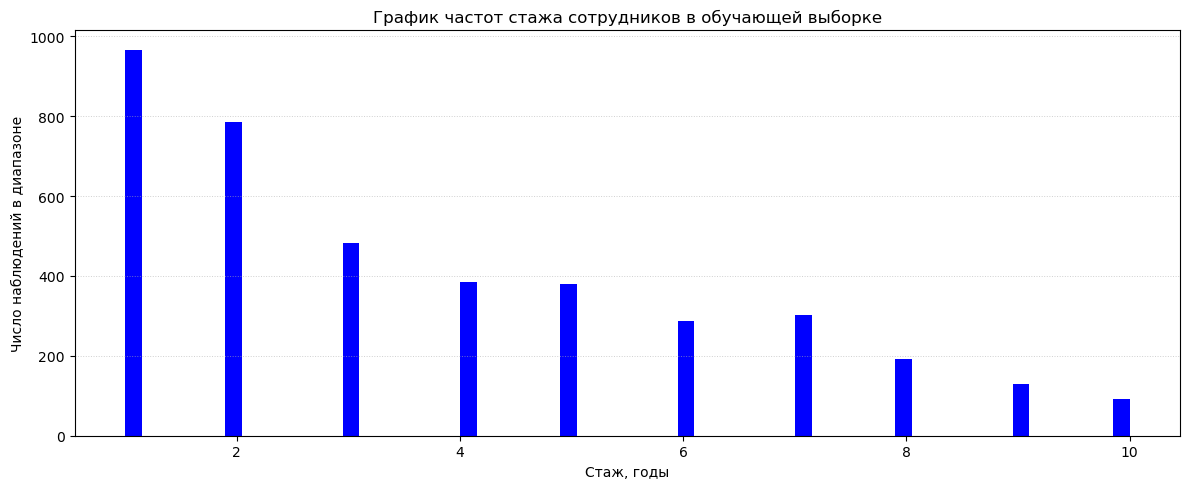

In [48]:
plot_feature_frequency(X_train_js, "employment_years", title = "График частот стажа сотрудников в обучающей выборке", feature_name = "Стаж, годы")

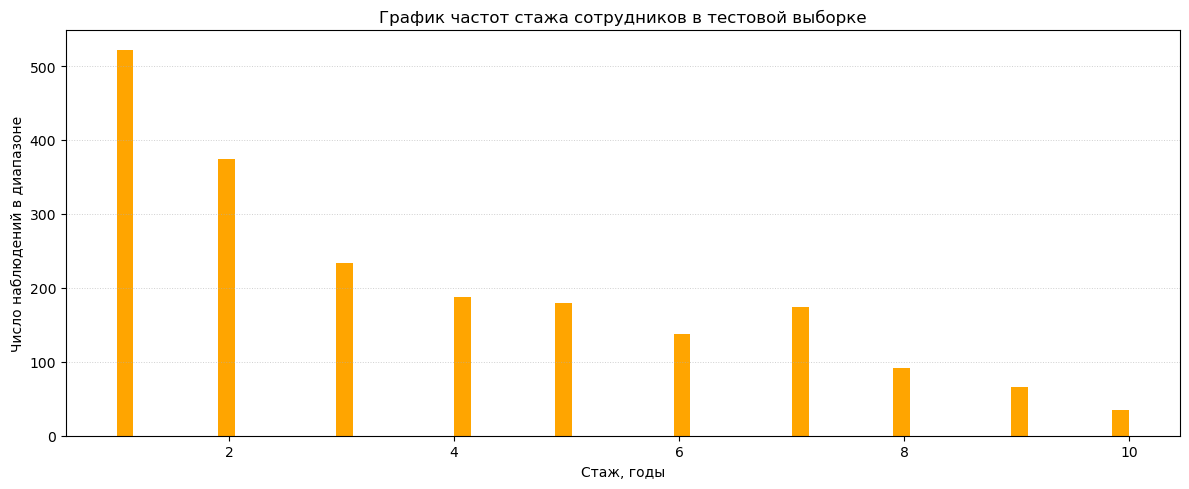

In [49]:
plot_feature_frequency(test, "employment_years", title = "График частот стажа сотрудников в тестовой выборке", feature_name = "Стаж, годы")

- Новых сотрудников в компании больше, чем бывалых.
- Продолжительность работы в компании монотонно убывает с исключением на 7 году работы, на котором она незначительно увеличивается. Возможно, в этот год 7 лет назад компания активнее обычного набирала сотрудников

Распределения частот обучающей и тестовой выборок схожи за исключение количества новых сотрудников. В тестовой выборке их относительно больше, чем работавших ранее 

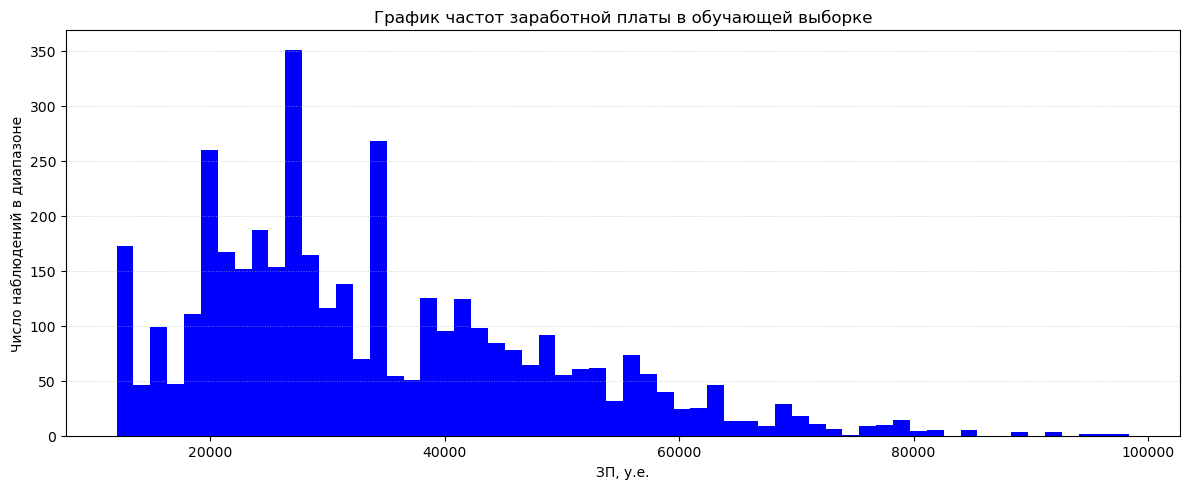

In [50]:
plot_feature_frequency(X_train_js, "salary", title = "График частот заработной платы в обучающей выборке", feature_name = "ЗП, у.е.")

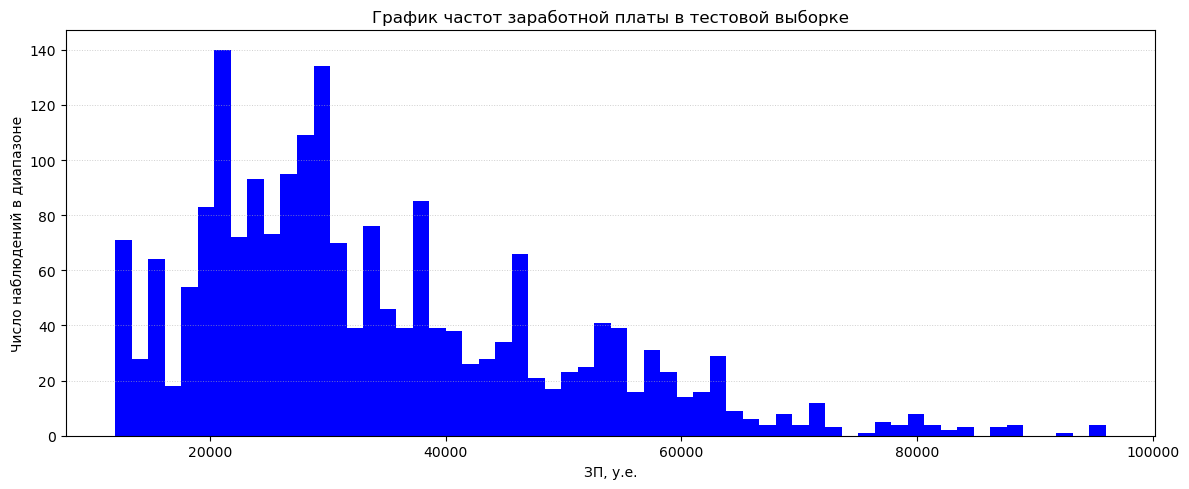

In [51]:
plot_feature_frequency(test, "salary", title = "График частот заработной платы в тестовой выборке", feature_name = "ЗП, у.е.")

- Заработные платы в компании имеют график частот схожий с распределением Пуассона.
- Наблюдается длинный хвост в сторону увеличения ЗП.
- Заметны выбросы. Однако, в силу разной важности и компетентности сотрудников в контексте данного исследования выбросы стоит оставить.

Графики частот для тестовой и обучающей выборок выглядят схоже, но локально отличаются. Эти изменения обусловлены относительно низким размером выборок и на мой взгляд не препятствуют обучению моделей

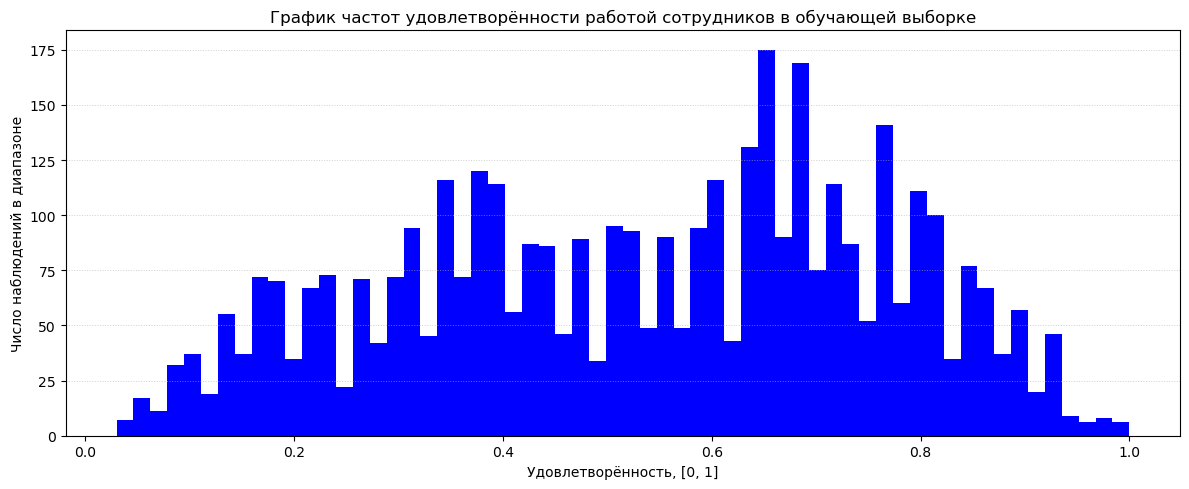

In [52]:
plot_feature_frequency(X_train_js, "job_satisfaction_rate", title = "График частот удовлетворённости работой сотрудников в обучающей выборке", feature_name = "Удовлетворённость, [0, 1]")

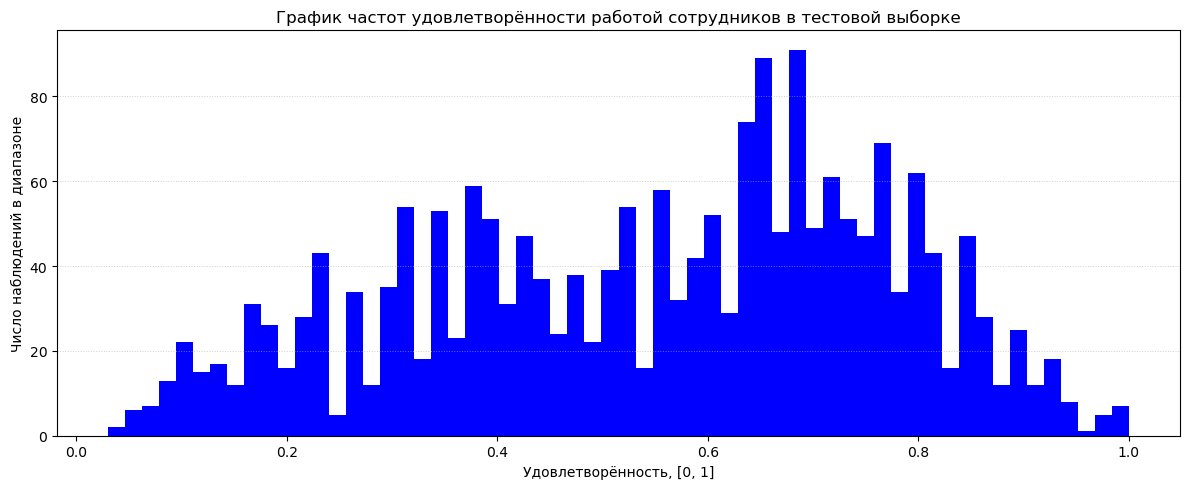

In [53]:
plot_feature_frequency(test, "job_satisfaction_rate", title = "График частот удовлетворённости работой сотрудников в тестовой выборке", feature_name = "Удовлетворённость, [0, 1]")

- График распределения частот удовлетворённости сотрудников мультимодален: количество удовлетворённых сотрудников увеливичается до ~0.38 и далее падает до нейтрального уровня удовлетворённости. После нейтрального уровня удовлетворённость сотрудников резко повышается до ~0.68 и далее так же падает
- Чаще всего сотрудники умеренно удовлетворены своим рабочим местом

Графики частот для тестовой и обучающей выборок выглядят схоже, но локально отличаются. Эти изменения обусловлены относительно низким размером выборок и на мой взгляд не препятствуют обучению моделей

#### Рассмотрим графики для категориальных признаков

In [54]:
def plot_category_pie_simple(
    df: pd.DataFrame,
    category_col: str = "dept",
    top_n: int = 8,
    title: str = "Распределение категорий"
):
    counts = df[category_col].value_counts()
    top = counts.head(top_n)
    other = int(counts.iloc[top_n:].sum())
    if other > 0:
        top["Другие"] = other
    total = int(top.sum())
    labels = [f"{c}\n{n} ({(n / total * 100 if total > 0 else 0):.1f}%)" for c, n in top.items()]
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.pie(top.values, labels = labels, startangle = 90, wedgeprops = dict(linewidth = 1, edgecolor = "white"))
    ax.set_title(title)
    ax.axis("equal")
    plt.show()


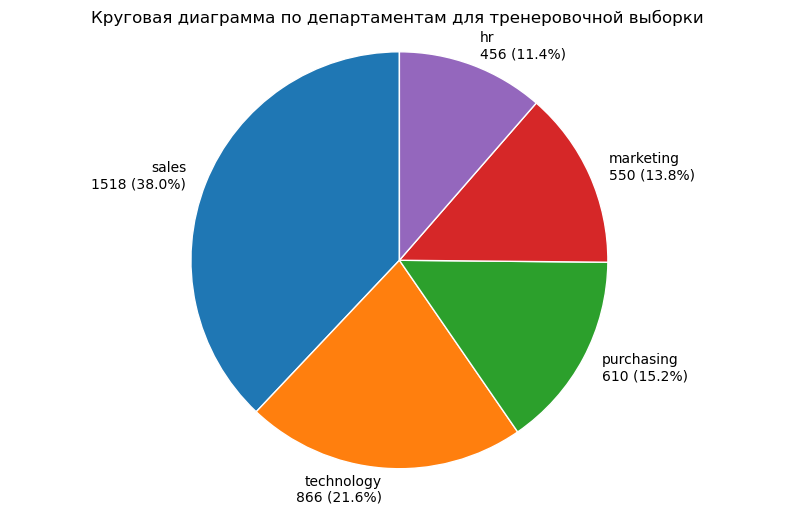

In [55]:
plot_category_pie_simple(X_train_js, "dept", title = "Круговая диаграмма по департаментам для тренеровочной выборки")

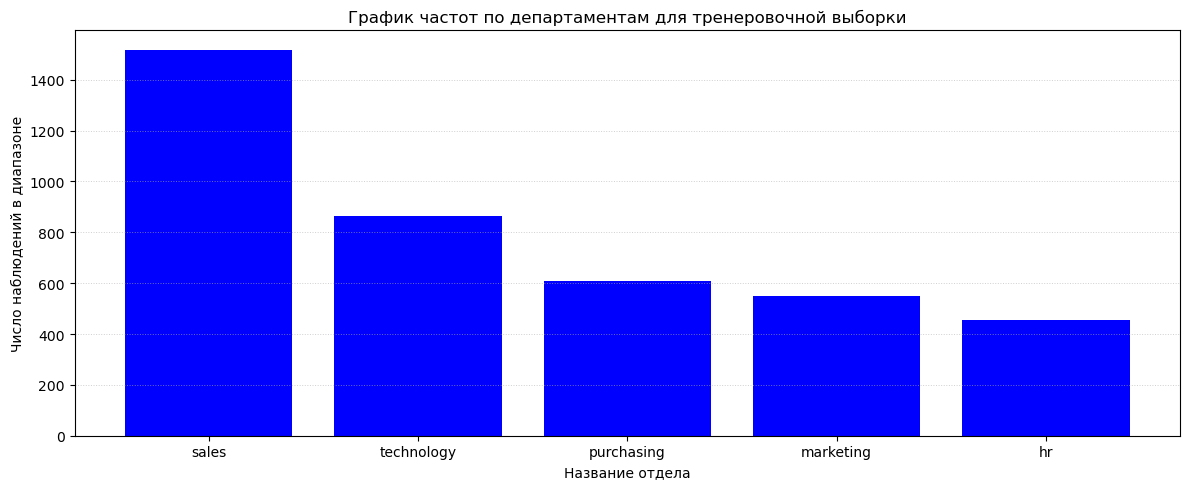

In [56]:
plot_feature_frequency(X_train_js, "dept", title = "График частот по департаментам для тренеровочной выборки", feature_name = "Название отдела")

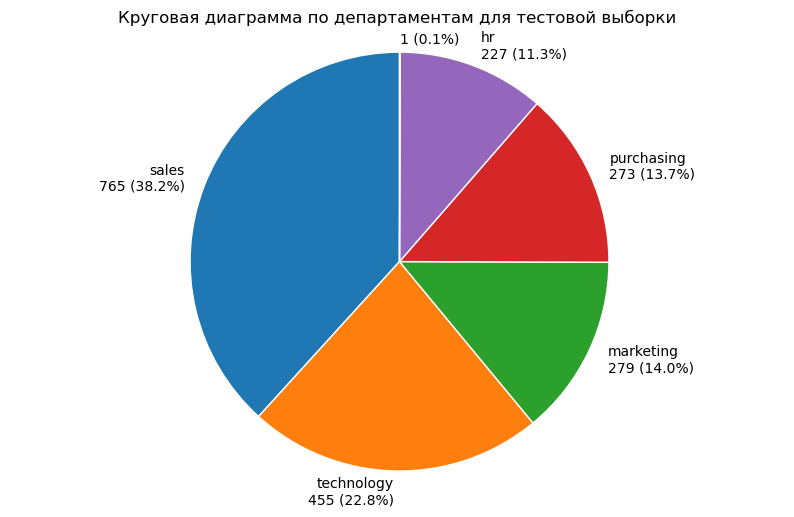

In [57]:
plot_category_pie_simple(test, "dept", title = "Круговая диаграмма по департаментам для тестовой выборки")

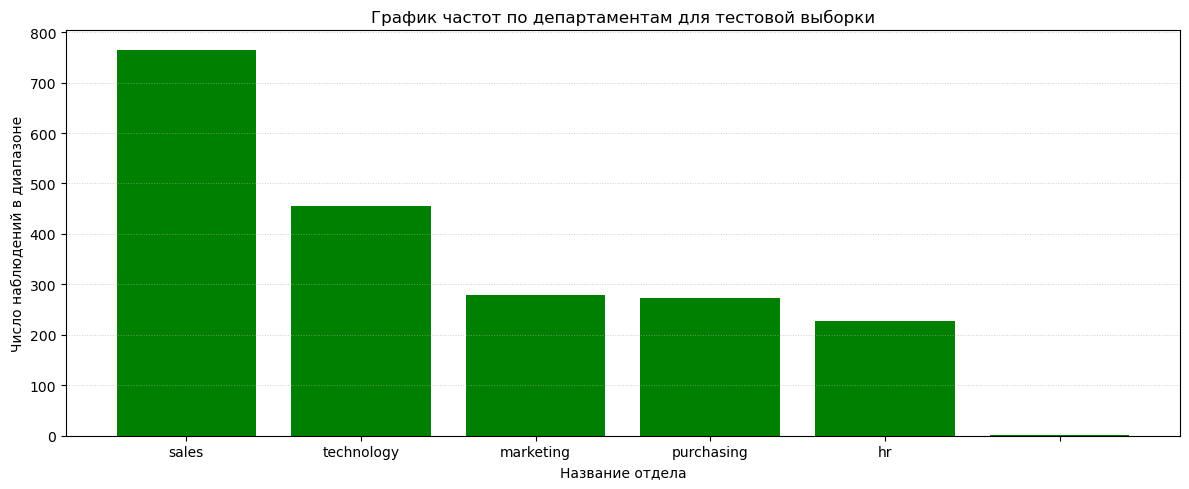

In [58]:
plot_feature_frequency(test, "dept", title = "График частот по департаментам для тестовой выборки", feature_name = "Название отдела")

- Больше всего сотрудников работает в отделе продаж
- Меньше всего сотрудников работает в HR отделе

Распределение сотрудников по отделам схоже в обучающей и тестовой выборках и незначительно колеблется из-за относительно малых объёмов данных.

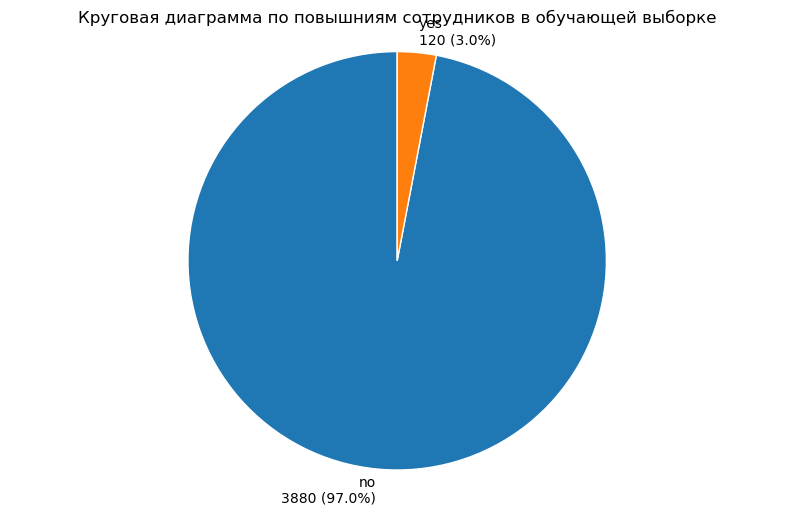

In [59]:
plot_category_pie_simple(X_train_js, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в обучающей выборке")

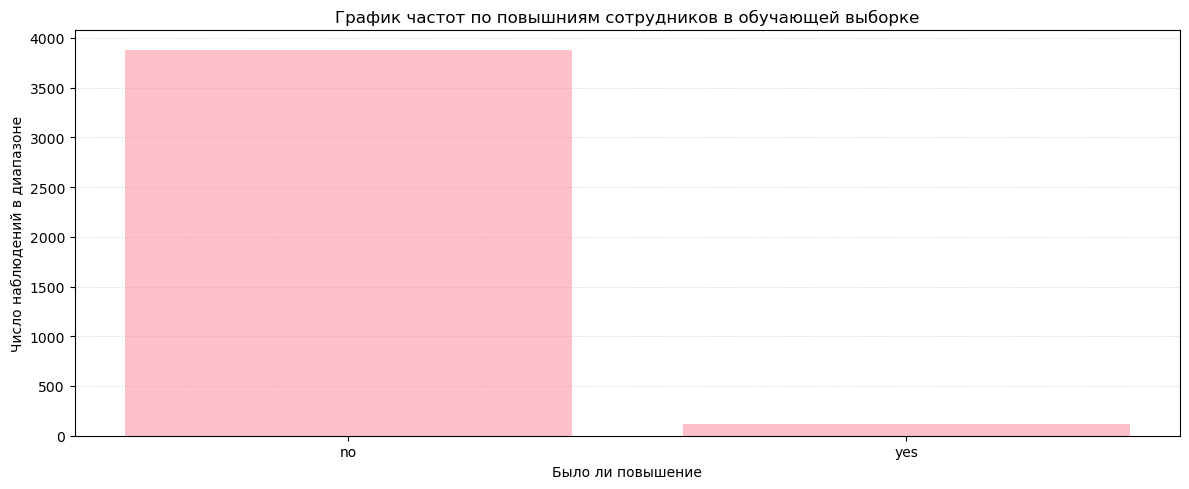

In [60]:
plot_feature_frequency(X_train_js, "last_year_promo", title = "График частот по повышниям сотрудников в обучающей выборке", feature_name = "Было ли повышение")

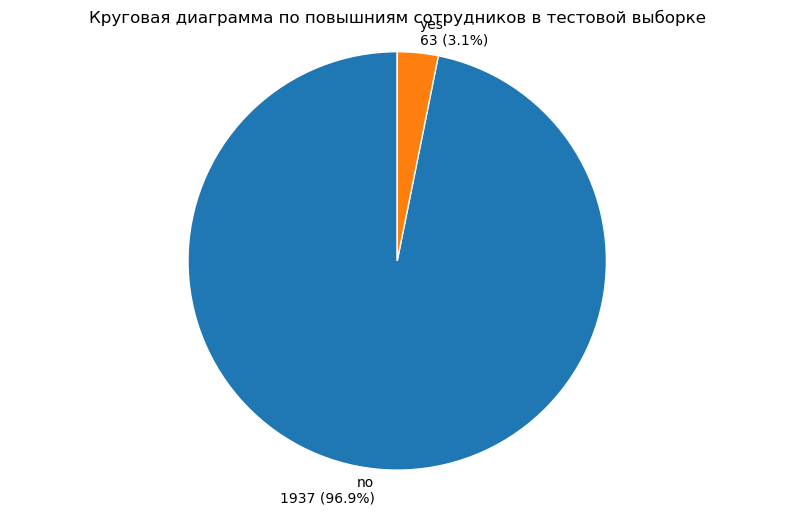

In [61]:
plot_category_pie_simple(test, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в тестовой выборке")

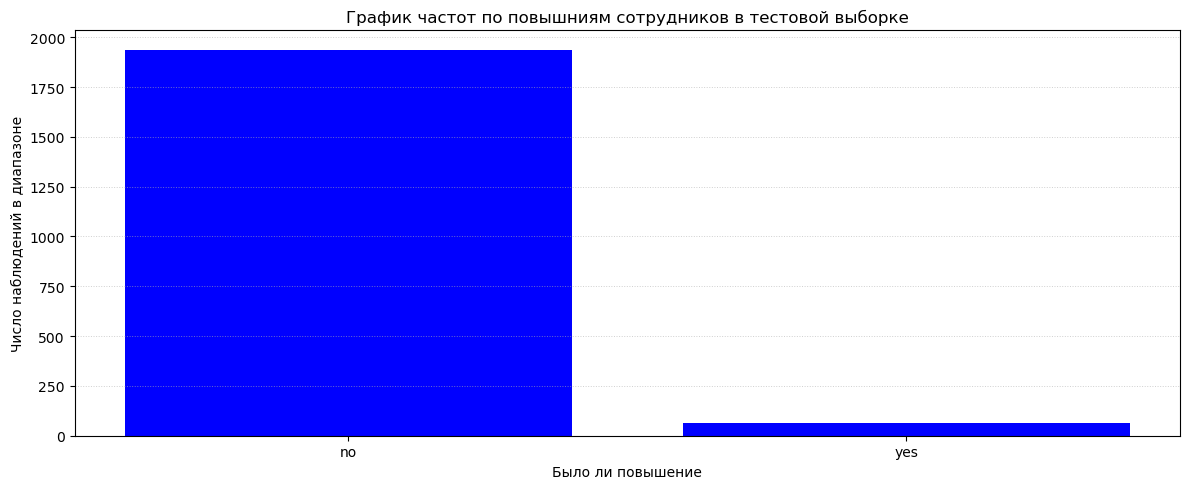

In [62]:
plot_feature_frequency(test, "last_year_promo", title = "График частот по повышниям сотрудников в тестовой выборке", feature_name = "Было ли повышение")

- Подавляющее большинство сотрудников в компании не получали повышение

Отношение получивших и не получивших повышение сотрудников схоже в обучающей и тестовой выбоках.

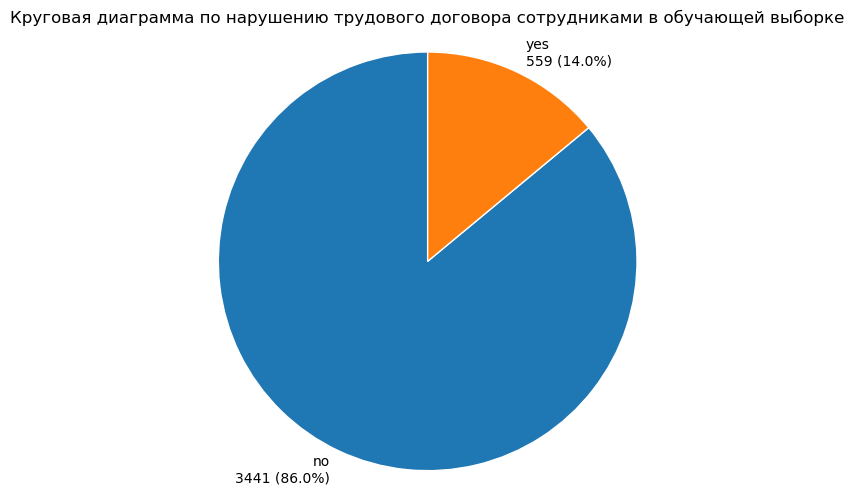

In [63]:
plot_category_pie_simple(X_train_js, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в обучающей выборке")

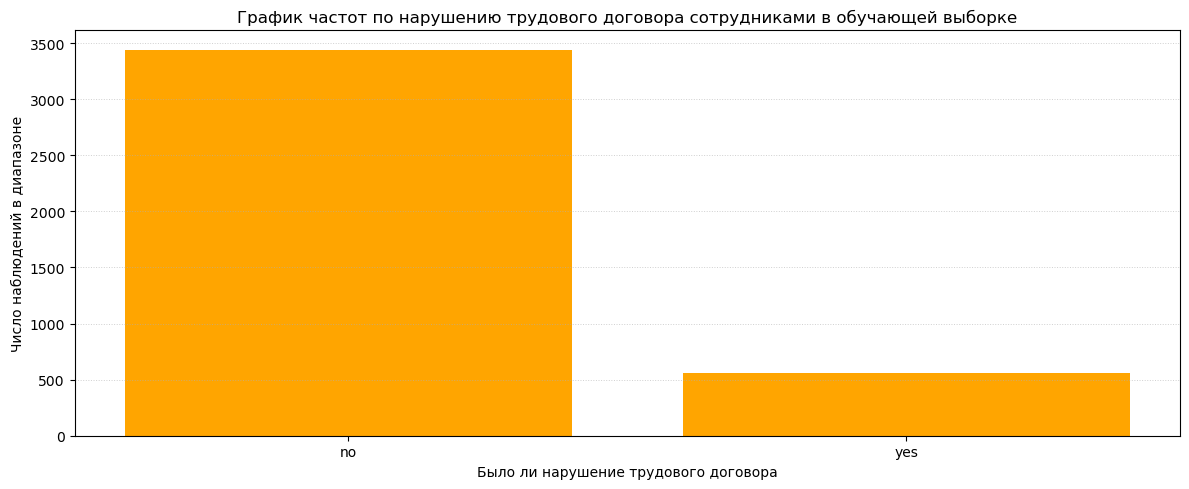

In [64]:
plot_feature_frequency(X_train_js, "last_year_violations", title = "График частот по нарушению трудового договора сотрудниками в обучающей выборке",
feature_name = "Было ли нарушение трудового договора")

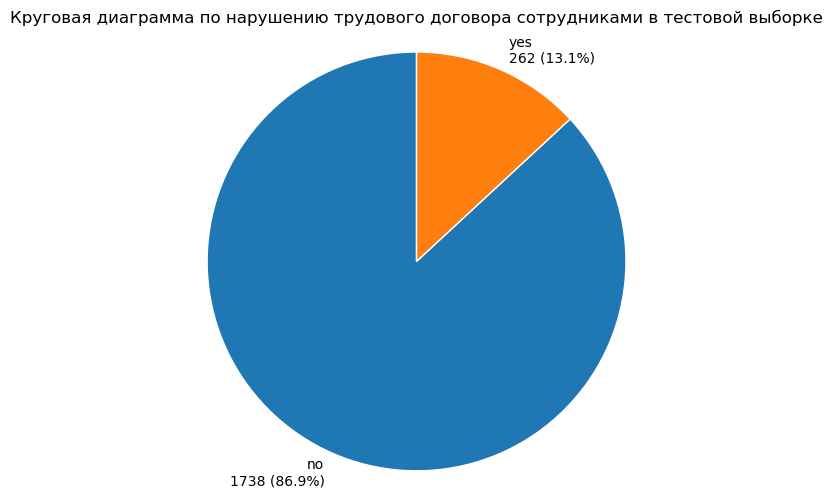

In [65]:
plot_category_pie_simple(test, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в тестовой выборке")

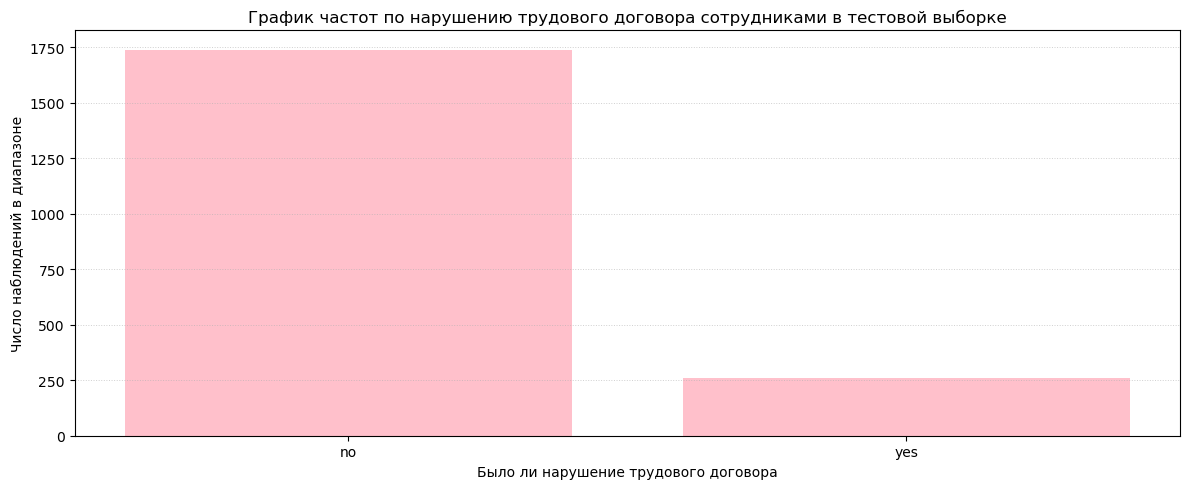

In [66]:
plot_feature_frequency(test, "last_year_violations", title = "График частот по нарушению трудового договора сотрудниками в тестовой выборке",
feature_name = "Было ли нарушение трудового договора")

- Подавляющее большинство сотрудников в компании не нарушалит трудовой договор

Отношение нарушавших и не нарушавших трудовой договор сотрудников схоже в обучающей и тестовой выбоках, но в тестовой выборке это отношение незначительно ниже.

#### Рассмотрим графики для категориальных упорядоченных признаков

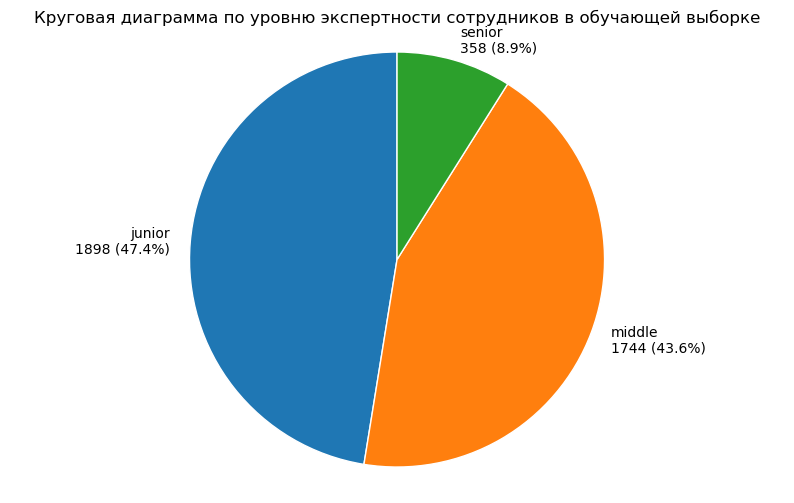

In [67]:
plot_category_pie_simple(X_train_js, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в обучающей выборке")

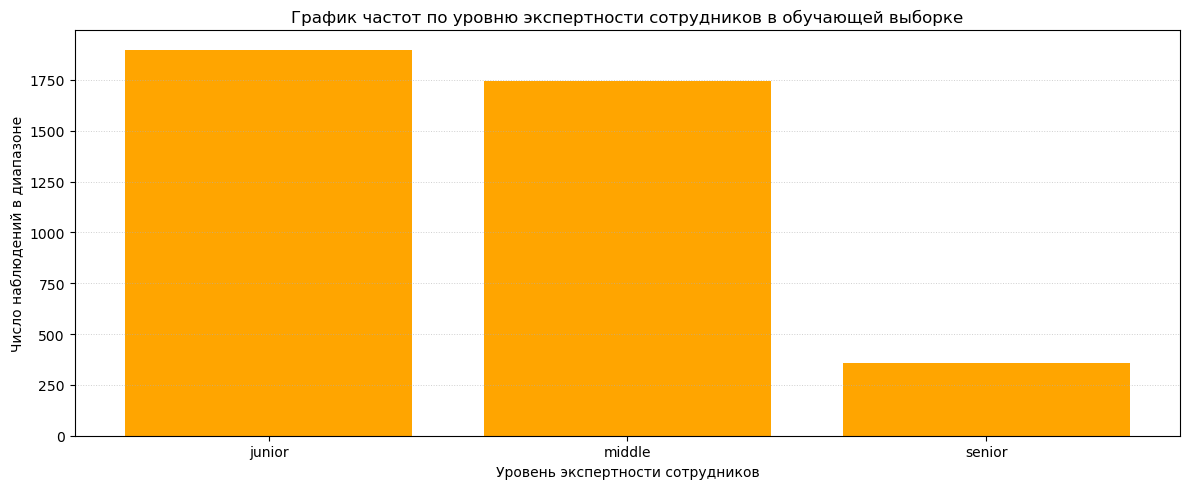

In [68]:
plot_feature_frequency(X_train_js, "level", title = "График частот по уровню экспертности сотрудников в обучающей выборке", feature_name = "Уровень экспертности сотрудников")

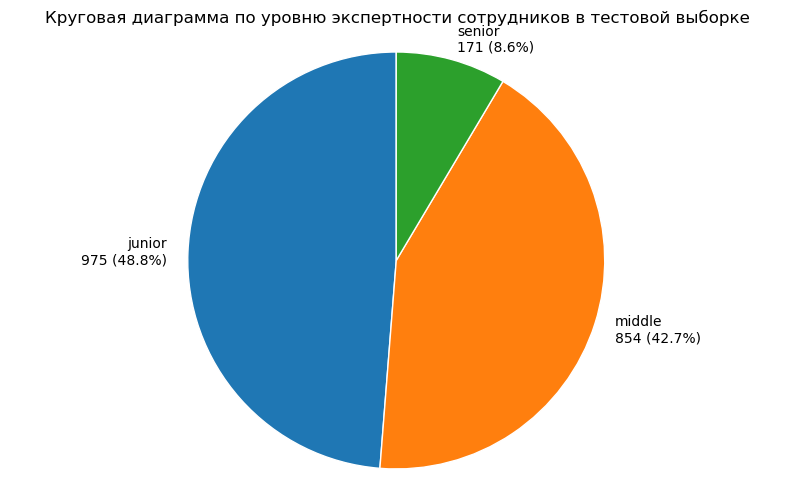

In [69]:
plot_category_pie_simple(test, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в тестовой выборке")

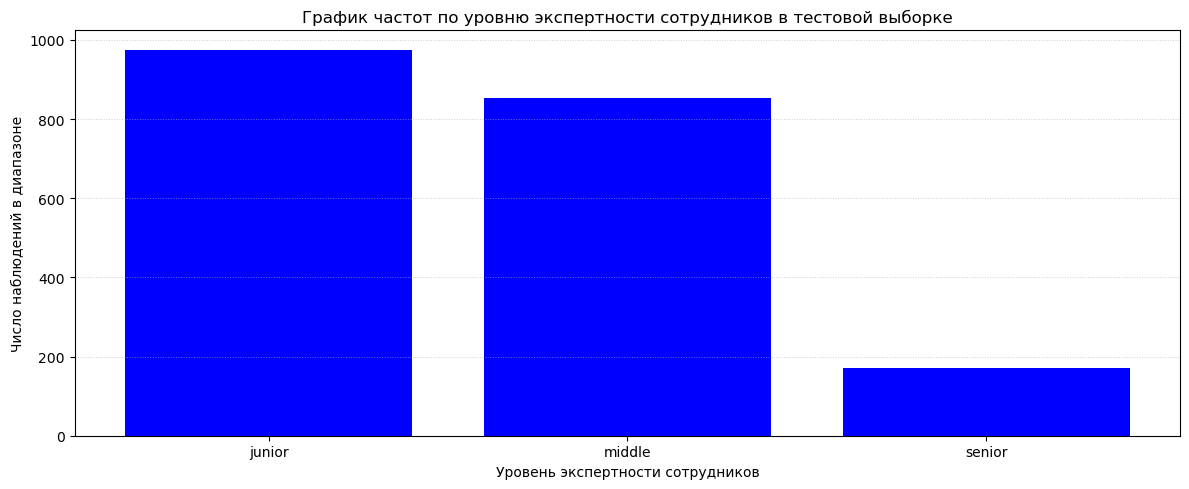

In [70]:
plot_feature_frequency(test, "level", title = "График частот по уровню экспертности сотрудников в тестовой выборке", feature_name = "Уровень экспертности сотрудников")

- Экспертных сотрудников в компании более чем в 8 раза меньше чем колег со средним и малым опытом
- Больше всего в компании начинающих специалистов
- Количество начинающих специалистов чуть больше бывалых сотрудников

Распределение по уровню опыта сотрудников схоже в обучающей и тестовой выбоках и незначительно колеблется из-за относительно малых объёмов данных.

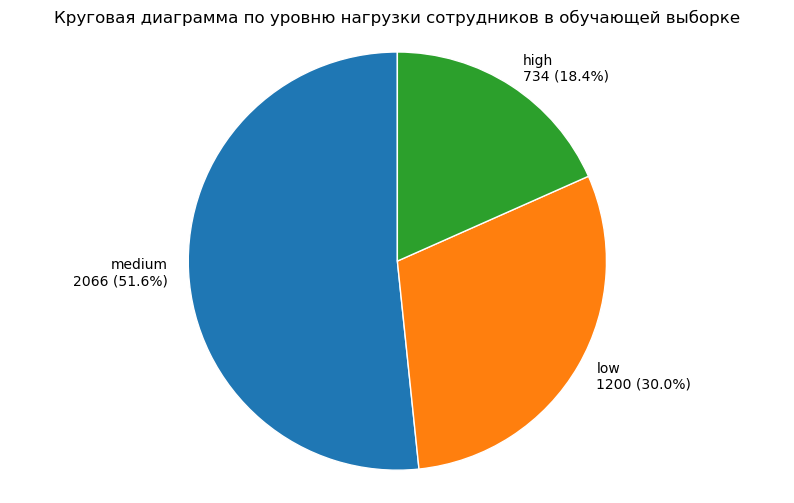

In [71]:
plot_category_pie_simple(X_train_js, "workload", title = "Круговая диаграмма по уровню нагрузки сотрудников в обучающей выборке")

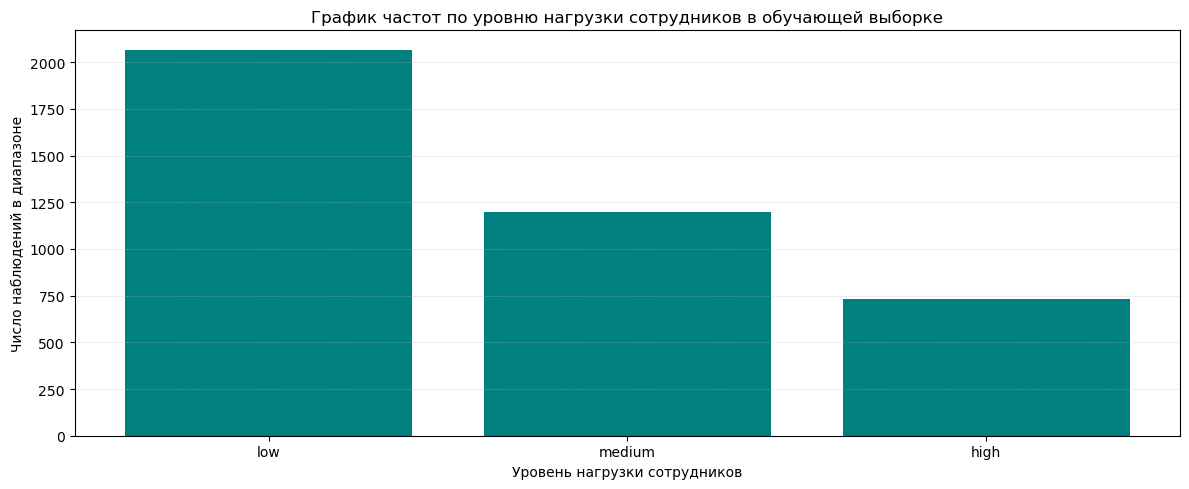

In [72]:
plot_feature_frequency(X_train_js, "workload", ordered_categories = ["low", "medium", "high"],
    title = "График частот по уровню нагрузки сотрудников в обучающей выборке",
    feature_name = "Уровень нагрузки сотрудников")

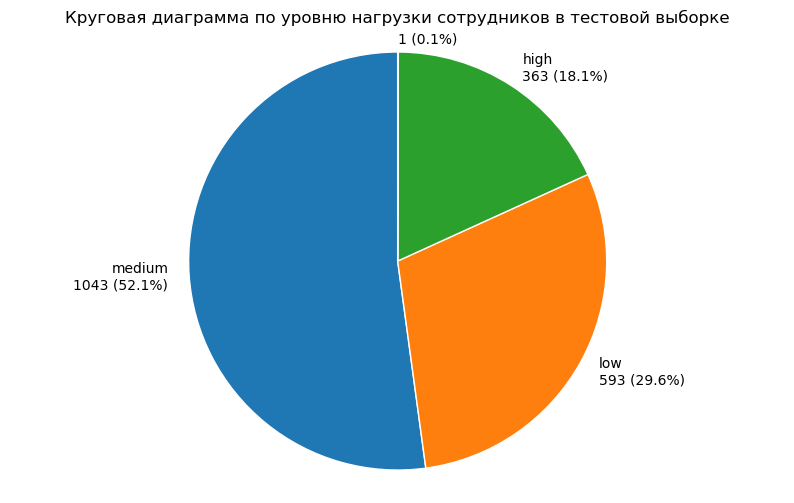

In [73]:
plot_category_pie_simple(test, "workload", title = "Круговая диаграмма по уровню нагрузки сотрудников в тестовой выборке")

Создадим подвыдорку без пустых категорий, которые далее обработаем в пайплайне

In [74]:
clear_test = test[test["workload"] != ' ']
clear_test["workload"] = clear_test["workload"].cat.remove_categories(' ')

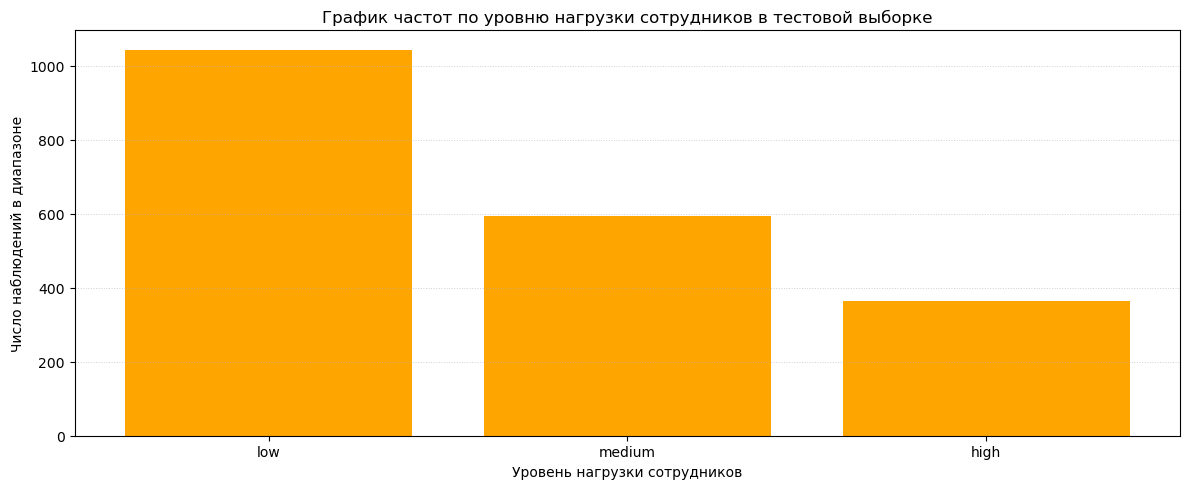

In [75]:
plot_feature_frequency(clear_test, "workload", ordered_categories = ["low", "medium", "high"],
title = "График частот по уровню нагрузки сотрудников в тестовой выборке",
feature_name = "Уровень нагрузки сотрудников")

- Сотрудников с низким уровнем нагрузки больше всего в компании
- Количество сотрудников монотонно убывает по уровню нагрузки
- Малое количество сотрудников перегружены

Распределение по уровню нагрузки на сотрудников схоже в обучающей и тестовой выбоках и незначительно колеблется из-за относительно малых объёмов данных..

#### Вывод EDA для выборок модели регрессии

- Целевой признак бимодален и без явных выбросов
- Заработная плата распределена схоже с Пуассоном и имеет длинный хвост в сторону больших значений. Признак содержит выбросы, которые в силу специфики области исследования решено оставить
- Для категориальных признаков, кроме отдела, наблюдается сильный дисбаланс отдельных классов в каждом из признаков. 
- Обучающая и тестовая выборки имеют схожие распределения всех признаков и могут быть использованы для обучения 

### Данные для модели классификации

#### Рассмотрим сбалансированность тестовой и обучающей выборок

Для начала проанализируем сбалансированность тестовой и обучающей выборок задачи классификации по целевому признаку

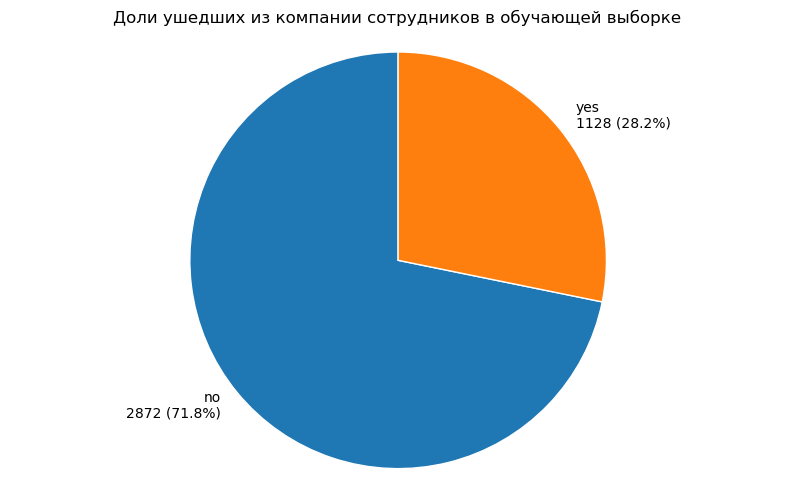

In [76]:
plot_category_pie_simple(X_train_q, "quit", title = "Доли ушедших из компании сотрудников в обучающей выборке")

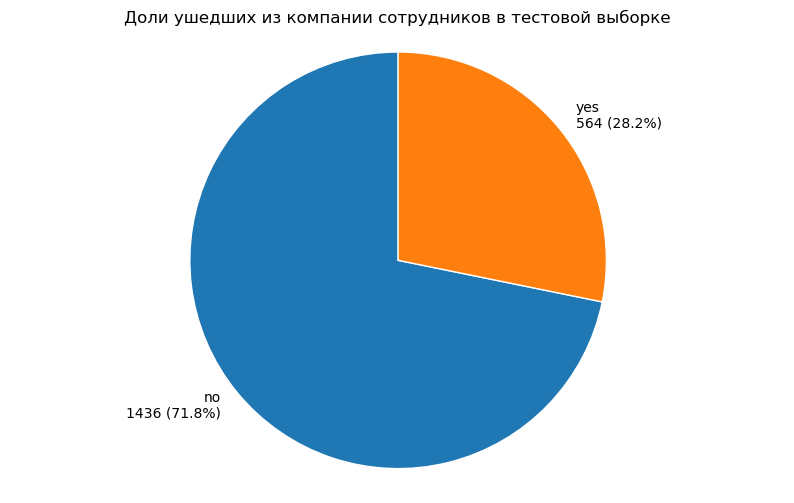

In [77]:
plot_category_pie_simple(test, "quit", title = "Доли ушедших из компании сотрудников в тестовой выборке")

- Обучающая и тестовая выборки имеют одинаковое отношение целевой категории
- Заметен явный дисбаланс в сторону продолживших работать в компании сотрудников. Оставшихся более чем в 3 раза больше

Делаем вывод, что выборку стоит стратифицировать. Добавим для категориальных данных срез по привалирующей страте и будем использовать её для относительного анализа выборок 

In [78]:
X_train_no_q = X_train_q[X_train_q["quit"] == "no"]
test_no_q = test[test["quit"] == "no"]

#### Рассмотрим описательную статистику данных

In [79]:
X_train_q.drop("id", axis = 1).describe()

employment_years  supervisor_evaluation        salary
count       4000.000000            4000.000000   4000.000000
mean           3.701500               3.474750  33805.800000
std            2.541852               1.004049  15152.415163
min            1.000000               1.000000  12000.000000
25%            2.000000               3.000000  22800.000000
50%            3.000000               4.000000  30000.000000
75%            6.000000               4.000000  43200.000000
max           10.000000               5.000000  96000.000000

In [80]:
test.drop(["id", "job_satisfaction_rate"], axis = 1).describe()

employment_years  supervisor_evaluation        salary
count       2000.000000            2000.000000   2000.000000
mean           3.666500               3.526500  34066.800000
std            2.537222               0.996892  15398.436729
min            1.000000               1.000000  12000.000000
25%            1.000000               3.000000  22800.000000
50%            3.000000               4.000000  30000.000000
75%            6.000000               4.000000  43200.000000
max           10.000000               5.000000  96000.000000

Общие замечания для численных признаков:
- Заметим, что руководители оценивают сотрудников чаще хорошо по пятибальной системе
- Есть сотрудники получающие чуть менее чем в 2 и почти в 3 раза больше средней зарплаты по компании
- Сотрудники в среднем работают в компании чуть менее 4 лет

Разница в численных признаках между тестовой и обучающей выборками:
- Продолжительность работы в компании в тестовой выборке чуть ниже. Разброс продолжительности сильно не отличается
- Оценки руководителей незначительно выше в тестовой выборке. Разброс оценок сильно не отличается
- Зарплата в тестовой выборке почти совпадает с обучающей выборкой. Разброс зарплаты незначительно выше в тестовой выборке

Явных выбросов и аномалий при этом не замечено.
Значимых отличий в численных признаках между тестовой и обучающей выборками не обнаружено

#### Рассмотрим графики частот для количественных признаков.

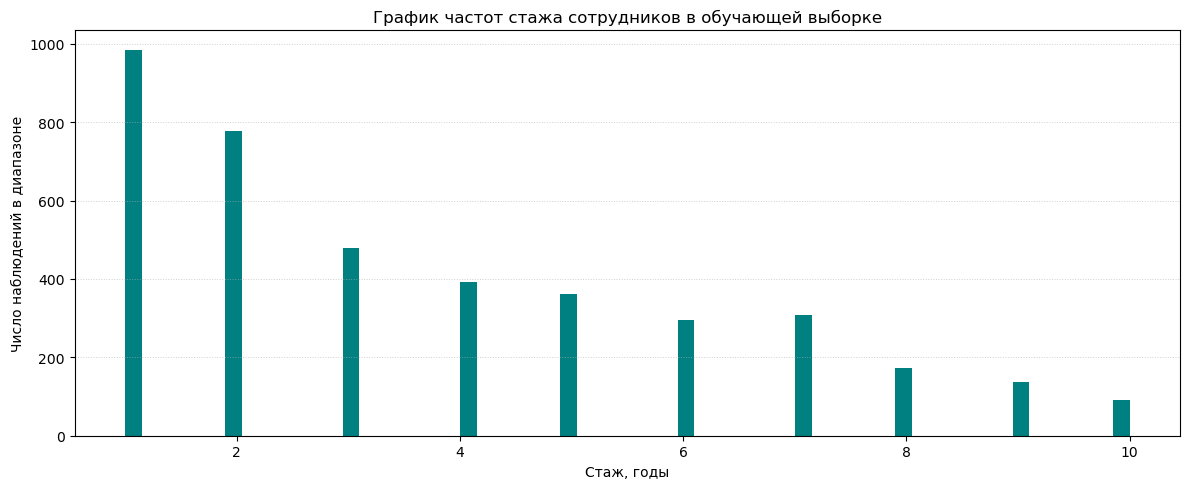

In [81]:
plot_feature_frequency(X_train_q, "employment_years", title = "График частот стажа сотрудников в обучающей выборке", feature_name = "Стаж, годы")

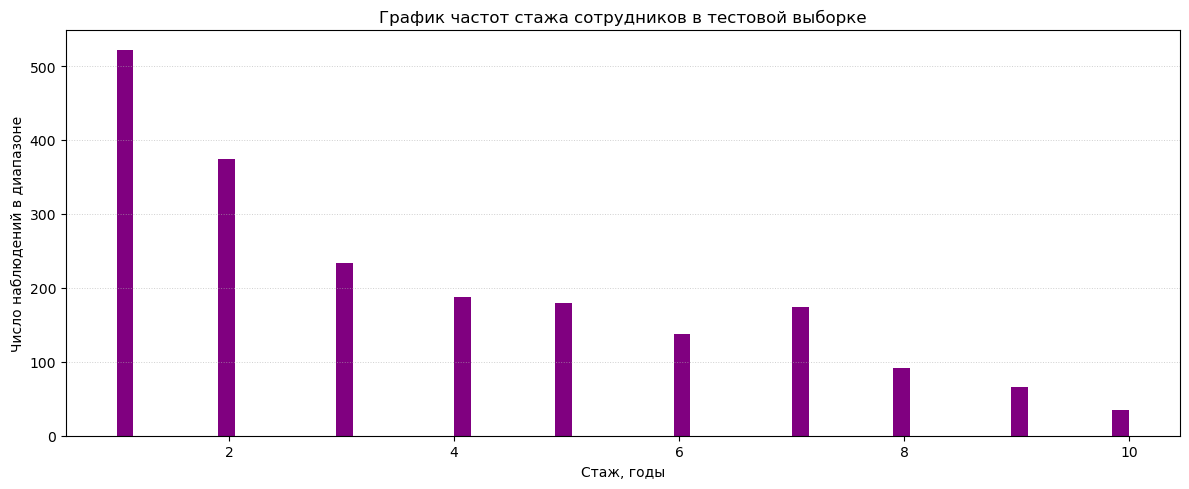

In [82]:
plot_feature_frequency(test, "employment_years", title = "График частот стажа сотрудников в тестовой выборке", feature_name = "Стаж, годы")

- Новых сотрудников в компании больше, чем бывалых.
- Продолжительность работы в компании монотонно убывает с исключением на 7 году работы, на котором она незначительно увеличивается. Возможно, в этот год 7 лет назад компания активнее обычного набирала сотрудников

Распределения частот обучающей и тестовой выборок схожи за исключение количества новых сотрудников. В тестовой выборке их относительно больше, чем работавших ранее 

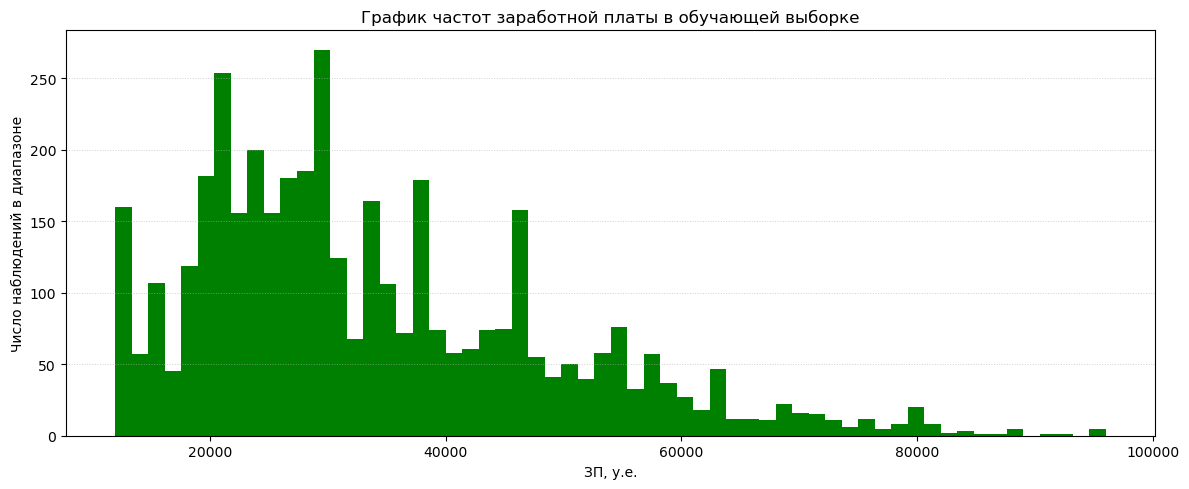

In [83]:
plot_feature_frequency(X_train_q, "salary", title = "График частот заработной платы в обучающей выборке", feature_name = "ЗП, у.е.")

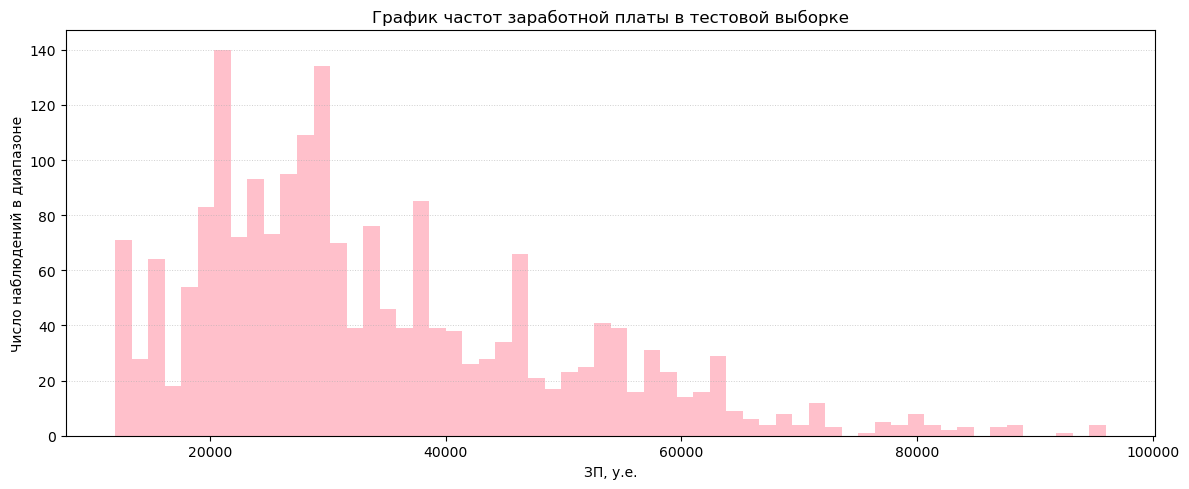

In [84]:
plot_feature_frequency(test, "salary", title = "График частот заработной платы в тестовой выборке", feature_name = "ЗП, у.е.")

- Заработные платы в компании имеют график частот схожий с распределением Пуассона.
- Наблюдается длинный хвост в сторону увеличения ЗП.
- Заметны выбросы. Однако, в силу разной важности и компетентности сотрудников в контексте данного исследования выбросы стоит оставить.

Графики частот для тестовой и обучающей выборок выглядят схоже, и почти совпадают локально. Это занятное наблюдение. Возможно, данные из тестовой или обучающей выборки для модели классификации синтезированы по данному признаку. Т.к. данные предоставил заказчик, стоит уточнить природу этого явления.

#### Рассмотрим графики частот для категориальных признаков

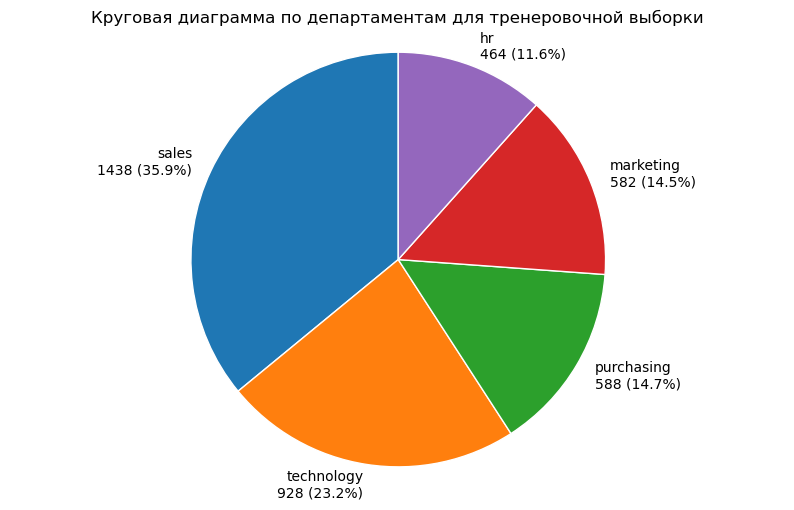

In [85]:
plot_category_pie_simple(X_train_q, "dept", title = "Круговая диаграмма по департаментам для тренеровочной выборки")

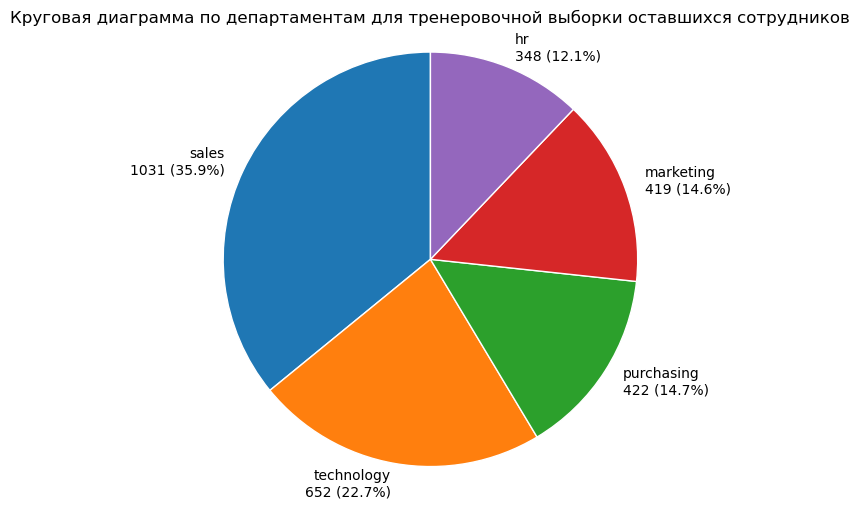

In [86]:
plot_category_pie_simple(X_train_no_q, "dept", title = "Круговая диаграмма по департаментам для тренеровочной выборки оставшихся сотрудников")

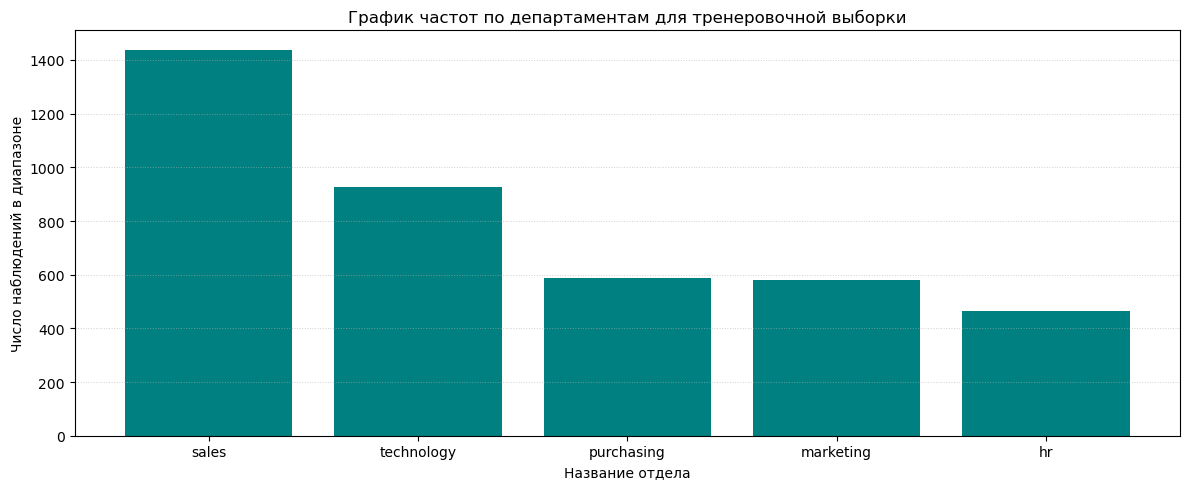

In [87]:
plot_feature_frequency(X_train_q, "dept", title = "График частот по департаментам для тренеровочной выборки", feature_name = "Название отдела")

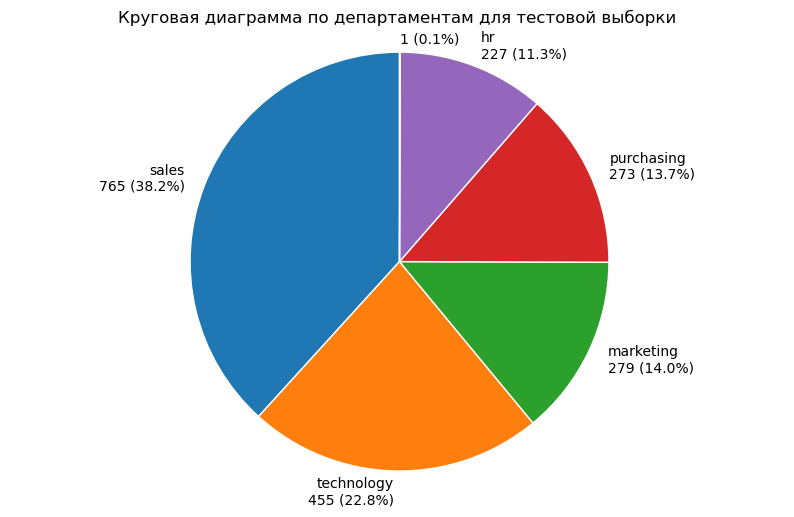

In [88]:
plot_category_pie_simple(test, "dept", title = "Круговая диаграмма по департаментам для тестовой выборки")

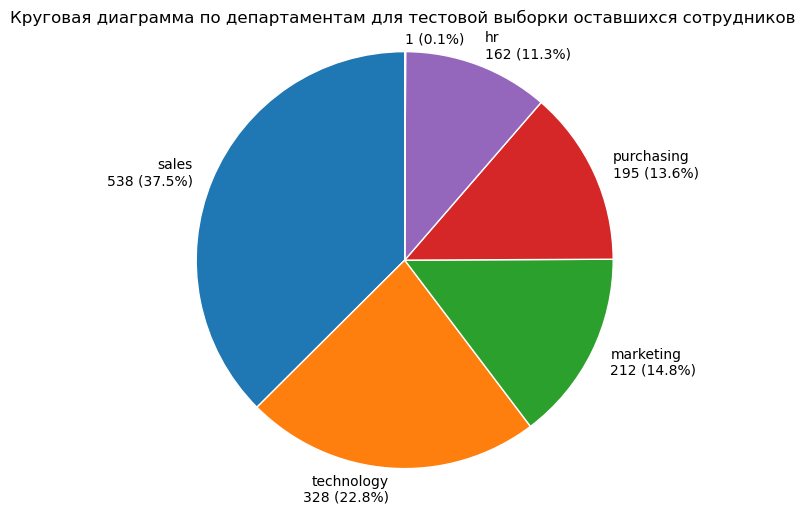

In [89]:
plot_category_pie_simple(test_no_q, "dept", title = "Круговая диаграмма по департаментам для тестовой выборки оставшихся сотрудников")

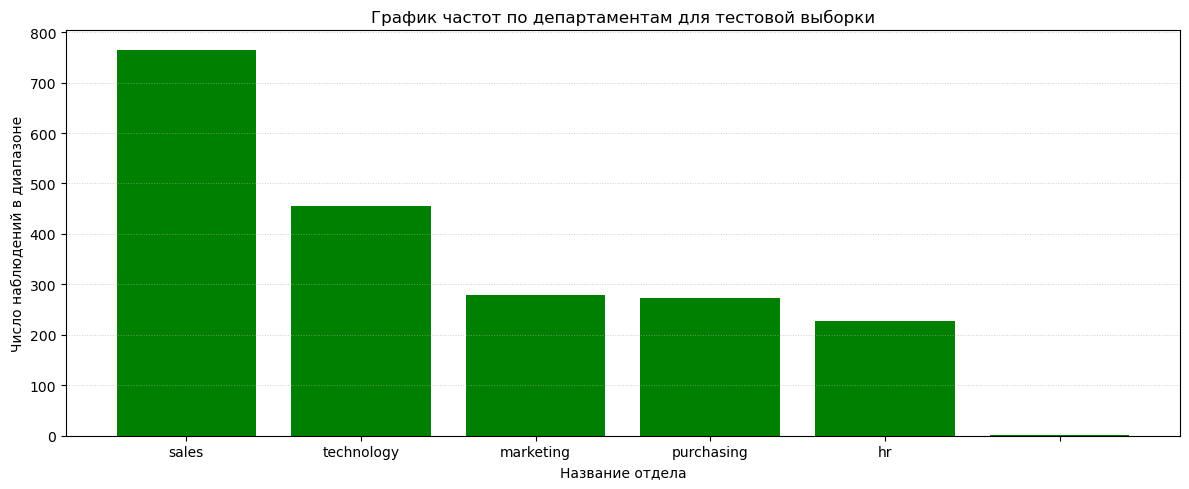

In [90]:
plot_feature_frequency(test, "dept", title = "График частот по департаментам для тестовой выборки", feature_name = "Название отдела")

- Больше всего сотрудников работает в отделе продаж
- Меньше всего сотрудников работает в HR отделе

Распределение сотрудников по отделам схоже в обучающей и тестовой выборках и незначительно колеблется из-за относительно малых объёмов данных. После исследования относительных значений оставшихся сотрудников серъёзных отличий в департаментах найдено не было. Для оставшихся сотрудников наблюдается незначительное усиление дисбаланса классов от обучающей к тестовой выборке в HR и отделе продаж

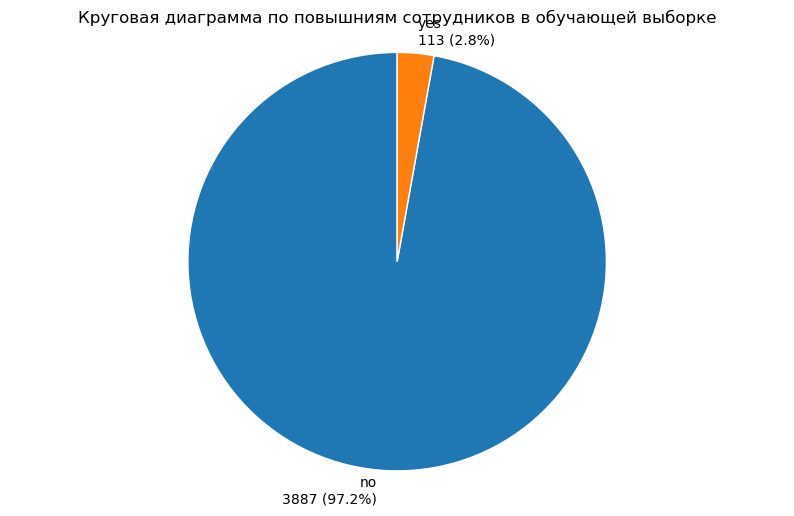

In [91]:
plot_category_pie_simple(X_train_q, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в обучающей выборке")

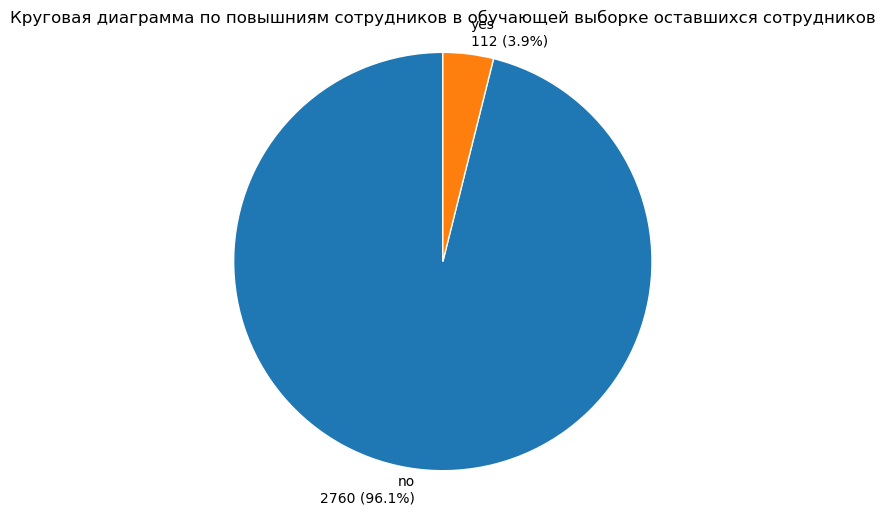

In [92]:
plot_category_pie_simple(X_train_no_q, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в обучающей выборке оставшихся сотрудников")

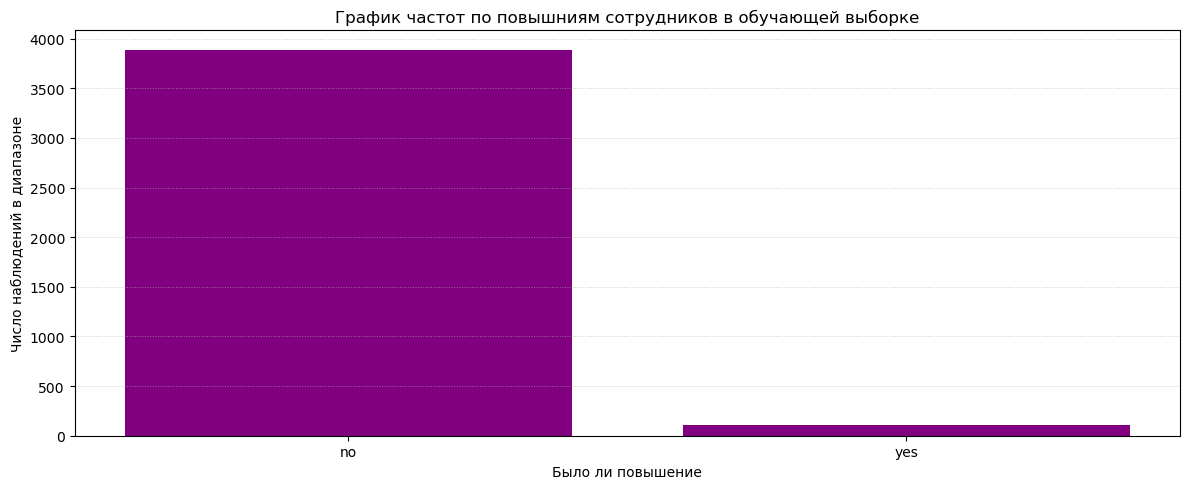

In [93]:
plot_feature_frequency(X_train_q, "last_year_promo", title = "График частот по повышниям сотрудников в обучающей выборке", feature_name = "Было ли повышение")

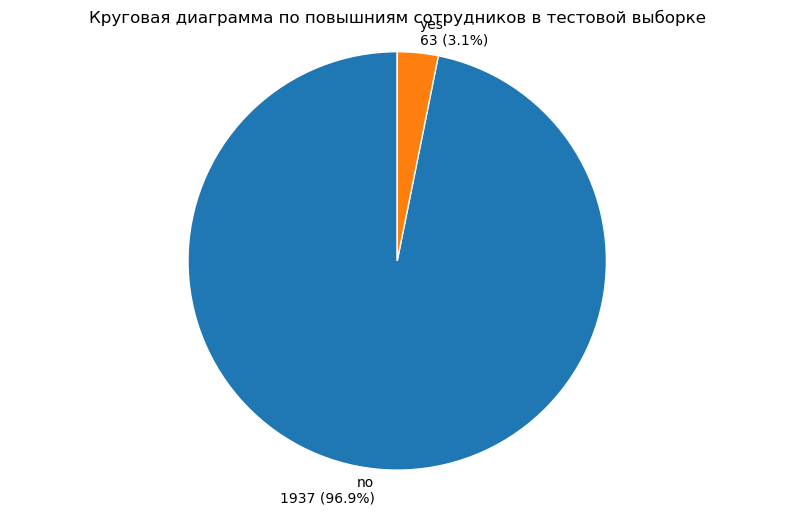

In [94]:
plot_category_pie_simple(test, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в тестовой выборке")

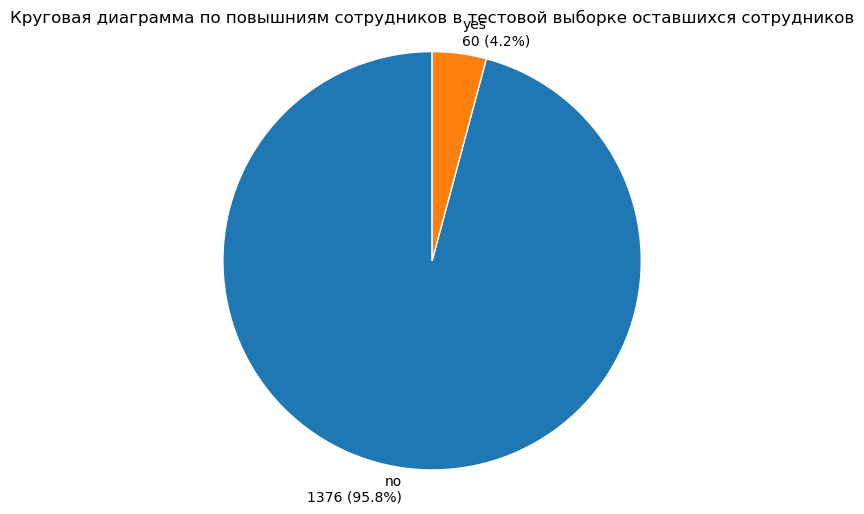

In [95]:
plot_category_pie_simple(test_no_q, "last_year_promo", title = "Круговая диаграмма по повышниям сотрудников в тестовой выборке оставшихся сотрудников")

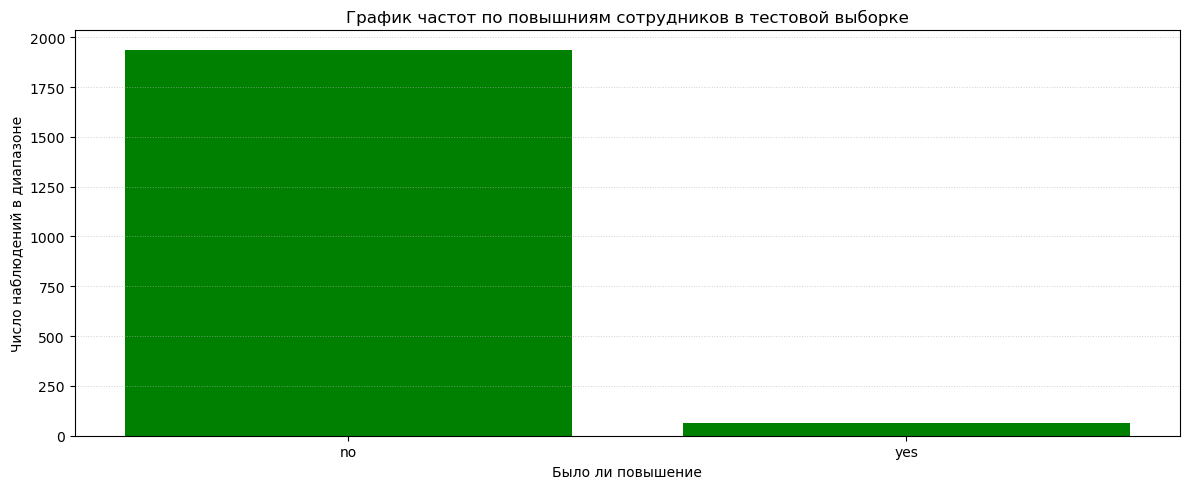

In [96]:
plot_feature_frequency(test, "last_year_promo", title = "График частот по повышниям сотрудников в тестовой выборке", feature_name = "Было ли повышение")

- Подавляющее большинство сотрудников в компании не получали повышение

Отношение получивших и не получивших повышение сотрудников схоже в обучающей и тестовой выбоках. Доля получивших повышение сотрудников незначительно больше среди оставшихся в компании в обеих выборках

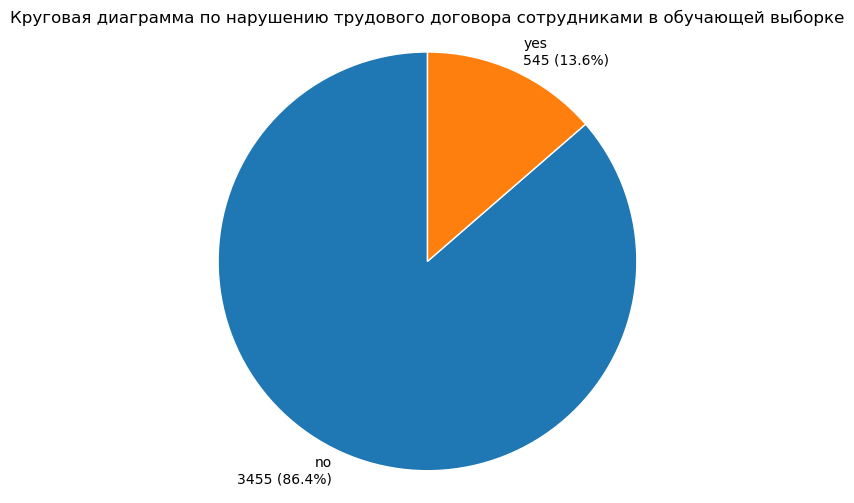

In [97]:
plot_category_pie_simple(X_train_q, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в обучающей выборке")

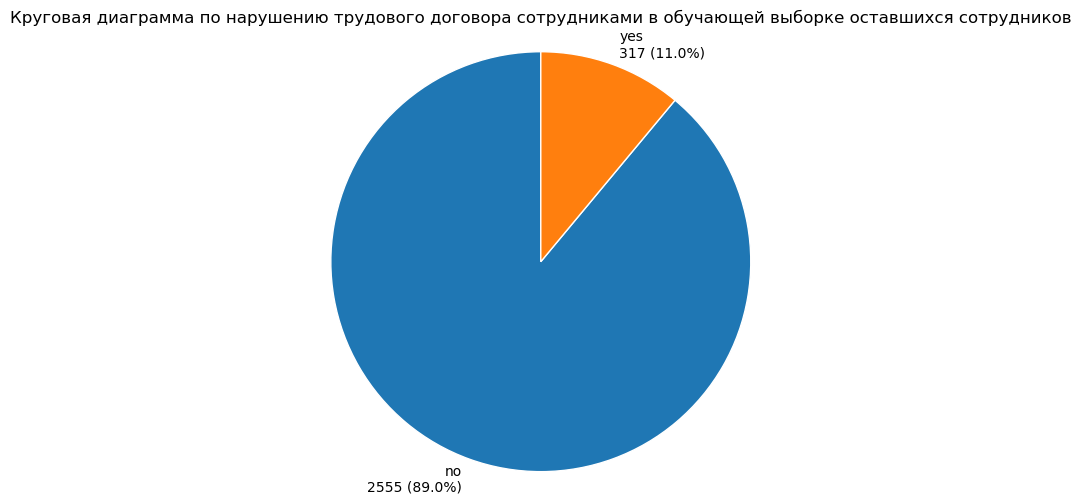

In [98]:
plot_category_pie_simple(X_train_no_q, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в обучающей выборке оставшихся сотрудников")

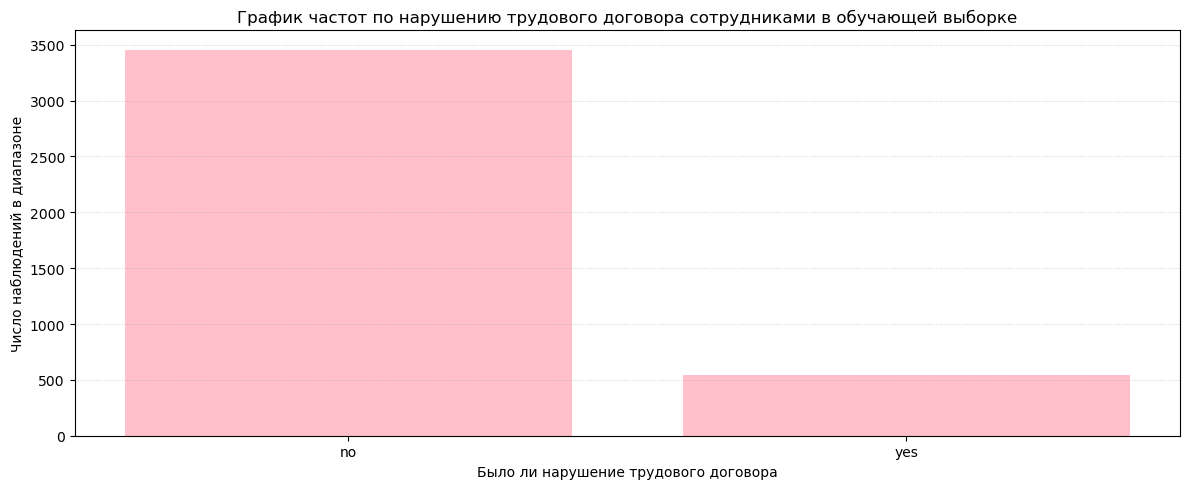

In [99]:
plot_feature_frequency(X_train_q, "last_year_violations", title = "График частот по нарушению трудового договора сотрудниками в обучающей выборке",
feature_name = "Было ли нарушение трудового договора")

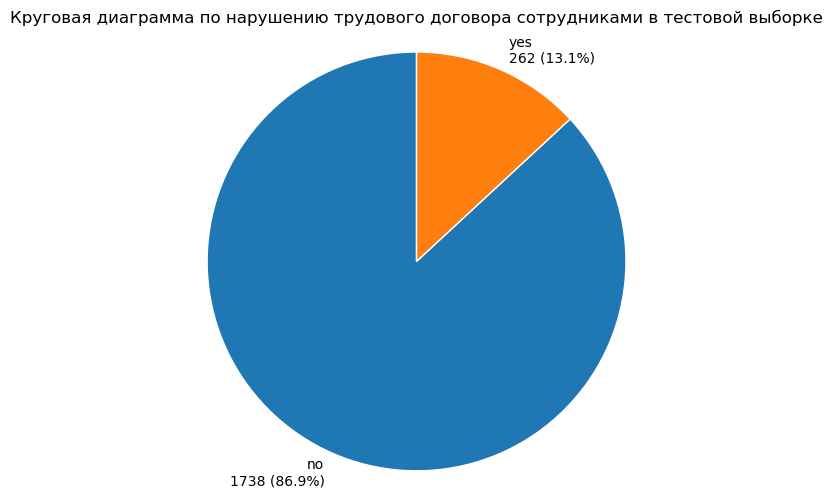

In [100]:
plot_category_pie_simple(test, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в тестовой выборке")

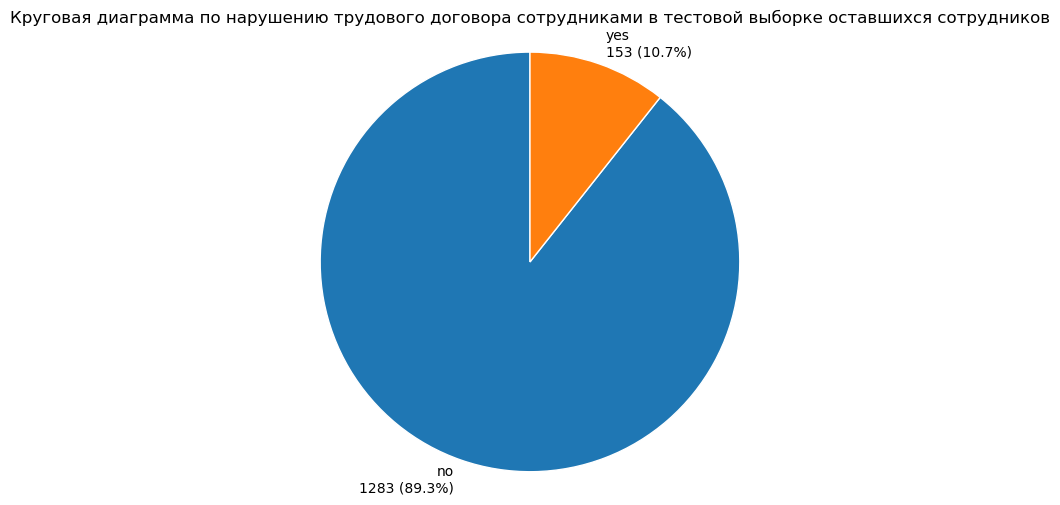

In [101]:
plot_category_pie_simple(test_no_q, "last_year_violations", title = "Круговая диаграмма по нарушению трудового договора сотрудниками в тестовой выборке оставшихся сотрудников")

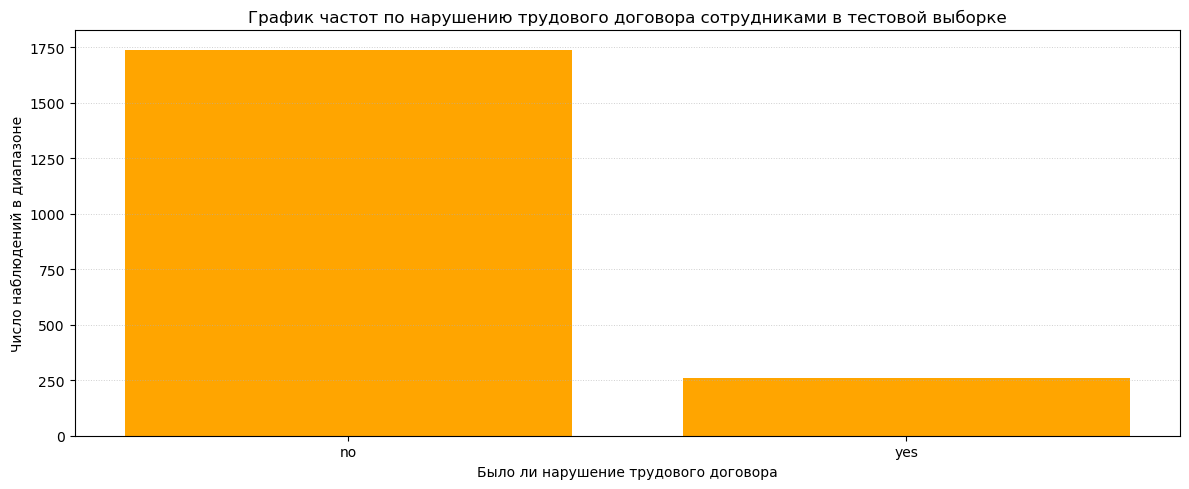

In [102]:
plot_feature_frequency(test, "last_year_violations", title = "График частот по нарушению трудового договора сотрудниками в тестовой выборке",
feature_name = "Было ли нарушение трудового договора")

- Подавляющее большинство сотрудников в компании не нарушалит трудовой договор

Отношение нарушавших и не нарушавших трудовой договор сотрудников схоже в обучающей и тестовой выбоках. Доля нарушивших трудовой договор сотрудников чуть меньше для оставшихся в компании сотрудников для обеих выборок.

#### Рассмотрим графики для категориальных упорядоченных признаков

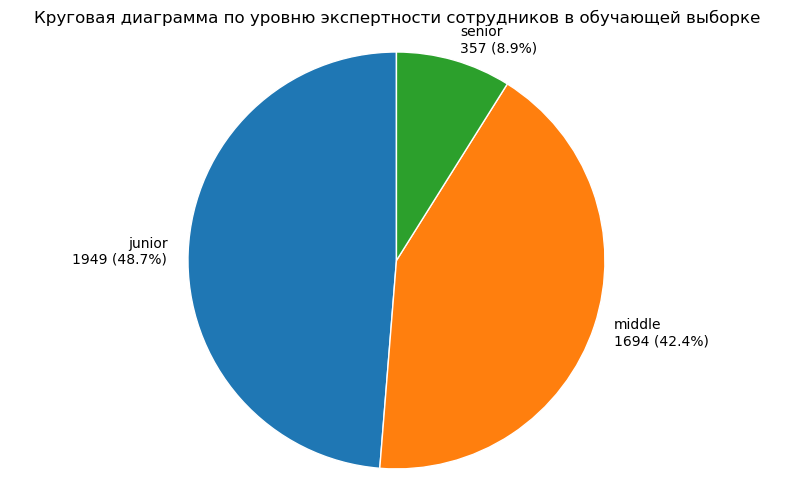

In [103]:
plot_category_pie_simple(X_train_q, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в обучающей выборке")

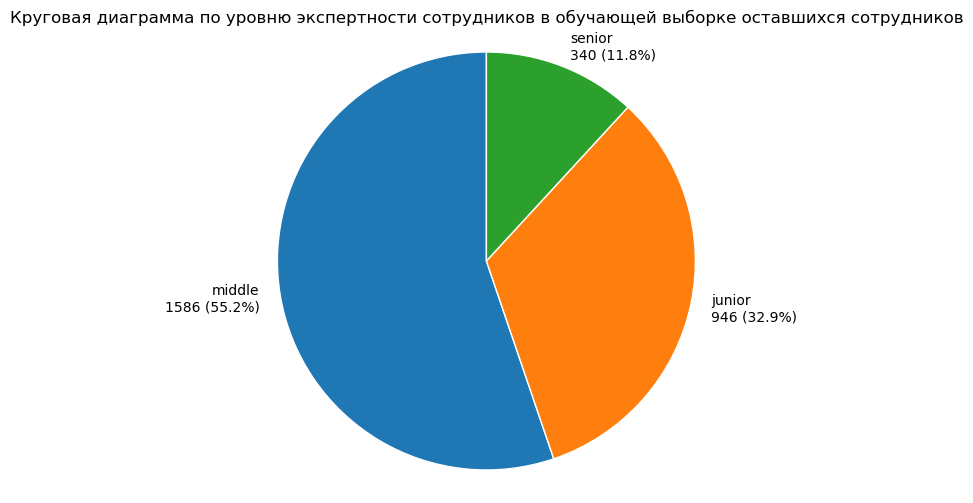

In [104]:
plot_category_pie_simple(X_train_no_q, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в обучающей выборке оставшихся сотрудников")

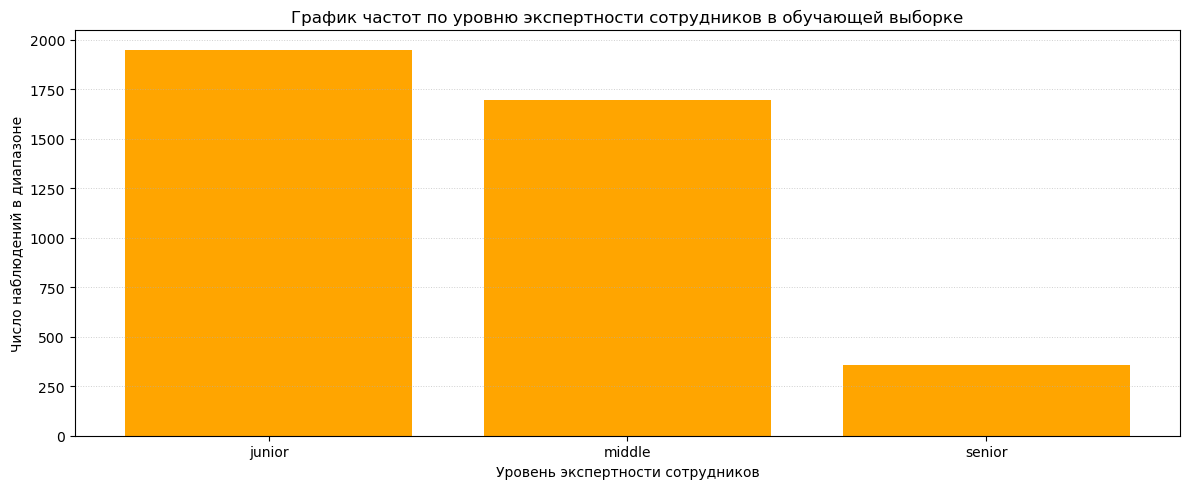

In [105]:
plot_feature_frequency(X_train_q, "level", title = "График частот по уровню экспертности сотрудников в обучающей выборке", feature_name = "Уровень экспертности сотрудников")

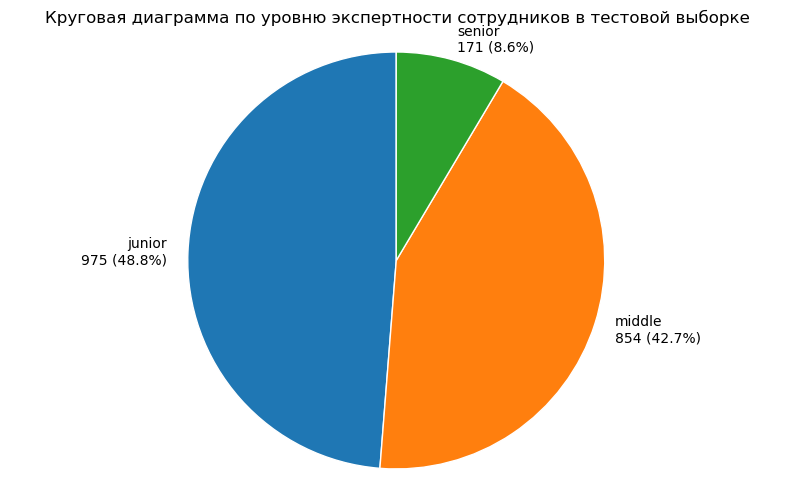

In [106]:
plot_category_pie_simple(test, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в тестовой выборке")

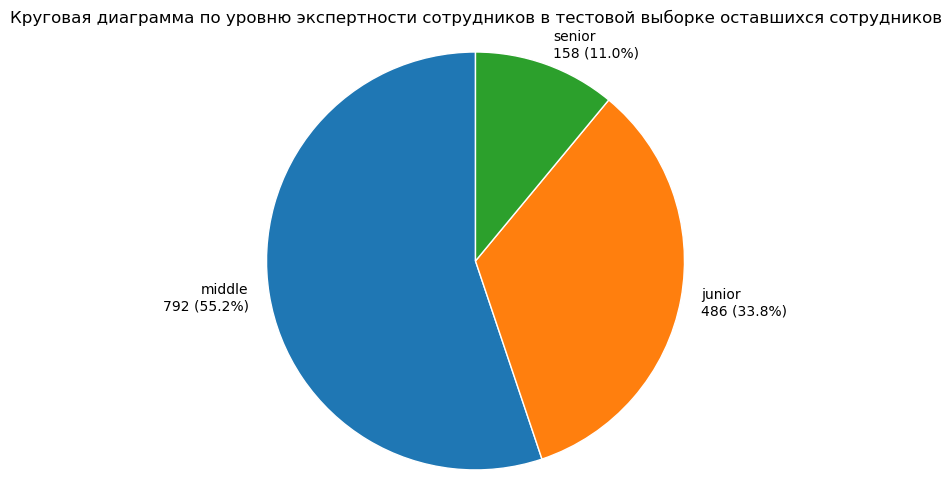

In [107]:
plot_category_pie_simple(test_no_q, "level", title = "Круговая диаграмма по уровню экспертности сотрудников в тестовой выборке оставшихся сотрудников")

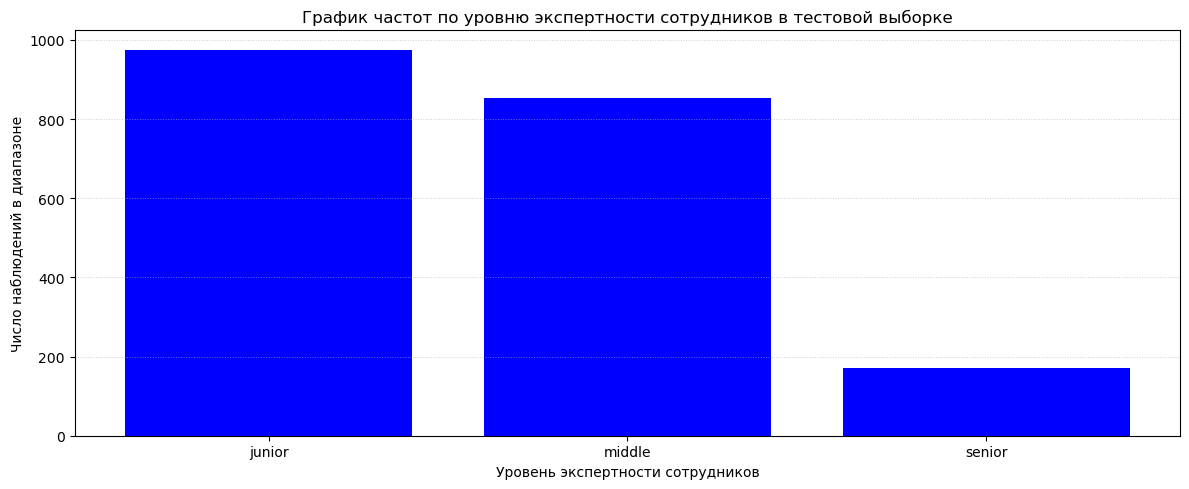

In [108]:
plot_feature_frequency(test, "level", title = "График частот по уровню экспертности сотрудников в тестовой выборке", feature_name = "Уровень экспертности сотрудников")

- Экспертных сотрудников в компании более чем в 4 раза меньше чем коллег со средним и малым опытом
- Больше всего в компании начинающих специалистов
- Количество начинающих специалистов чуть больше бывалых сотрудников

Распределение по уровню опыта сотрудников схоже в обучающей и тестовой выбоках и незначительно колеблется из-за относительно малых объёмов данных. Доля новичков среди оставшихся сотрудников заметно меньше. Вероятно, стоит ужесточить процесс отбора кандидатов для неопытных специалистов.

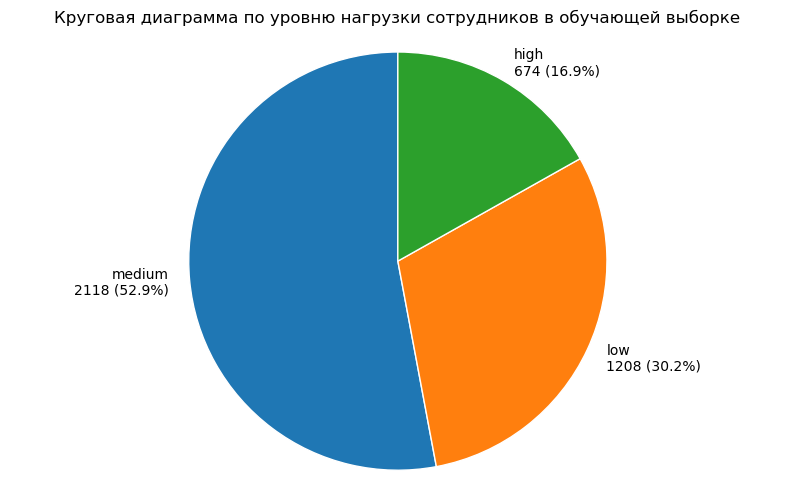

In [109]:
plot_category_pie_simple(X_train_q, "workload", title = "Круговая диаграмма по уровню нагрузки сотрудников в обучающей выборке")

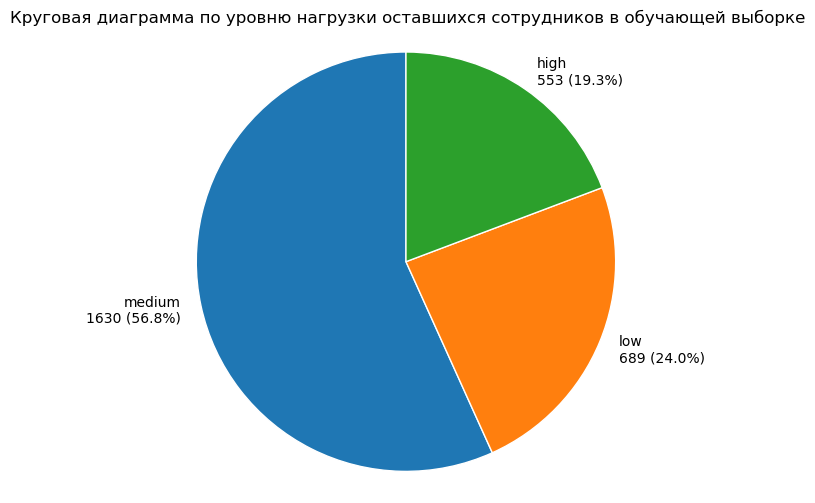

In [110]:
plot_category_pie_simple(X_train_no_q, "workload", title = "Круговая диаграмма по уровню нагрузки оставшихся сотрудников в обучающей выборке")

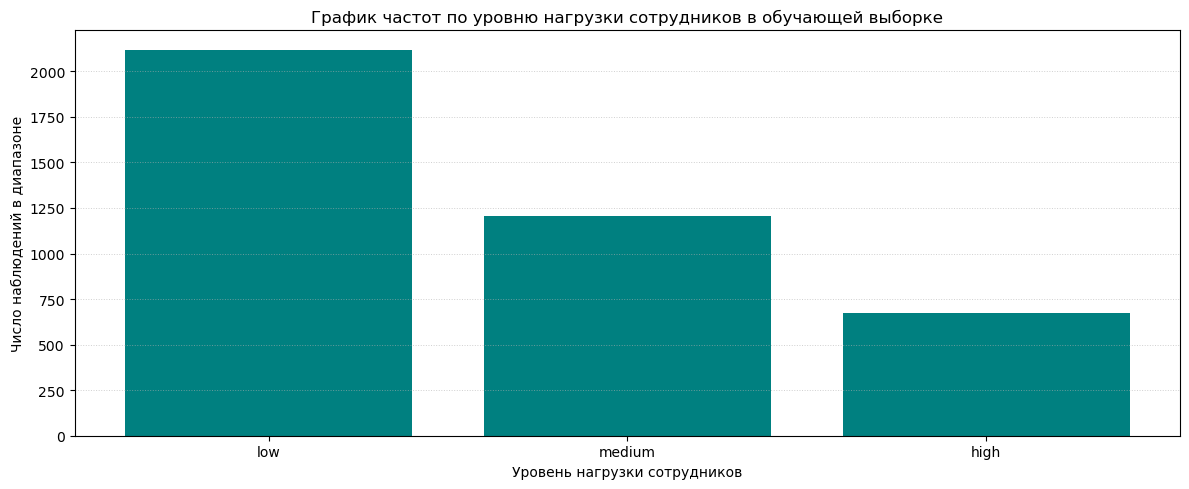

In [111]:
plot_feature_frequency(X_train_q, "workload", ordered_categories = ["low", "medium", "high"],
    title = "График частот по уровню нагрузки сотрудников в обучающей выборке",
    feature_name = "Уровень нагрузки сотрудников")

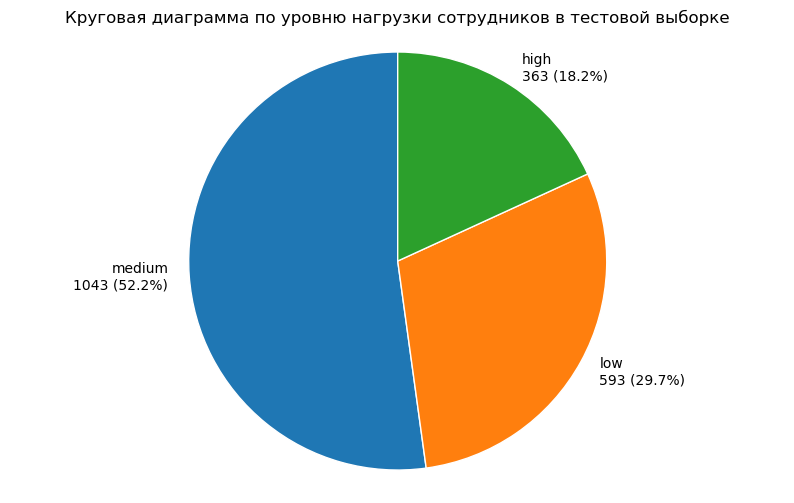

In [112]:
plot_category_pie_simple(clear_test, "workload", title = "Круговая диаграмма по уровню нагрузки сотрудников в тестовой выборке")

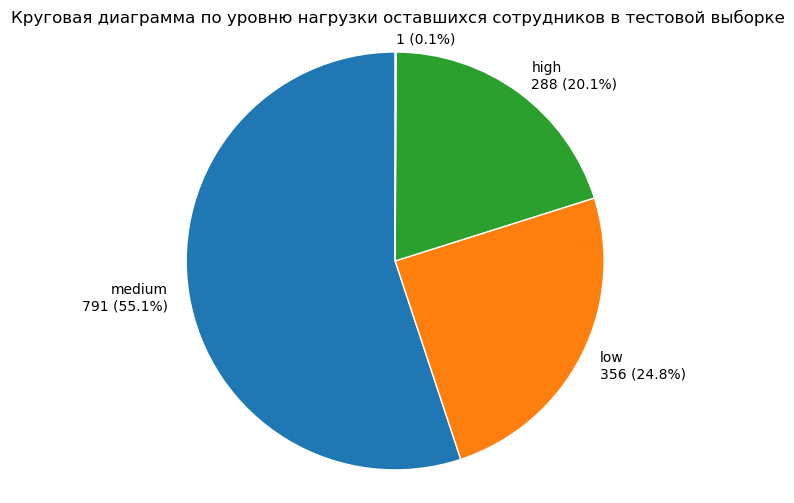

In [113]:
plot_category_pie_simple(test_no_q, "workload", title = "Круговая диаграмма по уровню нагрузки оставшихся сотрудников в тестовой выборке")

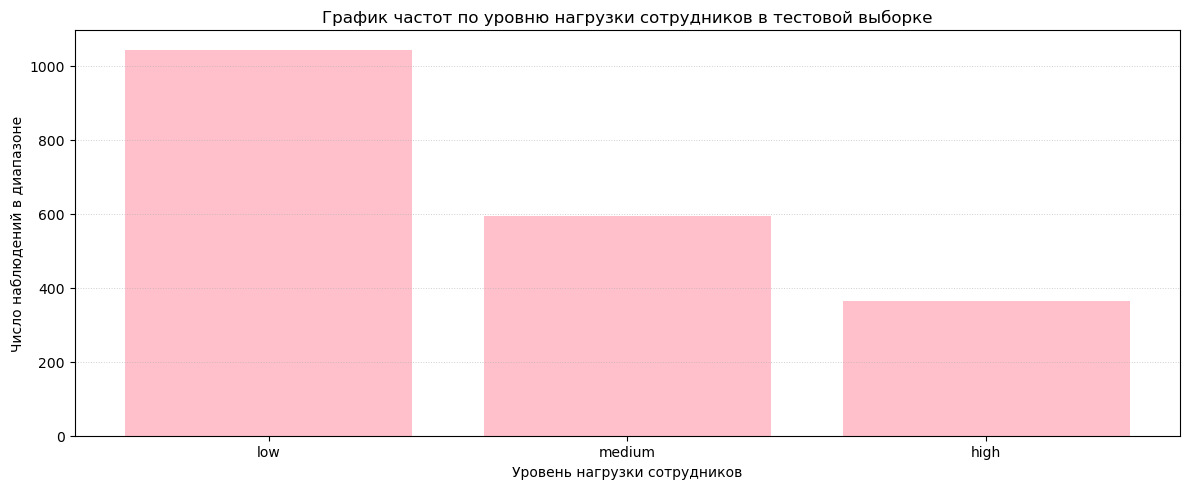

In [114]:
plot_feature_frequency(clear_test, "workload", ordered_categories = ["low", "medium", "high"],
title = "График частот по уровню нагрузки сотрудников в тестовой выборке",
feature_name = "Уровень нагрузки сотрудников")

- Сотрудников с низким уровнем нагрузки больше всего в компании
- Количество сотрудников по уровню нагрузки равномерно убывает от низкой к большой нагрузке
- Малое количество сотрудников перегружены

Распределение по уровню нагрузки сотрудников схоже в обучающей и тестовой выбоках и незначительно колеблется из-за относительно малых объёмов данных. Занятно выглядит факт совпадения долей в обучающей и тестовой выборках по категориальным порядковым признакам. Опять наводит на мысли о синтетической природе данных. При рассмотрении оставшихся сотрудников в обоих выборках наблюдается снижение числа малонагруженных

#### Вывод EDA для выборок модели классификации

- Целевой признак не сбалансирован
- Заработная плата распределена схоже с Пуассоном и имеет длинный хвост в сторону больших значений. Признак содержит выбросы, которые в силу специфики области исследования решено оставить
- Для категориальных признаков, кроме отдела, наблюдается сильный дисбаланс отдельных классов в каждом из признаков 
- Обучающая и тестовая выборки имеют схожие распределения всех признаков и могут быть использованы для обучения
- Разница обучающих выборок подготовленных для разных моделей незначительна.
- Выборка, подготовленная заказчиком для задачи классификации, создаёт впечатление наличия синтетически сгенерированных признаков 

### Теперь исследуем связи между всеми признаками обучающей выборки в разрезе целевых признаков

#### Рассмотрим распределения для количественных признаков

Из-за отстутствия целевых признаков для всех наблюдений в обучающих выборках и после выводов о схожести данных в тестовой и обучающих выборках рассмотрим детальнее связи между целевыми и остальными признаками на тестовой выборке 

In [115]:
def plot_numerical_distribution(df: pd.DataFrame, 
                                numerical_feature: str, 
                                target_feature: str = "job_satisfaction_rate",
                                title: str = None):
    quit_vals = df["quit"].dropna().unique()
    val_left = quit_vals[0]
    colors = pd.Series("red", index=df.index)
    colors[df["quit"] == val_left] = "green"
    colors[df["quit"].isnull()] = "grey"
    alphas = pd.Series(0.6, index = df.index)
    alphas[colors == "grey"] = 0.1

    fig, ax = plt.subplots(figsize = (12, 7))
    ax.scatter(df[numerical_feature], df[target_feature], c = colors, alpha = alphas, s = 50, edgecolors = 'w', linewidth = 0.5)
    
    plot_title = title if title else f'Зависимость "{target_feature}" от "{numerical_feature}"'
    ax.set_title(plot_title, fontsize = 16, pad = 20)
    ax.set_xlabel(numerical_feature.replace('_', ' ').capitalize(), fontsize = 12)
    ax.set_ylabel(target_feature.replace('_', ' ').capitalize(), fontsize = 12)
    legend_patches = [
        mpatches.Patch(color = "red", label = "Покинул"),
        mpatches.Patch(color = "green", label = "Остался"),
        mpatches.Patch(color = "grey", label = "Пропуск")
    ]
    ax.legend(handles = legend_patches, title = "Статус сотрудника", loc = "upper right")
    
    plt.show()

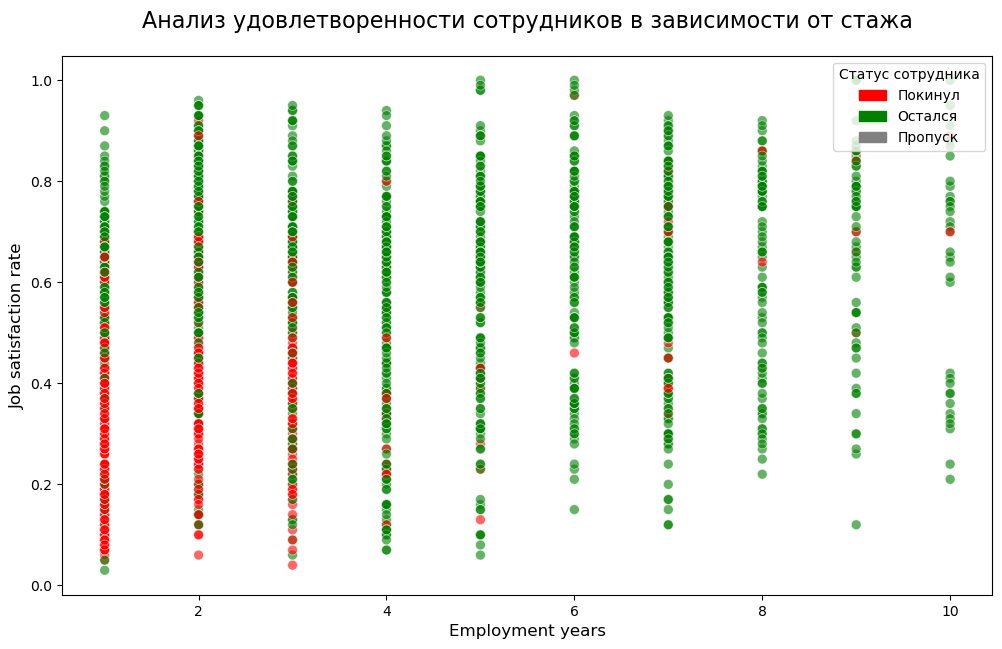

In [116]:
plot_numerical_distribution(
    test, 
    "employment_years", 
    title = "Анализ удовлетворенности сотрудников в зависимости от стажа"
)

- Сотрудники, которые работают в компании более 5 лет очень редко катастрофически недовольны своим рабочим местом.
- При этом заметно, что большое количество сотрудников начинают покидать компанию до 4 лет стажа в ней.

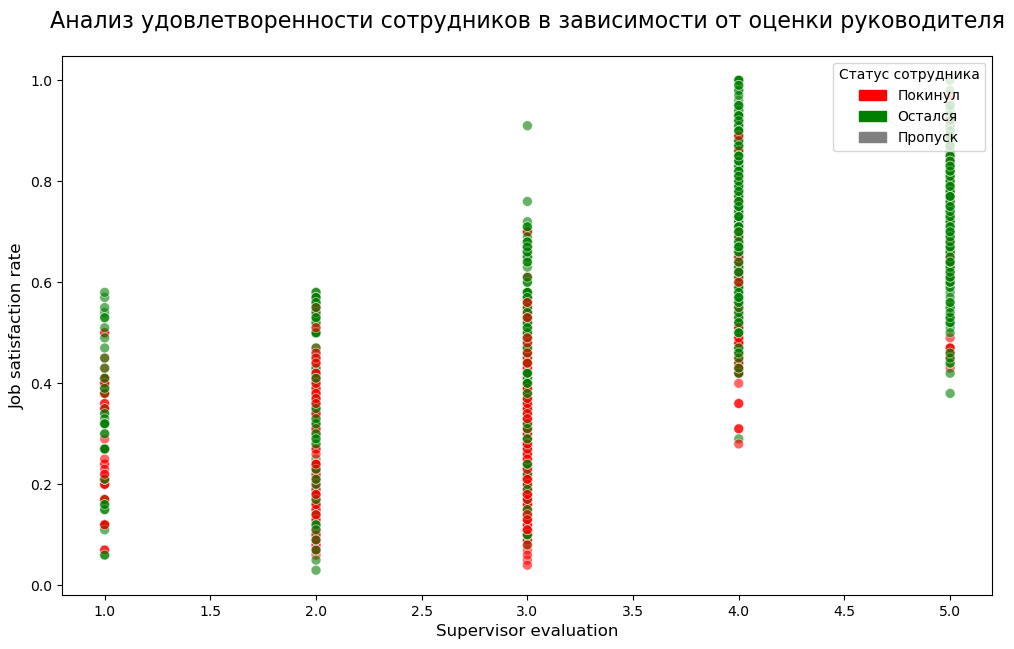

In [117]:
plot_numerical_distribution(
    test, 
    "supervisor_evaluation", 
    title = "Анализ удовлетворенности сотрудников в зависимости от оценки руководителя"
)

- Сотрудники с низкими оценками руководителей менее всего были довольны своей работой и чаще остальных покидали её.
- Для оценок от 3 и выше наблюдается прямая зависимость между удовлетворённостью сотрудника работой и оценкой его руководителя.
- Заметна логичная особенность "сотрудников-хорошистов" с 3 и 4 баллами по оценкам руководителей: при низкой их удовлетворённостю рабочим местом и относительно высоких оценках сотрудники чаще уходили из компании. При высокой же удовлетворённости и таких же оценках руководства "хорошисты" чащё оставались в компании. 

Можно предположить, что позитивные оценки руководства мотивируют сотрудников продолжать работать в компании далее, а негативные воспринимаются как токсичность.


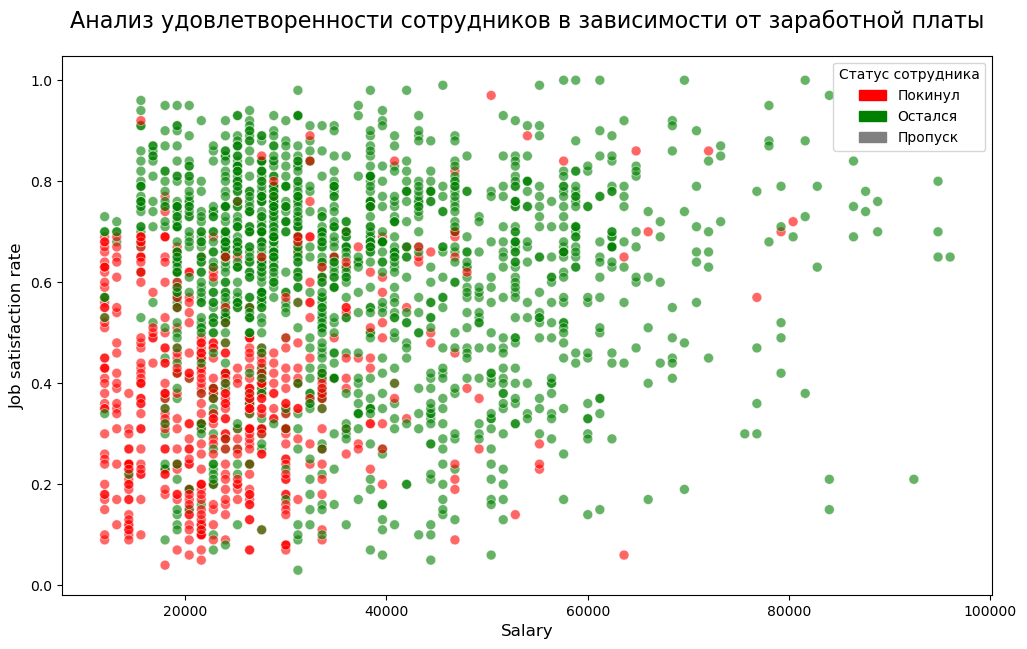

In [118]:
plot_numerical_distribution(
    test, 
    "salary", 
    title = "Анализ удовлетворенности сотрудников в зависимости от заработной платы"
)

- Заметно, что сотрудники с высокой удовлетворённостью рабочим местом чаще всего продолжают работу вне зависимости от их оплаты труда
- Низкая и умеренно-высокая удовлетворённость сотрудников работой в компании при условии оплаты труда менее 40_000 у.е. повышают риски того, что сотрудник прекратит работу в компании
- Заметно, что удовлетворённость сотрудников работой не зависит от оплаты труда

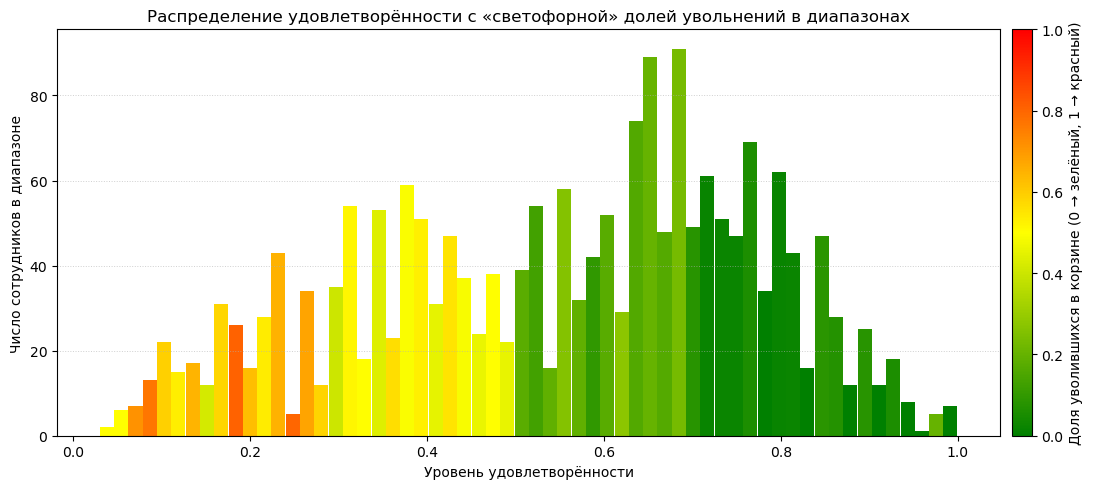

In [119]:
data = test[["job_satisfaction_rate", "quit"]].dropna(subset = ["job_satisfaction_rate", "quit"])
data["quit_enc"] = data["quit"].map({"no": 0.0, "yes": 1.0}).astype("float")

x_min, x_max = data["job_satisfaction_rate"].min(), data["job_satisfaction_rate"].max()
bins = np.linspace(x_min, x_max, NUM_BINS + 1)
bin_widths = np.diff(bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

bin_idx = np.digitize(data["job_satisfaction_rate"].to_numpy(), bins, right = False) - 1
bin_idx = np.clip(bin_idx, 0, NUM_BINS - 1)

counts = np.zeros(NUM_BINS, dtype = int)
quit_mean = np.full(NUM_BINS, np.nan, dtype = float)

for i in range(NUM_BINS):
    mask = (bin_idx == i)
    if np.any(mask):
        counts[i] = mask.sum()
        quit_mean[i] = data.loc[mask, "quit_enc"].mean()

traffic_cmap = LinearSegmentedColormap.from_list("traffic", ["green", "yellow", "red"], N = 256)
norm = Normalize(vmin = 0.0, vmax = 1.0)

colors = traffic_cmap(norm(np.nan_to_num(quit_mean, nan = 0.5)))  

plt.figure(figsize = (12, 5))
plt.bar(bin_centers, counts, width = bin_widths * 0.98, color = colors, edgecolor = "none")

plt.xlabel("Уровень удовлетворённости")
plt.ylabel("Число сотрудников в диапазоне")
plt.title("Распределение удовлетворённости с «светофорной» долей увольнений в диапазонах")
plt.grid(axis = "y", linestyle = ":", linewidth = 0.7, alpha = 0.6)

sm = plt.cm.ScalarMappable(norm = norm, cmap = traffic_cmap)
sm.set_array([])
cbar = plt.colorbar(sm, pad = 0.01)
cbar.set_label("Доля уволившихся в корзине (0 → зелёный, 1 → красный)")

plt.tight_layout()
plt.show()


- Удовлетворённость сотрудника рабочим местом напрямую влияет на прололжение его работы в компании
- Вероятность ухода сотрудника резко падает при удовлетворённости ниже среднего
- График распределения частот удовлетворённости сотрудников мультимодален: количество неудовлетворённых сотрудников увеливичается до ~0.38 и далее падает до нейтрального уровня удовлетворённости. После нейтрального уровня удовлетворённость сотрудников резко повышается до ~0.68 и далее так же падает
- Чаще всего сотрудники умеренно удовлетворены своим рабочим местом

### Рассмотрим распределения для качественных признаков.

In [120]:
def plot_category_pie_with_satisfaction_rate(
    df: pd.DataFrame,
    category_col: str = "dept",
    satisfaction_col: str = "job_satisfaction_rate",
    top_n: int = 8,
    title: str = "Удовлетворённость работой по департаментам",
    red_hex: str = "#E74C3C",
    green_hex: str = "#2ECC71",
    others_label: str = "Другие",
    others_color: str = "#B0BEC5",
    explode_value: float = 0.05
):
    category_counts = df[category_col].value_counts()
    top_categories = category_counts.head(top_n)
    other_count = int(category_counts.iloc[top_n:].sum())
    has_others = other_count > 0

    if has_others:
        top_categories[others_label] = other_count

    satisfaction_by_cat = (
        df[[category_col, satisfaction_col]]
        .groupby(category_col)[satisfaction_col]
        .mean()
    )
    real_top_cats = [c for c in top_categories.index if c != others_label]
    real_means = satisfaction_by_cat.reindex(real_top_cats)
    vmin = float(np.nanmin(real_means.values)) if len(real_means) else 0.0
    vmax = float(np.nanmax(real_means.values)) if len(real_means) else 1.0

    if np.isclose(vmin, vmax):
        vmin -= 0.5
        vmax += 0.5

    norm = Normalize(vmin = vmin, vmax = vmax)
    cmap = LinearSegmentedColormap.from_list("satisfaction_cmap", ["#F39C12", "#F7DC6F", "#D4E157"])

    colors = []
    for cat in top_categories.index:
        if cat == others_label:
            colors.append(others_color)
        else:
            mean_val = satisfaction_by_cat.get(cat, np.nan)
            colors.append(cmap(norm(mean_val)))

    total = len(df)
    labels = []
    for cat, count in top_categories.items():
        pct = 100 * count / total if total > 0 else 0
        if cat == others_label:
            labels.append(f"{cat}\n({count} чел., {pct:.1f}%)")
        else:
            mean_val = satisfaction_by_cat.get(cat, np.nan)
            sat_txt = "н/д" if pd.isna(mean_val) else f"{mean_val:,.2f}".replace(",", " ")
            labels.append(f"{cat}\n({count} чел., {pct:.1f}% | ср. удовл.: {sat_txt})")

    explode = [explode_value] * len(top_categories)

    fig, ax = plt.subplots(figsize = (18, 10))
    wedges, texts, autotexts = ax.pie(
        top_categories.values,
        labels = labels,
        colors = colors,
        autopct = "%1.1f%%",
        startangle = 90,
        explode = explode,
        shadow = True,
        textprops = {"fontsize": 10, "fontweight": "bold"},
        wedgeprops = dict(linewidth = 1, edgecolor = "white")
    )
    ax.set_title(title, fontsize = 14, fontweight = "bold", pad = 20)
    ax.axis("equal")

    sm = ScalarMappable(norm = norm, cmap = cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax = ax, fraction = 0.046, pad = 0.04, format = mtick.PercentFormatter(1, decimals = 1))
    cbar.set_label("Средняя удовлетворённость сотрудников (по департаменту)", fontsize = 11)

    plt.show()


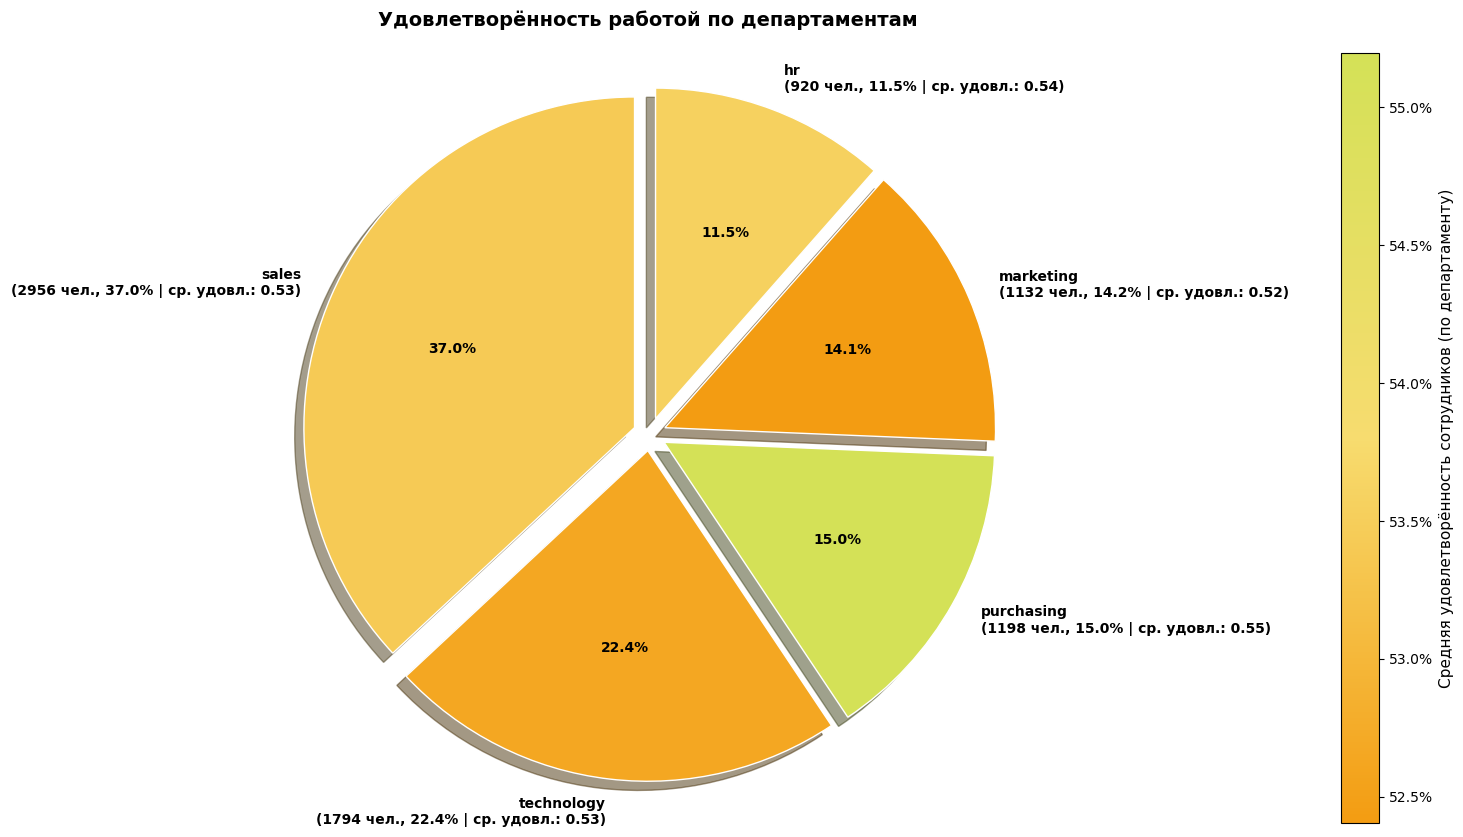

In [121]:
plot_category_pie_with_satisfaction_rate(train)

- Значения удовлетворённости сотрудников во всех департаментах незначительно выше среднего
- Колебания средней удовлетворённости в зависимости от отдела не более 3%
- Наименее удовлетворены работники технологического отдела и отдета маркетинга
- Наиболее удовелетворены работники отдела закупок
- Больше трети сотрудников работают в отделе продаж
- Больше пятой части сотрудников работают в технологическом отделе
- В остальных отделах работает приблизительно равное количество сотрудников

В целом ясно, что компания занимается продажей товаров т.к. есть отдел закупок. Компания сосредоточила человеческие ресурсы на продажах и IT инфраструктуре для ведения бизнеса. Значительных различий в комфортности работы в различных департаментах не наблюдается. Технологический отдел по численности сотрудников находится на втором месте и при этом имеет наименьшую среднюю удовлетворённость сотрудников. Это может порождать повышенные риски для операционной деятельности компании. HR оделу стоит детальнее исследовать причины неудовлетворённости сотрудников в этом отделе.

In [122]:
def plot_quit_grouped_bars(
    df: pd.DataFrame,
    category_col: str = "dept",
    ordered_categories: Optional[list] = None,
    quit_col: str = "quit",
    title: str = "Статус сотрудников по категориям",
    x_label: str = "Категория",
    green_hex: str = "#2ECC71",
    red_hex: str = "#E74C3C",
    alpha: float = 0.60,
    width: float = 0.42,
    rotation: int = 0
):
    tmp = df[[category_col, quit_col]].copy()
    tmp["status"] = tmp[quit_col].map({"no": "Остались", "yes": "Ушли"})
    tmp = tmp.dropna(subset = ["status", category_col])

    g = (
        tmp.groupby([category_col, "status"]).size()
        .unstack("status")
        .reindex(columns = ["Остались", "Ушли"])
    )
    if ordered_categories is not None:
        g = g.reindex(ordered_categories)
    g = g.fillna(0).astype(int)

    depts = g.index.tolist()
    stayed_counts = g["Остались"].values if "Остались" in g.columns else np.zeros(len(g))
    quit_counts = g["Ушли"].values if "Ушли" in g.columns else np.zeros(len(g))
    totals = stayed_counts + quit_counts
    stay_share = np.divide(stayed_counts, totals, out = np.zeros_like(stayed_counts, dtype = float), where = totals > 0) * 100.0
    quit_share = np.divide(quit_counts, totals, out = np.zeros_like(quit_counts, dtype = float), where = totals > 0) * 100.0
    x = np.arange(len(depts))

    fig, ax = plt.subplots(figsize = (18, 9))
    bars_stay = ax.bar(x - width / 2, stayed_counts, width, label = "Остались", color = green_hex, alpha = alpha)
    bars_quit = ax.bar(x + width / 2, quit_counts, width, label = "Ушли", color = red_hex, alpha = alpha)

    ax.bar_label(bars_stay, labels = [f"{v:.1f}%" for v in stay_share], padding = 3, fontsize = 9, fontweight = "bold")
    ax.bar_label(bars_quit, labels = [f"{v:.1f}%" for v in quit_share], padding = 3, fontsize = 9, fontweight = "bold")
    ax.set_xticks(x)
    ax.set_xticklabels(depts, rotation = rotation, ha = "center")
    ax.set_xlabel(x_label, fontsize = 12)
    ax.set_ylabel("Количество сотрудников", fontsize = 12)
    ax.set_title(title, fontsize = 14, fontweight = "bold", pad = 12)
    ax.grid(axis = "x", linestyle = "--", linewidth = 0.8, alpha = 0.8)
    ax.legend(frameon = False)

    fig.tight_layout()
    plt.show()


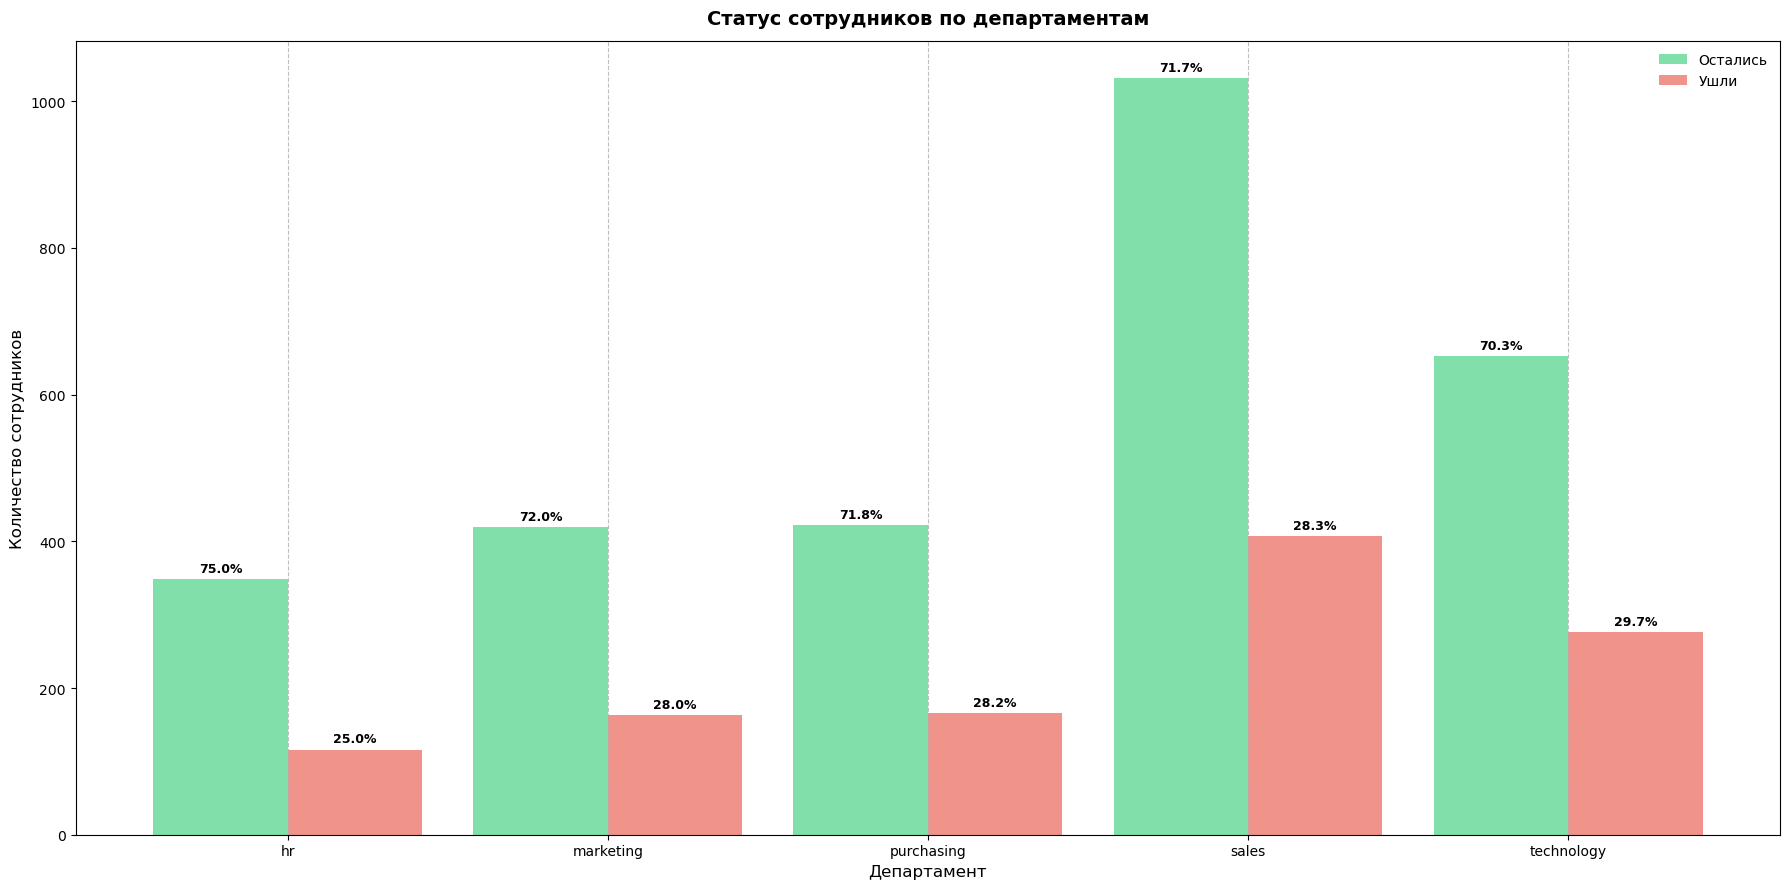

In [123]:
plot_quit_grouped_bars(train,
    title = "Статус сотрудников по департаментам",
    x_label = "Департамент")

- Больше всего сотрудников уходит в абсолютном смысле (500+ человек) из отдела продаж
- Относительно всех работающих в отделе сотрудников бошльше всего человек уходит из технологического отдела(29.5%) 
- Меньше всего сотрудников в относительном смысле уходит из HR отдела (24.1%)
- В любом из отделов примерно каждый четвёртый (или более) сотрудник покидает команду
- Разница между долей покинувших рабочее место сотрудников в лучшем и худшем департаменте составляет 4,7%

Текучка кадров в отделе продаж на допустимом уровне и на мой взгляд обусловлена спецификой работы в продажах. Информацию о технологическом отделе стоит внимательнее изучить HR'ам

In [124]:
def plot_ordered_category_bars(
    df: pd.DataFrame,
    category_col: str,
    ordered_categories: list,
    satisfaction_col: str = "job_satisfaction_rate",
    title: str = "Распределение сотрудников по категориям и удовлетворённости",
    x_label: str = "Категория",
    greenish_yellow_hex: str = "#D4E157",
    yellow_hex: str = "#F7DC6F",
    reddish_yellow_hex: str = "#F39C12",
    width: float = 0.7,
    alpha: float = 0.8,
    show_colorbar: bool = True
):
    counts = df.groupby(category_col).size().reindex(ordered_categories, fill_value = 0)
    means = df.groupby(category_col)[satisfaction_col].mean().reindex(ordered_categories)
    vals = means.values.astype(float)
    if np.all(np.isnan(vals)):
        vmin, vmax = 0.0, 1.0
    else:
        vmin = float(np.nanmin(vals))
        vmax = float(np.nanmax(vals))
    if np.isclose(vmin, vmax):
        vmin -= 0.5
        vmax += 0.5

    norm = Normalize(vmin = vmin, vmax = vmax)
    cmap = LinearSegmentedColormap.from_list("yellow_satisfaction", [reddish_yellow_hex, yellow_hex, greenish_yellow_hex])

    colors = []
    for m in means.values:
        if pd.isna(m):
            colors.append(yellow_hex)
        else:
            colors.append(cmap(norm(m)))

    total = float(counts.sum())
    pct_share = (counts.values.astype(float) / total * 100.0) if total > 0 else np.zeros_like(counts.values, dtype = float)

    x = np.arange(len(ordered_categories))
    fig, ax = plt.subplots(figsize = (16, 9))
    bars = ax.bar(x, counts.values.astype(float), width = width, color = colors, edgecolor = "white", linewidth = 1, alpha = alpha)

    ax.bar_label(bars, labels = [f"{v:.1f}%" for v in pct_share], padding = 3, fontsize = 9, fontweight = "bold")
    ax.set_xticks(x)
    ax.set_xticklabels(ordered_categories)
    ax.set_xlabel(x_label, fontsize = 12)
    ax.set_ylabel("Количество сотрудников", fontsize = 12)
    ax.set_title(title, fontsize = 14, fontweight = "bold", pad = 14)
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.8, alpha = 0.5)
    ax.margins(x = 0.02)

    if show_colorbar:
        sm = ScalarMappable(norm = norm, cmap = cmap)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax = ax, fraction = 0.046, pad = 0.04, format = mtick.PercentFormatter(1, decimals = 1))
        cbar.set_label("Средняя удовлетворённость (по категории)", fontsize = 11)

    fig.tight_layout()
    plt.show()


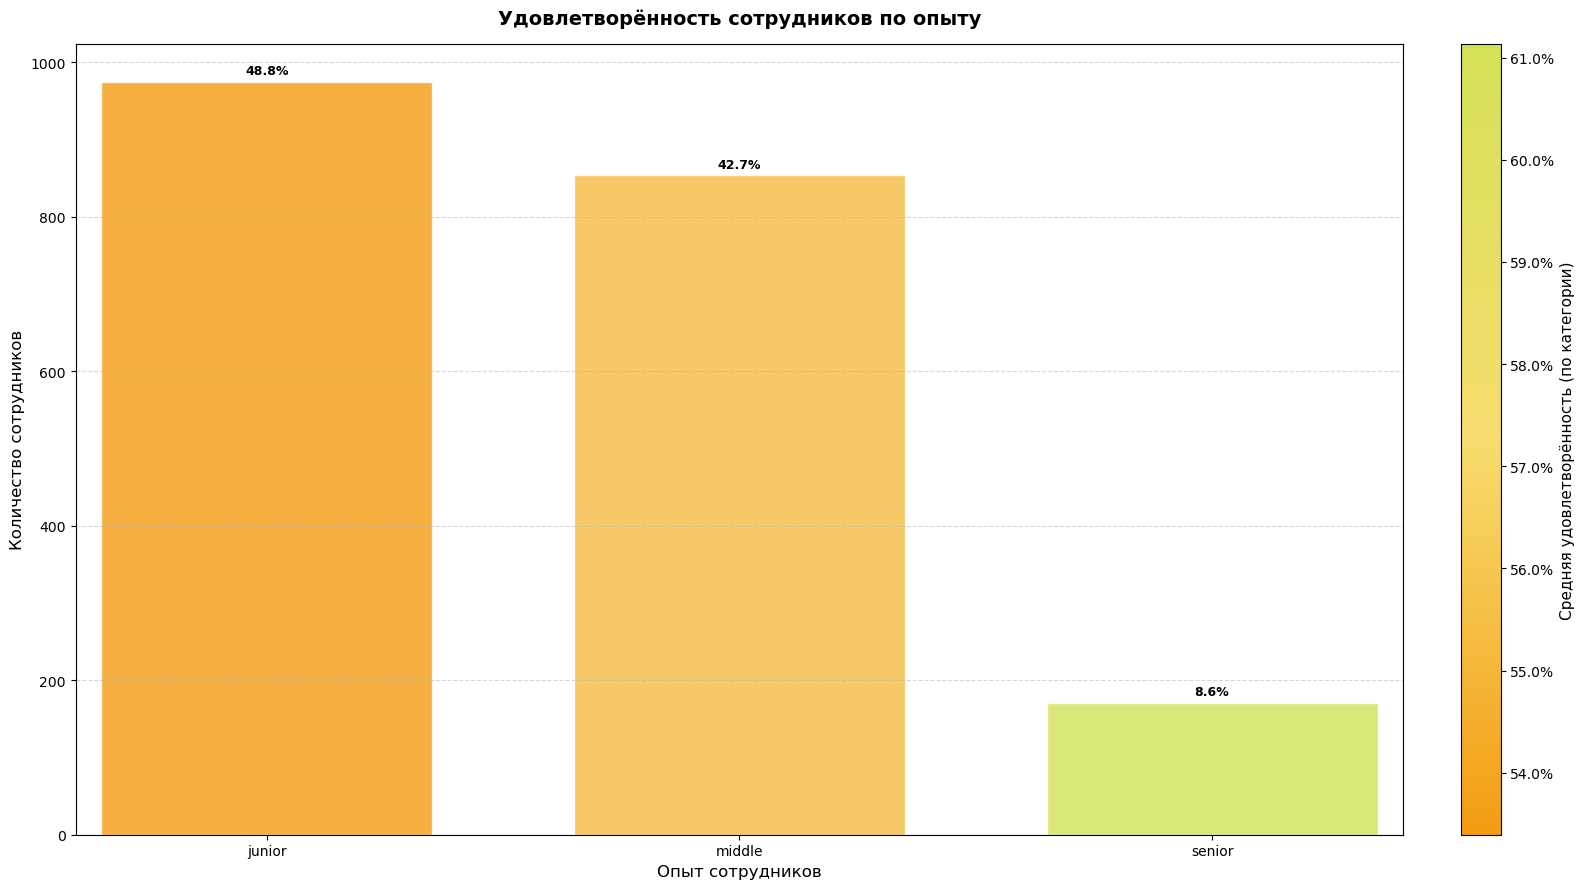

In [125]:
plot_ordered_category_bars(test,
    category_col = "level",
    ordered_categories = ["junior", "middle", "senior"],
    title = "Удовлетворённость сотрудников по опыту",
    x_label = "Опыт сотрудников")

- Опытных сотрудников в компании более чем в 9 раз меньше, чем новичков и бывалых
- Новичков незначительно больше чем бывалых сотрудников
- Меньше всего довольны рабочими местами новички
- Опытные сотрудники значительно больше довольны работой в компании

Стоит лучше продумать процесс адаптации новых сотрудников т.к. среди них больше всего недовольных работой людей

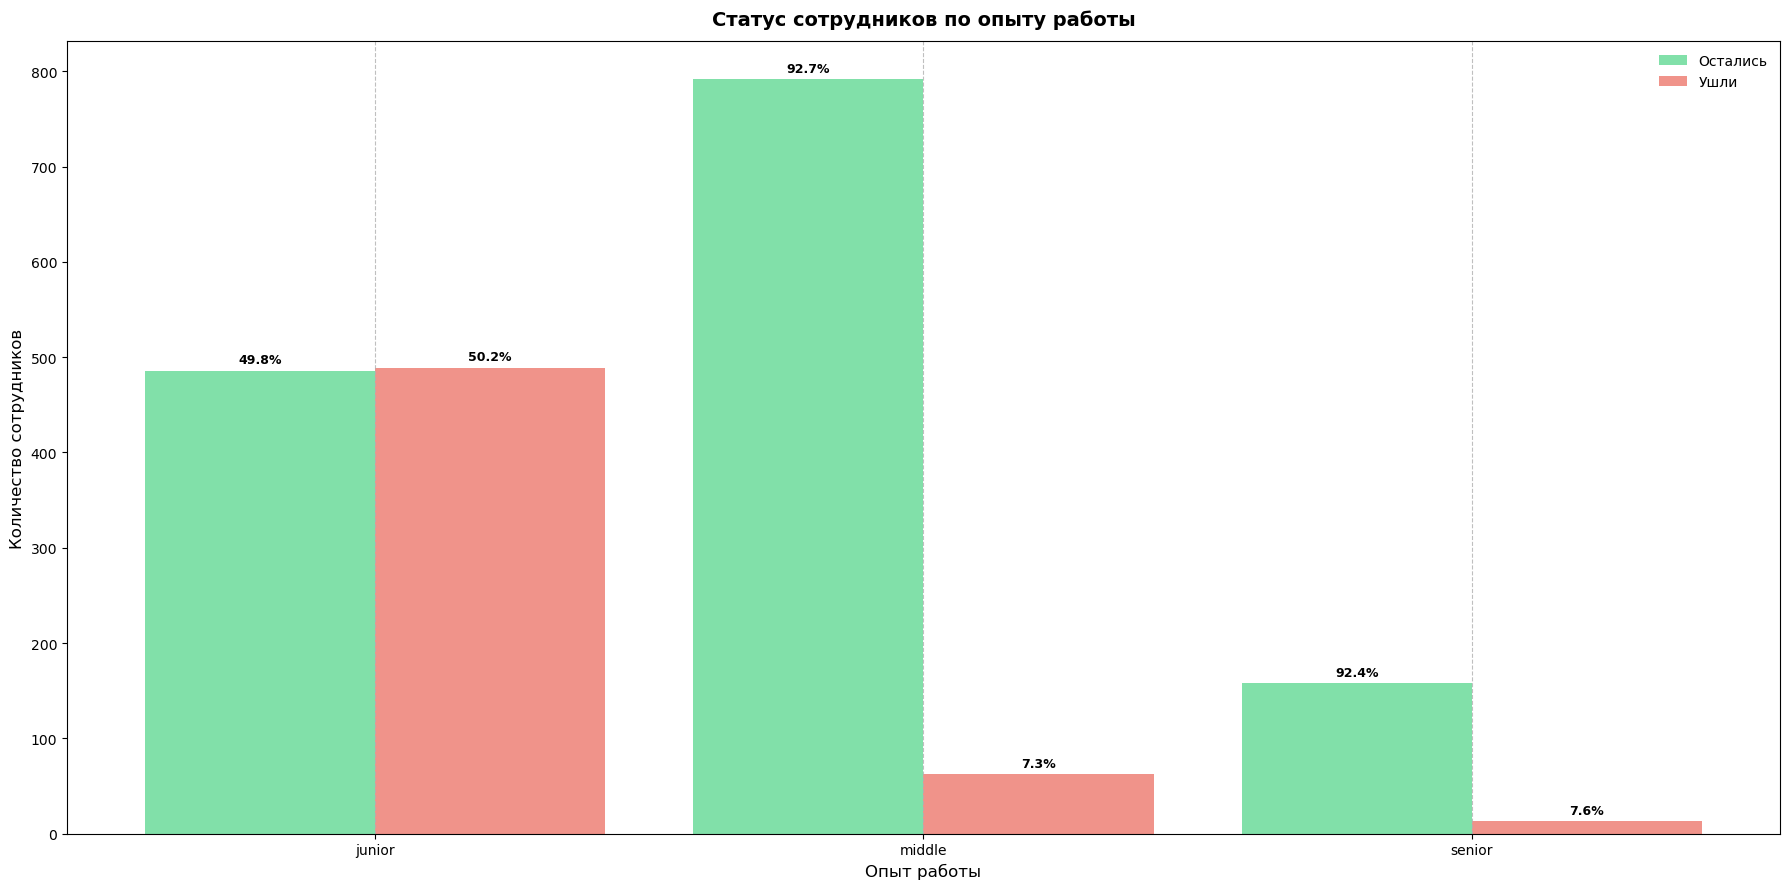

In [126]:
plot_quit_grouped_bars(test,
    category_col = "level",
    ordered_categories = ["junior", "middle", "senior"],
    title = "Статус сотрудников по опыту работы",
    x_label = "Опыт работы")

- Чуть более половины новичков в профессии покидает компанию
- Доля опытных специалистов покидающих компанию более чем в 7 раз меньше и составляет чуть менее 7%
- Бывалые и опытные сотрудники покидают работу менее чем в 1 из 10 случаев

В целом, адекватные показатели текучки с учётом испытательных сроков и низкой текучки опытных сотрудников. Можно попробовать обратиться к рекрутёрам и ужесточить процесс отбора кандидатов для снижения их оттока а так же улучшить процесс адаптации.

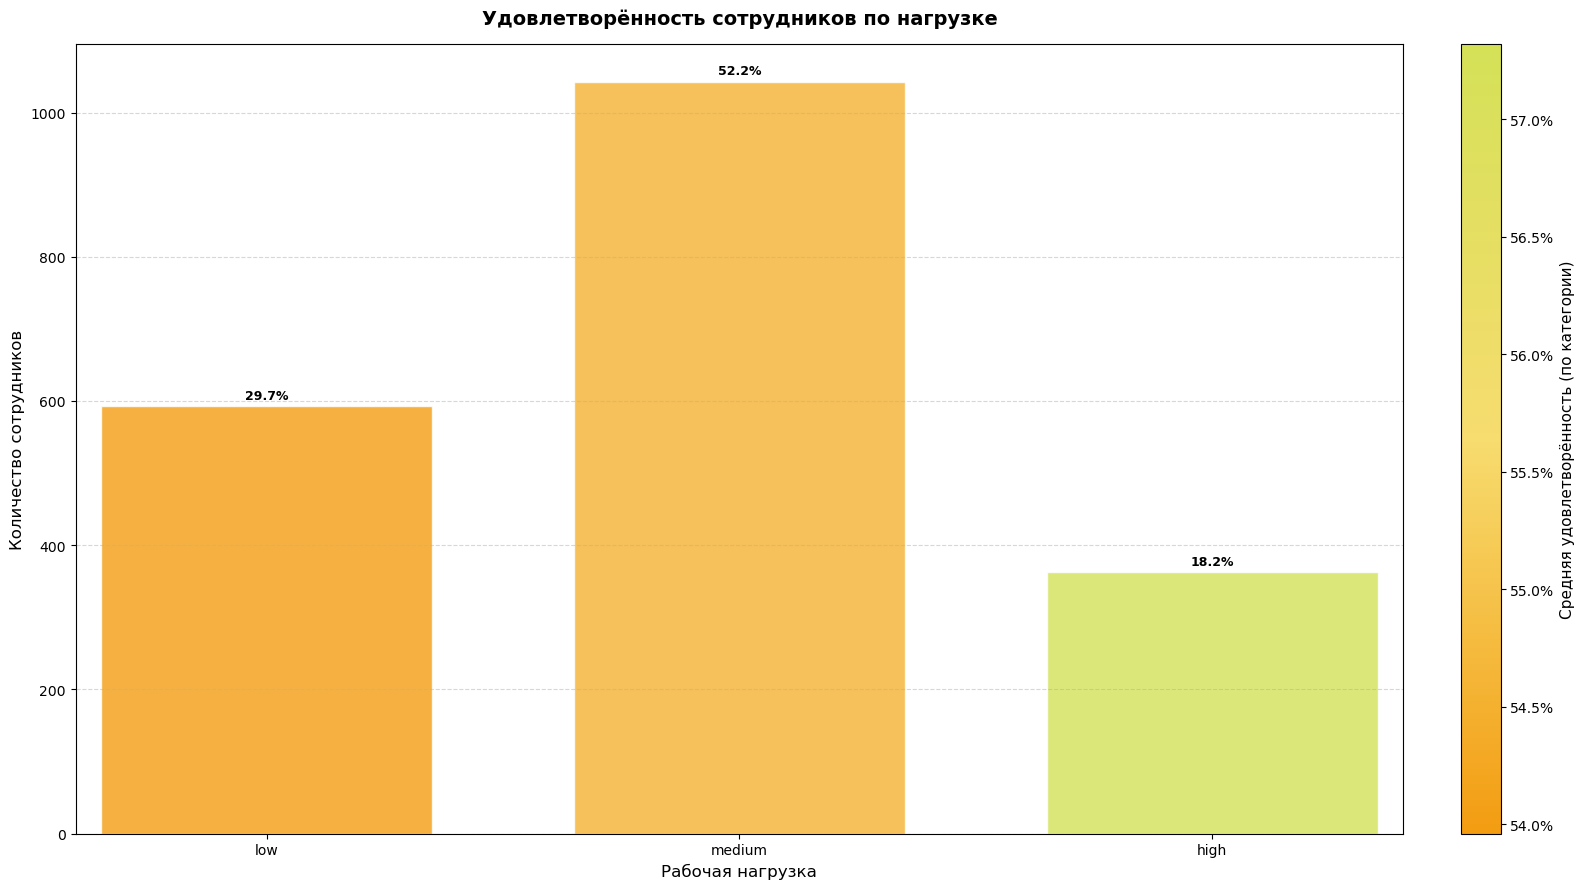

In [127]:
plot_ordered_category_bars(test,
    category_col = "workload",
    ordered_categories = ["low", "medium", "high"],
    title = "Удовлетворённость сотрудников по нагрузке",
    x_label = "Рабочая нагрузка")

- Парадоксально, но ~20% сотрудников, оценивших свою нагрузку как высокую, более довольны своим местом работы
- ~52% сотрудников, имеющих среднюю нагрузку меньше всего довольны своим местом работы
- ~30% сотрудников недогружены, есть потенциал к повышению производительности труда

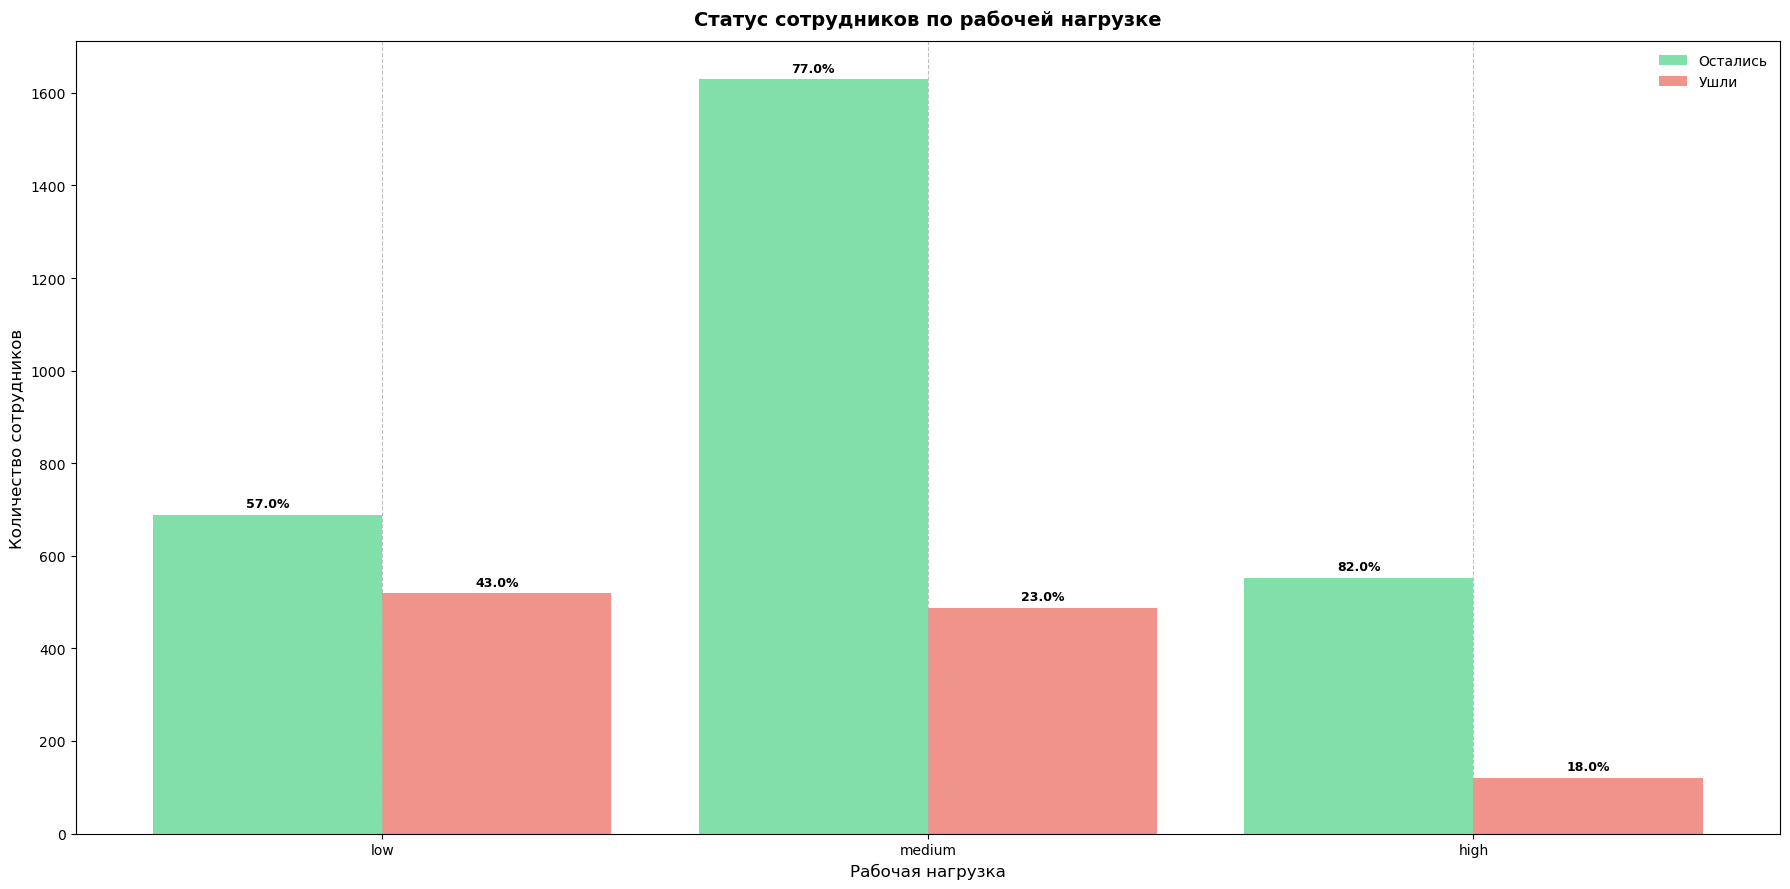

In [128]:
plot_quit_grouped_bars(train,
    category_col = "workload",
    ordered_categories = ["low", "medium", "high"],
    title = "Статус сотрудников по рабочей нагрузке",
    x_label = "Рабочая нагрузка")

Схожая с удовлетворённостью ситуация:

- Работники с низким уровнем нагрузки в 42% случаев покидают работу
- Работники с высоким уровнем нагрузки в ~2 реже покидают работу, чем малонагруженные коллеги
- Примерно четверть сотрудников со средним уровнем нагрузки покидает компанию

Высокий уровень нагрузки, вероятно, воспринимается сотрудниками как интересные вызовы и возможность развития, HR департаменту стоит детальнее изучить этот вопрос в рамках компании

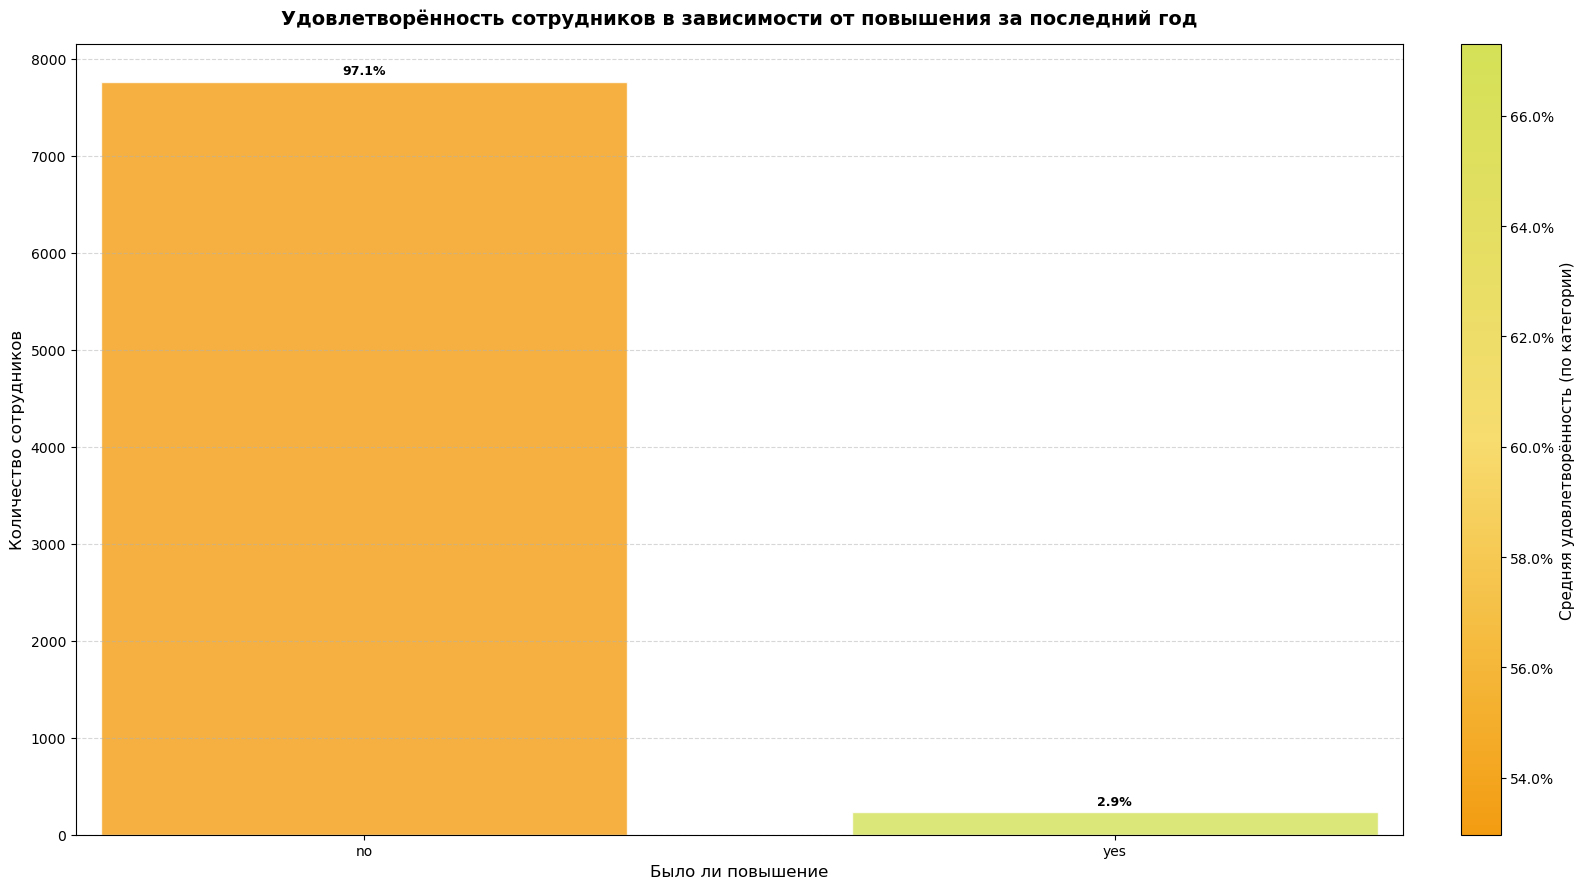

In [129]:
plot_ordered_category_bars(train,
    category_col = "last_year_promo",
    ordered_categories = ["no", "yes"],
    title = "Удовлетворённость сотрудников в зависимости от повышения за последний год",
    x_label = "Было ли повышение")

- Сотрудников, получивших повышение всего ~3%
- Повышение значительно влияет на удовлетворённость сотрудников работой 

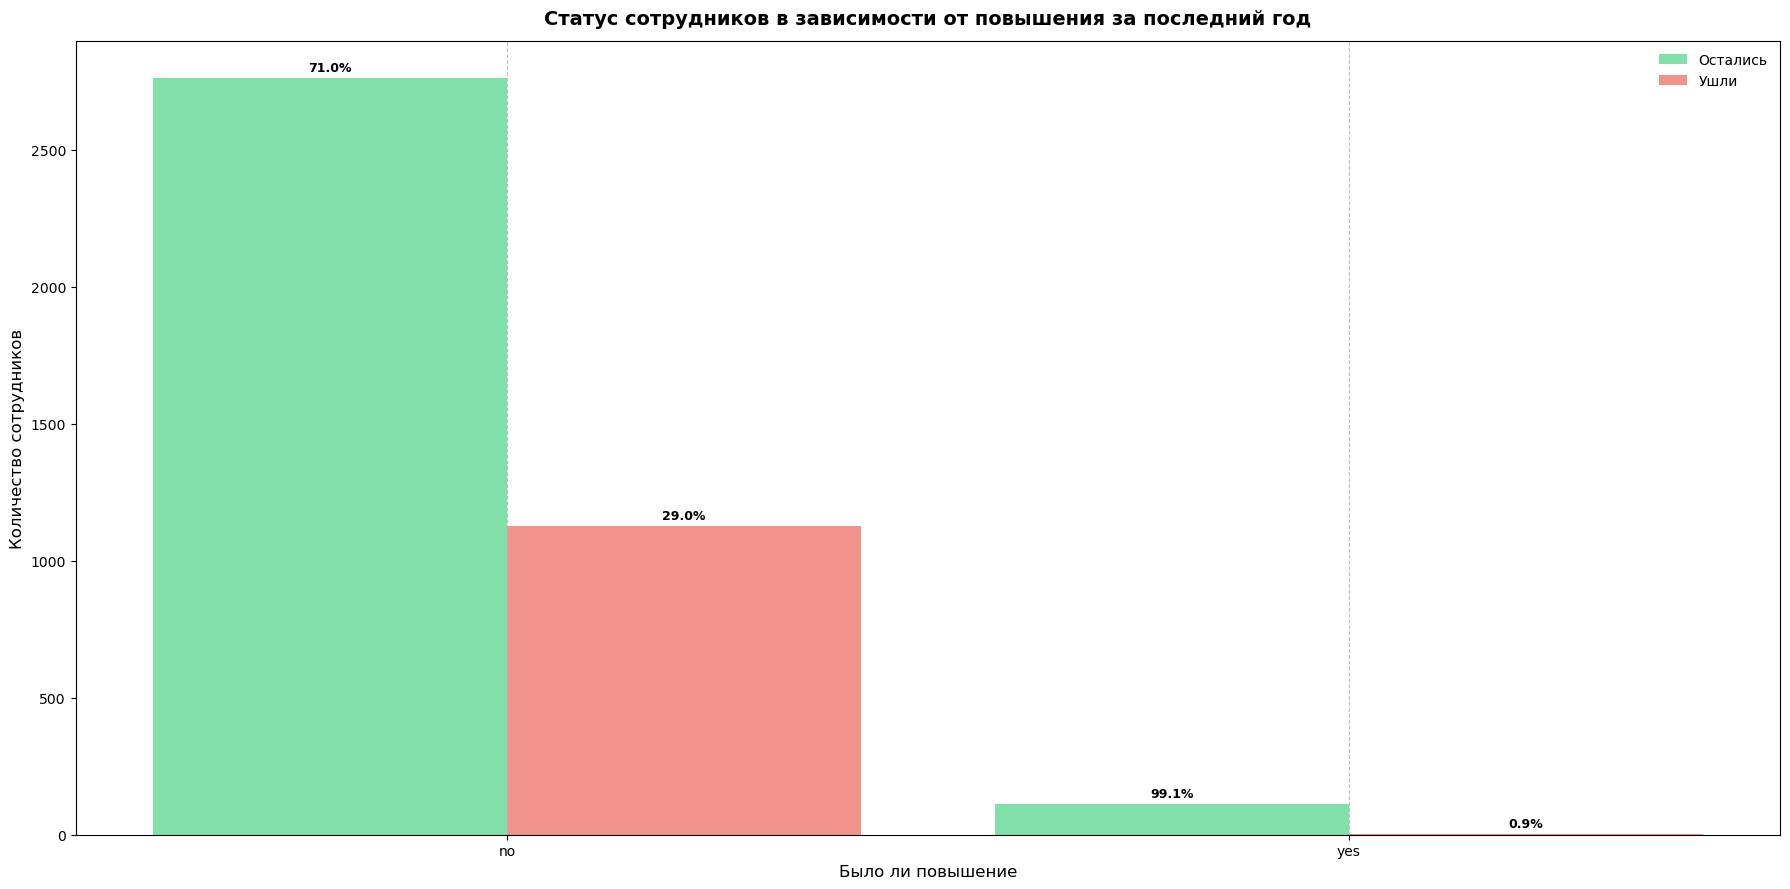

In [130]:
plot_quit_grouped_bars(train,
    category_col = "last_year_promo",
    title = "Статус сотрудников в зависимости от повышения за последний год",
    x_label = "Было ли повышение")

- Большинство сотрудников не получали повышения
- Повышение почти исключает вероятность покидания компании сотрудником

Есть смысл чаще мотивировать сотрудников, давая им незначительные повышения, как одну из стратегий удержания человеческого капитала в компании. При этом ключевых сотрудников стоит чаще повышать чтобы снизить риски ухода критически важных кадров.

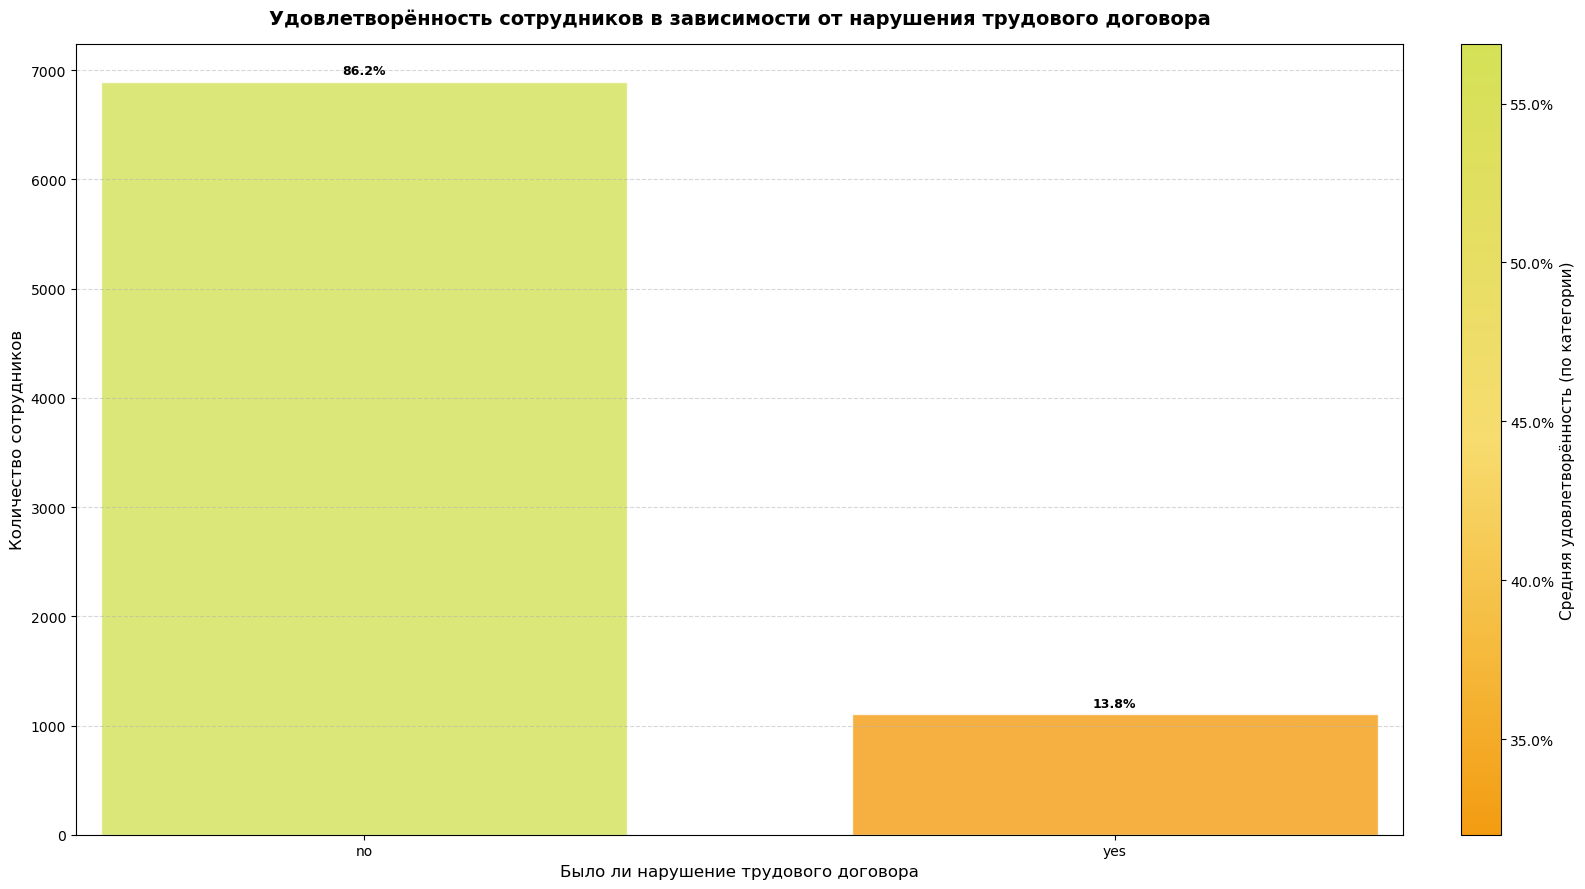

In [131]:
plot_ordered_category_bars(train,
    category_col = "last_year_violations",
    ordered_categories = ["no", "yes"],
    title = "Удовлетворённость сотрудников в зависимости от нарушения трудового договора",
    x_label = "Было ли нарушение трудового договора")

- Нарушивших трудовой договор более чем в 6 раз меньше
- Удовлетворённость работой нарушивших трудовой договор значительно меньше, чем у остальных сотрудников

Можно предположить, что сотрудники, неудовлетворённые своей работой склонны нарушать трудовой договор.

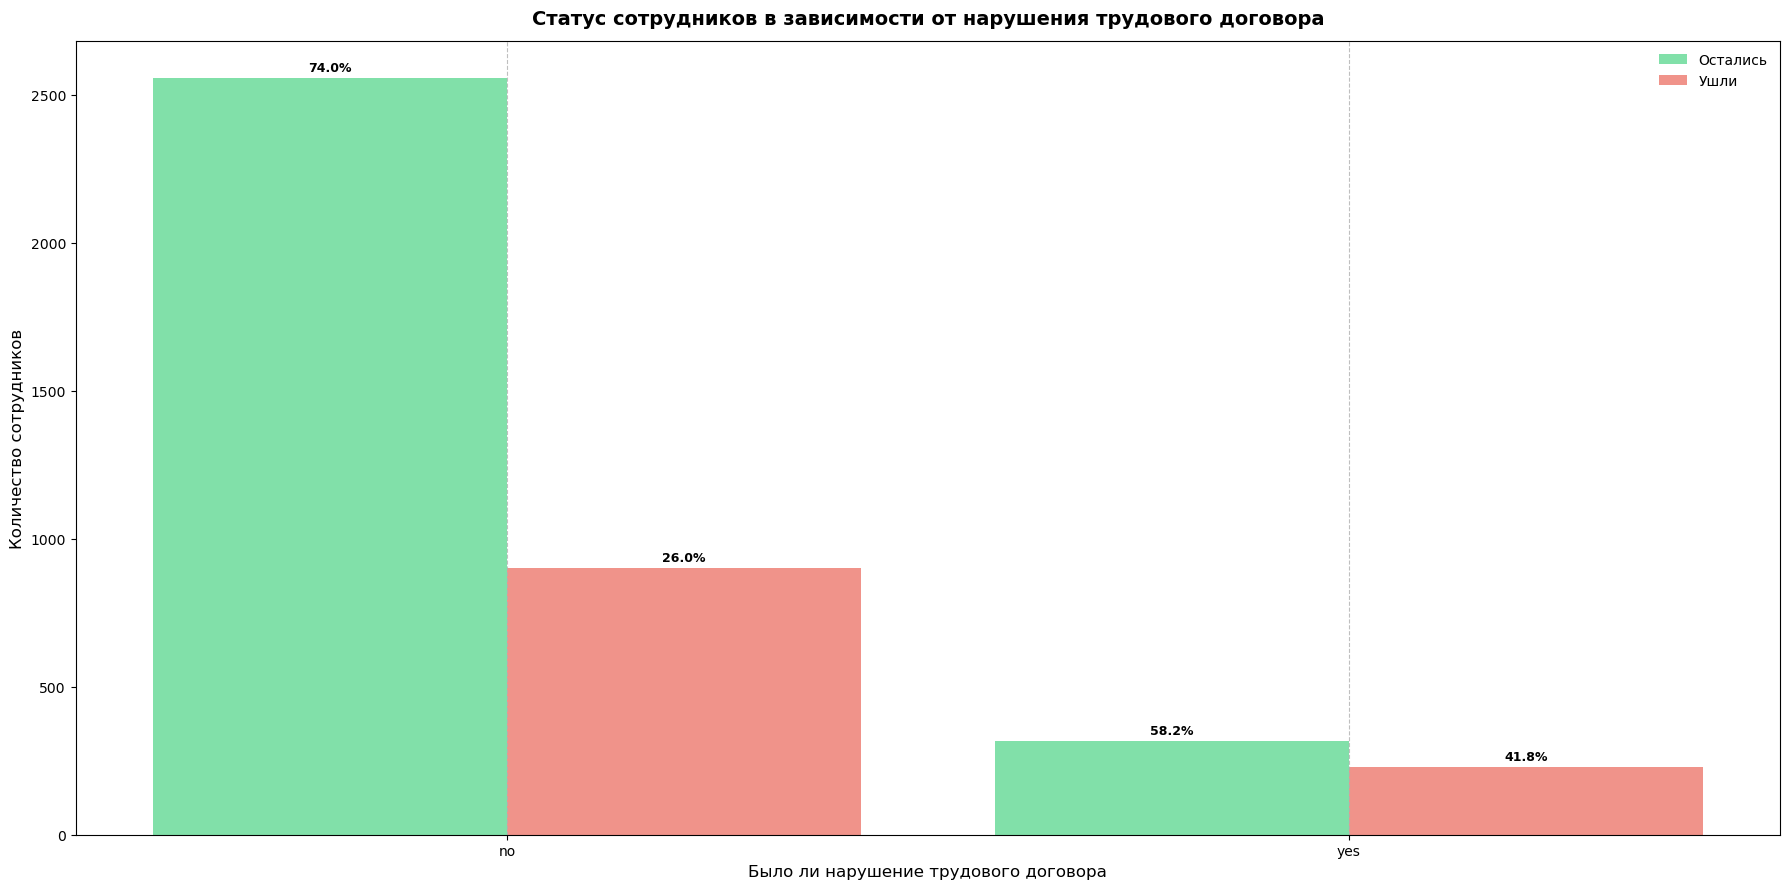

In [132]:
plot_quit_grouped_bars(train,
    category_col = "last_year_violations",
    title = "Статус сотрудников в зависимости от нарушения трудового договора",
    x_label = "Было ли нарушение трудового договора")

- Сотрудники, нарушившие трудовой договор почти в 2 раза чаще покидали компанию

HR отделу стоит внимательнее изучить причинно-следственную связь между нарушением трудового договора и удовлетворённостью рабочим местом сотрудников компании. Появилась гипотеза, что низкая удовлетворённость работой в компании может быть причиной нарушения трудового договора и последующего покидания рабочего места в некоторых случаях

### Проверим гипотезу о совпадании распределений численных признаков в тестовой и обучабщих выборках

In [133]:
alpha = 0.05
print("H0: Для каждой числовой фичи средние в train и test равны.")
print("H1: Средние различаются (двусторонний Welch t-test); alpha = 0.05")

exclude_cols = {"id"}

num_cols_train = set(train.select_dtypes(include=[np.number]).columns)
num_cols_test = set(test.select_dtypes(include=[np.number]).columns)
common_numeric = sorted((num_cols_train & num_cols_test) - exclude_cols)

results = []

for col in common_numeric:
    a = pd.to_numeric(train[col], errors="coerce")
    b = pd.to_numeric(test[col], errors="coerce")

    res = ttest_ind(a, b, equal_var=False, nan_policy="omit")

    results.append({
        "feature": col,
        "train_mean": float(np.nanmean(a)),
        "test_mean": float(np.nanmean(b)),
        "t_stat": float(res.statistic),
        "p_value": float(res.pvalue),
        "reject_H0": bool(res.pvalue < alpha)
    })

results_df = pd.DataFrame(results).sort_values("p_value").reset_index(drop=True)
display(results_df)

H0: Для каждой числовой фичи средние в train и test равны.
H1: Средние различаются (двусторонний Welch t-test); alpha = 0.05


feature    train_mean    test_mean    t_stat   p_value  \
0  job_satisfaction_rate      0.533995      0.54878 -2.433363  0.015002   
1  supervisor_evaluation      3.475625      3.52650 -2.037454  0.041689   
2       employment_years      3.710000      3.66650  0.685529  0.493062   
3                 salary  33866.250000  34066.80000 -0.523468  0.600687   

   reject_H0  
0       True  
1       True  
2      False  
3      False

Ранее в ходе исследования графиков были замечены эти особенности данных. Сейчас их подтвердили

### Выводы EDA

**Промежуточный вывод**:

Провели ознакомление с данными сотрудников, значительных выбросов и аномалий найдено не было, сделали выводы о влиянии признаков на целевые показатели. Пришли к выводу, что распределения оценок руководства и удовлетворённости работы могут отличаться на тестовой и обучающей выборках. Для остальных численных признаков всё хорошо.

Замечания по связи с удовлетворённостью и вероятностью продолжения работы сотрудников:

- Сотрудники реже увольняются после 4 лет работы в компании
- Оценки руководства выше среднего позитивно влияют на удовлетворённость работой сотрудников
- Сотрудникам с высокой удовлетворённостью рабочим местом можно не повышать ЗП т.к. они с высокой вероятностью останутся. При этом недовольные сотрудники с ЗП ниже 40_000 скорее всего уйдут
- Важно следить за тем, чтобы удовлетворённость сотрудника работой оставалась выше 50% т.к. это резко понижает шансы ухода
- Значительных различий в комфортности работы в различных департаментах не наблюдается
- Стоит обратить внимание на текучку кадров в отделе продаж
- Технологический отдел по численности сотрудников находится на втором месте и при этом имеет наименьшую среднюю удовлетворённость сотрудников. Это может порождать повышенные риски для операционной деятельности компании. HR оделу стоит детальнее исследовать причины неудовлетворённости сотрудников в этом отделе.
- Стоит лучше продумать процесс адаптации и отбора новых сотрудников т.к. среди них больше недовольных работой людей
- Сотрудникам стоит давать более сложные задачи т.к. это понижает вероятность ухода и одновременно может повысить производительность труда
- Появилась гипотеза, что низкая удовлетворённость работой в компании может быть причиной нарушения трудового договора и последующего покидания рабочего места в некоторых случаях. HR отделу стоит детальнее изучить этот процес в динамике
- Есть смысл чаще мотивировать сотрудников, давая им незначительные повышения, как одну из стратегий удержания человеческого капитала в компании
- Ключевых сотрудников стоит регулярно поощрять повышениями для снижения риска их ухода до минимума

## Корреляционный анализ

### Корреляционная матрица

Для начала построим кореляционную матрицу в виде тепловой карты.

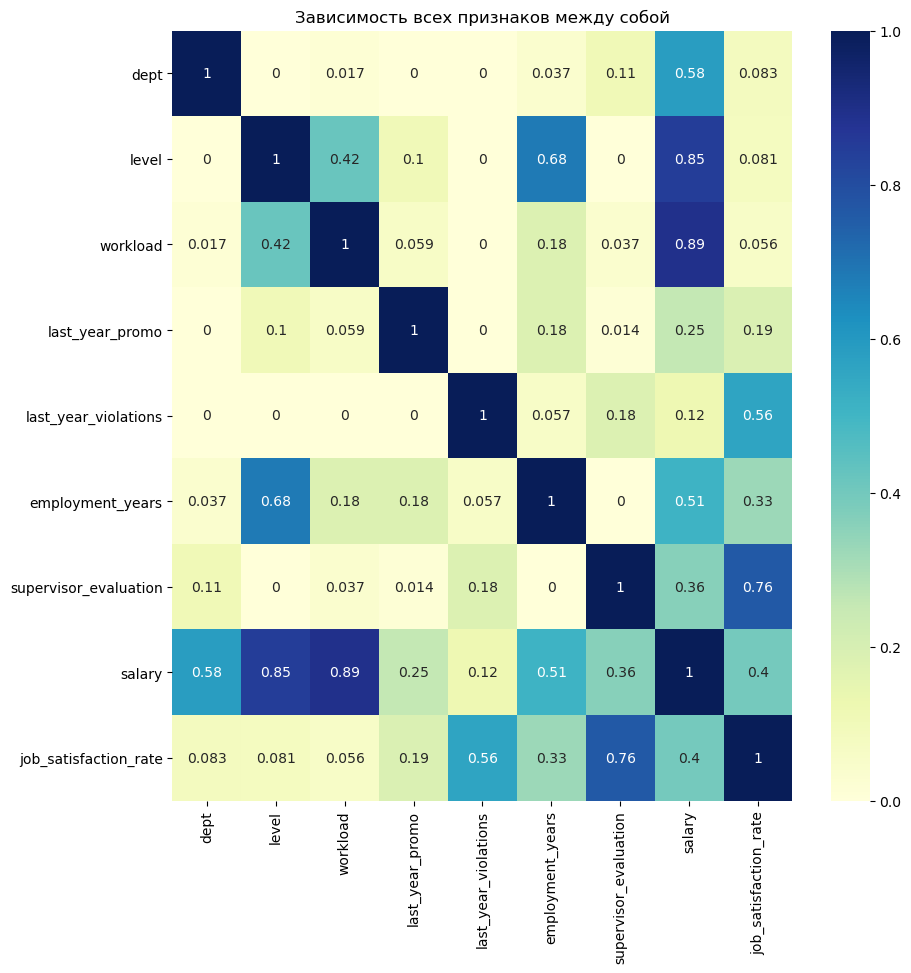

In [134]:
float_columns = X_train_js.select_dtypes(include = ["float"]).columns.tolist()
fig, ax = plt.subplots(figsize=(10,10))  
phi_k = X_train_js.drop("id", axis = 1).phik_matrix(interval_cols = float_columns)
sns.heatmap(phi_k, cmap = "YlGnBu", annot = True)
ax.set_title("Зависимость всех признаков между собой")
plt.show()

Заметна сильная связь между нагрузкой, опытом и заработной платой сотрудников. Т.к. категориальные признаки незначительно связаны между собой и выявлена связь с количественным, не будем удалять признаки. Стоило бы удалить, если бы оба признака оказались количественными

### VIF (коэффициент инфляции дисперсии)

Оценим мультиколлинеарность каждого не содержащего пропусков численного признака в данных при помощи рассчёта коэффициента инфляции дисперсии

In [135]:
numeric_columns = X_train_js.select_dtypes(include = ["number"]).columns.tolist()
X_train_js[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employment_years       4000 non-null   int32  
 1   supervisor_evaluation  4000 non-null   int32  
 2   salary                 4000 non-null   int32  
 3   job_satisfaction_rate  4000 non-null   float64
 4   id                     4000 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 93.9 KB


In [136]:
complete_data = X_train_js[X_train_js["job_satisfaction_rate"].notna()]
X = add_constant(complete_data[numeric_columns])
VIFs = pd.DataFrame()
VIFs["Variable"] = X.columns
VIFs["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

display(VIFs.sort_values(by = "VIF", ascending = False))

Variable        VIF
0                  const  23.150205
4  job_satisfaction_rate   2.093744
2  supervisor_evaluation   2.002001
1       employment_years   1.358496
3                 salary   1.275286
5                     id   1.000208

Исходя из корреляционной матрицы и анализа VIF делаем вывод, что мультиколлинеарность в количественных данных отсутствует. Наиболее скоррелированной с удовлетворённостью работой является оценка руководителя.

Заметим также, что наиболее скоррелированы с уходом из компании стаж и удовлетворённость рабочим местом сотрудников. При этом связь удовлетворённости и вероятности ухода, как заметили ранее в EDA, нелинейна.

## Построение пайплайна регрессии

### Подготовка данных

На данном этапе в подготовке данных к ML нужно учитывать, что в данных могут присутствовать некорректные категории. Например, символ пробела, встреченный во время предобработки или иные. Для обработки таких значениё без искажения предсказаний будем игнорировать такие значения и присваивать им нулевые веса.

In [137]:
y_train = X_train_js["job_satisfaction_rate"]
X_train = X_train_js.drop(["id", "job_satisfaction_rate"], axis = 1)

ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", "workload"]
numeric_columns = X_train.select_dtypes(include = ["number"]).columns.tolist()

cat_ohe_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("ohe", OneHotEncoder(drop = "first",
                          handle_unknown = "ignore"))
])

In [138]:
cat_ord_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown = "use_encoded_value",
                           unknown_value = -1))
])

In [139]:
num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "mean")),
    ("scale", MinMaxScaler())
])

data_preprocessor = ColumnTransformer(
    transformers=[
        ("cat_ohe", cat_ohe_pipe, ohe_columns),
        ("cat_ord", cat_ord_pipe, ord_columns),
        ("num", num_pipe, numeric_columns),
    ],
    remainder="passthrough"
)

### Cоздадим итоговый пайплайн регрессии

ETA обучения ~ 2 минуты

In [140]:
regress_pipe = Pipeline([
    ("preprocessor", data_preprocessor),
    ("models", LinearRegression(n_jobs = -1))
])

param_grid = [
    {
        'models': [LinearRegression(n_jobs = -1)],
        'preprocessor__num__scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), 'passthrough']  
    },
    {
        "models": [KNeighborsRegressor(n_jobs = -1)],
        "models__n_neighbors": range(2, 7),
        "models__weights": ["uniform", "distance"],
        "models__algorithm": ["ball_tree", "kd_tree"],
        "models__leaf_size": range(2, 51, 3),
        "models__metric": ["euclidean", "manhattan"],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]   
    },
    {
        "models": [ElasticNet(
            random_state=RANDOM_STATE
        )],
        "models__alpha": [.5, 1, 2, 5, 10],
        "models__l1_ratio": [.4, .5, .6],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]  
    },
    {
        "models": [SVR()],
        "models__C": [1, 2, 4, 8, 16, 32],
        "models__kernel": ["linear", "poly", "rbf", "sigmoid"],
        "models__degree": [2, 3, 4, 5],
        "models__gamma": ["scale", "auto"],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]  
    },
    {
        "models": [DecisionTreeRegressor(
            random_state=RANDOM_STATE
        )],
        "models__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "models__max_depth": range(2, 11),
        "models__min_samples_split": range(2, 10),
        "models__min_samples_leaf": range(2, 51, 2),
        "models__max_features": ["sqrt", "log2"],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]  
    },
    {
        "models": [DummyRegressor()],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]  
    }
]

def smape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype = float)
    y_pred = np.asarray(y_pred, dtype = float)
    denom = np.abs(y_true) + np.abs(y_pred)
    ratio = np.where(denom == 0.0, 0.0, np.abs(y_true - y_pred) / (denom / 2.0))
    return 100.0 * np.sum(ratio) / len(y_true)

smape_scorer = make_scorer(smape, greater_is_better = False) 

In [141]:
randomized_search = RandomizedSearchCV(
    regress_pipe, 
    param_grid,
    n_iter = 250,
    cv = 3,
    scoring = smape_scorer,
    random_state = RANDOM_STATE,
    n_jobs = -1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_ohe',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('cat_ord',
                                                                               Pipeline(steps=[('impute',...
                                         'models__min_samples_leaf': range(2, 51, 2),
                                         'models__min_samples_split': range(2, 10),
                                         'preprocessor__num__scale': [StandardScaler(),
                                                                      MinMaxScaler(),
                                                                      RobustScaler(),
                                                                      MaxAbsScaler(),
                                                                      'passthrough']},
                                        {'models': [DummyRegressor()],
                                         'preprocessor__num__scale': [StandardScaler(),
                                                                      MinMaxScaler(),
                                                                      RobustScaler(),
                                                                      MaxAbsScaler(),
                                                                      'passthrough']}],
                   random_state=1,
                   scoring=make_scorer(smape, greater_is_better=False))

### Оценка качества регрессии

Сопоставим индексы признаков тестовой выборки.

In [142]:
test_regress = pd.merge(X_test, y_test_regress, on = "id")
X_test_regress = test_regress.drop(["id", "job_satisfaction_rate"], axis = 1)
y_test_regress = test_regress["job_satisfaction_rate"]

Для задачи выбрана метрика SMAPE по желанию заказчика.

In [143]:
display("Лучшая модель и её параметры:", randomized_search.best_estimator_)
display("Метрика лучшей модели на тренировочной выборке:", abs(randomized_search.best_score_))

'Лучшая модель и её параметры:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ohe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['level', 'workload']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', SVR(C=1, degree=4))])

'Метрика лучшей модели на тренировочной выборке:'

15.254545802638363

In [144]:
display(f"Метрика SMAPE на тестовой выборке: {abs(smape_scorer(randomized_search.best_estimator_, X_test_regress, y_test_regress))}")

'Метрика SMAPE на тестовой выборке: 14.562765754454889'

In [145]:
randomized_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat_ohe',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['dept', 'last_year_promo',
                                     'last_year_violations']),
                                   ('cat_ord',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ord',
                                                     OrdinalEncoder(handle_

### Вывод подбора модели регрессии

**Наилучшей** моделью оказалась **модель опорных векторов** с параметром C = 1 и нелинейным ядром 4 степени **SMAPE близок к 15** на тестовой выборке. Такое значение точности выглядит правдоподобным и удовлетворительным. Модель адекватна т.к. она превосходит DummyRegressor

### Анализ важности признаков регрессии

Т.к. лучшей оказалась нелинейная модель, используем метод перестановки признаков для анализа их значимости. ETA рассчёта ~2 минуты

In [146]:
r = permutation_importance(randomized_search.best_estimator_, X_test_regress, y_test_regress,
                           n_repeats = 30,
                           random_state = RANDOM_STATE)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        display(f"{X_test_regress.columns.to_list()[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

'salary  1.613 +/- 0.040'

'level   1.097 +/- 0.029'

'supervisor_evaluation1.024 +/- 0.025'

'workload0.647 +/- 0.014'

'employment_years0.246 +/- 0.008'

'dept    0.121 +/- 0.005'

'last_year_violations0.102 +/- 0.004'

'last_year_promo0.026 +/- 0.002'

Больше всего на уровень удовлетворённости сотрудника влияют:
1) Уровень заработной платы
2) Опыт работы сотрудника
3) Оценка эффективности сотрудника руководством

Меньше всего на удовлетворённость влияют:
1) Повышение за последний год
2) Нарушения трудового договора за последний год
3) Принадлежность к департаменту

### Выводы построения модели оценки удовлетворённости сотрудников

Лучше всего с задачей регрессии справилась нелинейная модель. Как видно из оценки важности признаков, наиболее важным для удовлетворённости работой в компании сотрудников оказался размер заработной платы. На этапе EDA мы убедились в отсутствии линейной зависимости этих признаков. По этой причине логично, что нелинейная модель оказалась лучшей. Ей хватило обобщающей силы для выделения основной зависимости с заработной платой.

### Создание personality уволившегося сотрудника 

Частично, мы уже составили "портрет уволившегося сотрудника" в общем блоке EDA. Создадим финальный образ.

In [147]:
quit_mean_salary = train.query("quit == 'yes'")["salary"].mean()
stayed_mean_salary = train.query("quit == 'no'")["salary"].mean()

display(f"Средняя ЗП ушедших сотрудников: ~{round(quit_mean_salary)}",
    f"Средняя ЗП оставшихся сотрудников: ~{round(stayed_mean_salary)}")

'Средняя ЗП ушедших сотрудников: ~23885'

'Средняя ЗП оставшихся сотрудников: ~37702'

"Портрет уволившегося сотрудника":

- Работает в компании менее 4 лет
- Имеет оценку руководилетя по пятибальной системе ниже 3
- Имеет коэффициент удовлетворённости работой ниже 0.6 и при этом ЗП ниже 40_000 у.е.
- Работает в технологическом отделе либо отделе маркетинга или продаж
- Имеет малый профессиональный опыт
- Недогружен работой
- Не был повышен за последний год
- Нарушал трудовой договор за последний год

## Модель классификации

### EDA для модели классификации

### Изучение связи удовлетворённости и ухода с работы

Добавим предсказания удовлетворённостью рабочим местом в набор признаков

In [148]:
tmp = X_train_q.drop(["id", "quit"], axis = 1)
X_train_q["job_satisfaction_rate"] = randomized_search.best_estimator_.predict(tmp)
X_train_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     4000 non-null   int64   
 1   dept                   4000 non-null   category
 2   level                  4000 non-null   category
 3   workload               4000 non-null   category
 4   employment_years       4000 non-null   int64   
 5   last_year_promo        4000 non-null   category
 6   last_year_violations   4000 non-null   category
 7   supervisor_evaluation  4000 non-null   int64   
 8   salary                 4000 non-null   int64   
 9   quit                   4000 non-null   category
 10  job_satisfaction_rate  4000 non-null   float64 
dtypes: category(6), float64(1), int64(4)
memory usage: 180.6 KB


Ранее уже была выявлена и проанализирована связь между удовлетворённостью работой и уходом сотрудников. Напомним:

In [149]:
data = X_train_q.dropna(subset = ["quit", "job_satisfaction_rate"])
le = LabelEncoder()
y_train_enc = le.fit_transform(data["quit"])
data["quit_enc"] = y_train_enc

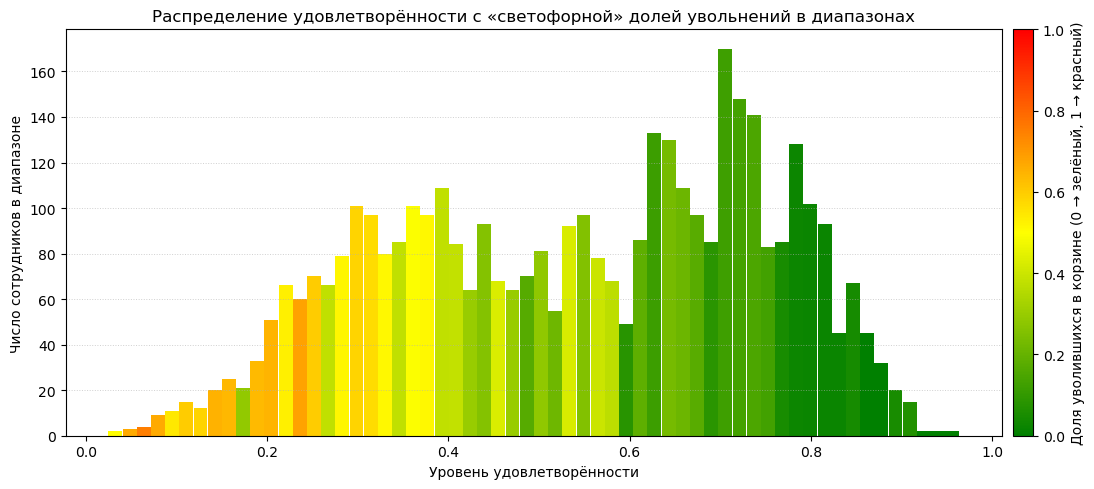

In [150]:
x_min, x_max = data["job_satisfaction_rate"].min(), data["job_satisfaction_rate"].max()
bins = np.linspace(x_min, x_max, NUM_BINS + 1)
bin_widths = np.diff(bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

bin_idx = np.digitize(data["job_satisfaction_rate"].to_numpy(), bins, right = False) - 1
bin_idx = np.clip(bin_idx, 0, NUM_BINS - 1)

counts = np.zeros(NUM_BINS, dtype = int)
quit_mean = np.full(NUM_BINS, np.nan, dtype = float)

for i in range(NUM_BINS):
    mask = (bin_idx == i)
    if np.any(mask):
        counts[i] = mask.sum()
        quit_mean[i] = data.loc[mask, "quit_enc"].mean()

traffic_cmap = LinearSegmentedColormap.from_list("traffic", ["green", "yellow", "red"], N = 256)
norm = Normalize(vmin = 0.0, vmax = 1.0)

colors = traffic_cmap(norm(np.nan_to_num(quit_mean, nan = 0.5)))  

plt.figure(figsize = (12, 5))
plt.bar(bin_centers, counts, width = bin_widths * 0.98, color = colors, edgecolor = "none")

plt.xlabel("Уровень удовлетворённости")
plt.ylabel("Число сотрудников в диапазоне")
plt.title("Распределение удовлетворённости с «светофорной» долей увольнений в диапазонах")
plt.grid(axis = "y", linestyle = ":", linewidth = 0.7, alpha = 0.6)

sm = plt.cm.ScalarMappable(norm = norm, cmap = traffic_cmap)
sm.set_array([])
cbar = plt.colorbar(sm, pad = 0.01)
cbar.set_label("Доля уволившихся в корзине (0 → зелёный, 1 → красный)")

plt.tight_layout()
plt.show()

- **Удовлетворённость** сотрудника рабочим местом **напрямую влияет на прололжение его работы в компании**
- График распределения частот удовлетворённости сотрудников мультимодален: количество неудовлетворённых работой сотрудников увеливичается до ~0.38 и далее падает до нейтрального уровня удовлетворённости. После нейтрального уровня удовлетворённость сотрудников резко повышается до ~0.7 и далее так же падает
- Чаще всего сотрудники умеренно удовлетворены своим рабочим местом

## Построение пайплайна классификации

### Подготовим данные к обучению модели

Добавим в тестовую выборку предсказания удовлетворённости работой сотрудников и закодирцем целевой признак

In [151]:
test_classif = pd.merge(X_test, y_test_classif, on = "id")
test_classif["job_satisfaction_rate"] = randomized_search.best_estimator_.predict(X_test.drop(["id"], axis = 1))
X_test_classif = test_classif.drop(["id", "quit"], axis = 1)
y_test_classif = le.transform(test_classif["quit"])

## Корреляционный анализ

### Корреляционная матрица

Для проверки отсутствия мультиколлинеарнгости заново построим корреляционную матрицу

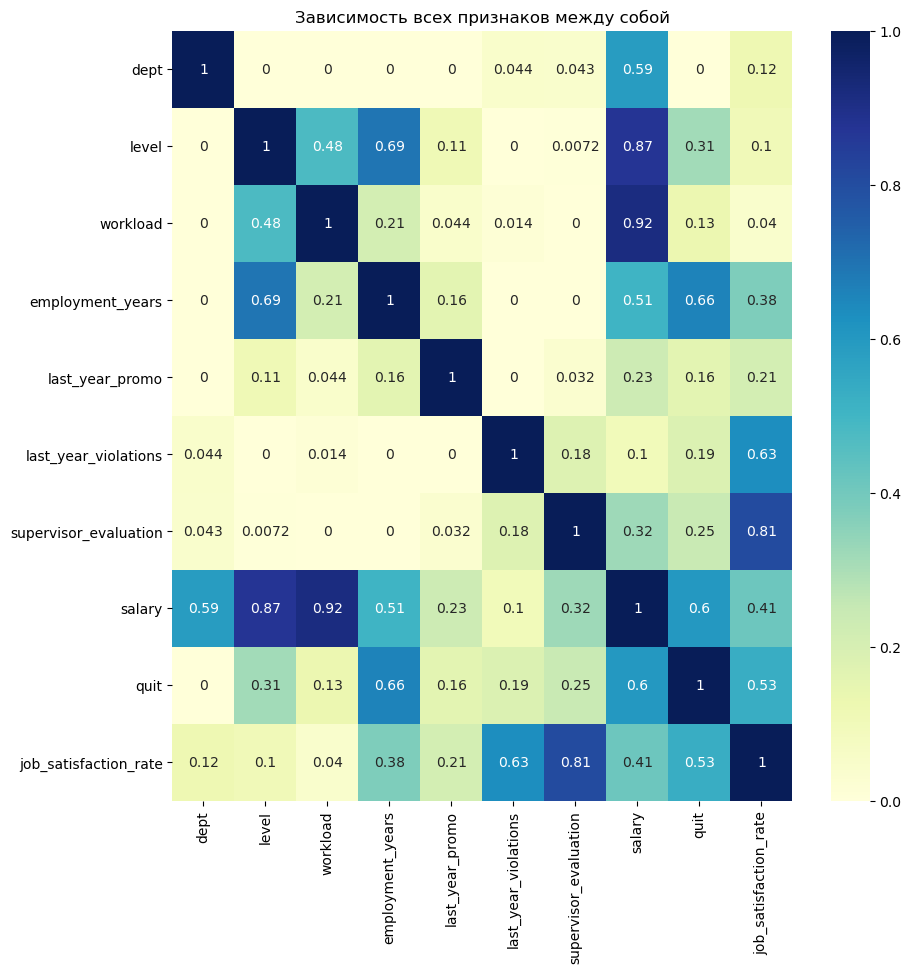

In [152]:
float_columns = X_train_q.select_dtypes(include = ["float"]).columns.tolist()
fig, ax = plt.subplots(figsize=(10,10))  
phi_k = X_train_q.drop("id", axis = 1).phik_matrix(interval_cols = float_columns)
sns.heatmap(phi_k, cmap = "YlGnBu", annot = True)
ax.set_title("Зависимость всех признаков между собой")
plt.show()

Для нового, добавленного предыдущей моделью регрессии, признака мультиколинеарность заметна только с оценкой руководителя. Т.к. у нового признака связь с целевым "quit" выше, а так же потому что в статистическом тесте удалось опровергнуть схожесть распределения, удалим из набора признак оценки руководителя.

In [153]:
X_train_q = X_train_q.drop("supervisor_evaluation", axis = 1)
X_test_classif = X_test_classif.drop("supervisor_evaluation", axis = 1)

Закодируем целевой признак обученным ранее кодировщиком

In [154]:
X_train_q["quit"] = le.transform(X_train_q["quit"])

### Cоздадим итоговый пайплайн классификации

Выберем рандомным поиском наилучшую модель классификации, её гиперпараметры и улучшим её качество адаптивным бустингом. ETA обучения ~ 7 минут.

Напомним, есть дисбаланс классов:

In [155]:
X_train_q["quit"].value_counts()

0    2872
1    1128
Name: quit, dtype: int64

Сбалансируем классы оверсемплингом минорного класса.

In [156]:
y_train = X_train_q["quit"]
X_train = X_train_q.drop(["id", "quit"], axis = 1)

ohe_columns = ["dept", "last_year_promo", "last_year_violations"]
ord_columns = ["level", "workload"]
numeric_columns = X_train.select_dtypes(include = ["number"]).columns.tolist()

cat_ohe_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("ohe", OneHotEncoder(drop = "first",
                          handle_unknown = "ignore"))
])

cat_ord_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown = "use_encoded_value",
                           unknown_value = -1))
])

target_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("trg", OrdinalEncoder(handle_unknown = "use_encoded_value",
                           unknown_value = -1))
])

num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy = "mean")),
    ("scale", MinMaxScaler())
])

data_preprocessor = ColumnTransformer(
    transformers=[
        ("cat_ohe", cat_ohe_pipe, ohe_columns),
        ("cat_ord", cat_ord_pipe, ord_columns),
        ("num", num_pipe, numeric_columns),
    ],
    remainder="passthrough"
)

classif_pipeline = Pipeline([
    ("preprocessor", data_preprocessor),
    ("oversampler", RandomOverSampler(random_state = RANDOM_STATE)),
    ("classifier", AdaBoostClassifier(random_state = RANDOM_STATE, n_estimators = 10))
])

param_distributions = [
    {
        "classifier__base_estimator": [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        "classifier__base_estimator__max_depth": [1, 3, 5],
        "classifier__base_estimator__min_samples_leaf": [1, 5, 10],
        "classifier__learning_rate": [.5, 1, 2],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]
    },
    {
        "classifier__base_estimator": [LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 1000, random_state = RANDOM_STATE)],
        "classifier__base_estimator__C": [.1, .5, 1, 2, 5, 10],
        "classifier__base_estimator__l1_ratio": [0.1, 0.5, 0.9],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]
    },
    {
        "classifier__base_estimator": [SVC(probability = True, kernel = 'rbf', random_state = RANDOM_STATE, cache_size = 4096)],
        "classifier__base_estimator__C": [.1, .5, 1, 2, 5, 10],
        "classifier__base_estimator__degree": range(1, 7),
        "classifier__base_estimator__gamma": ["scale", .1, 1],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]
    },
    {
        "classifier__base_estimator": [DummyClassifier(random_state = RANDOM_STATE)],
        "preprocessor__num__scale": [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), "passthrough"]
    }
]

search = HalvingRandomSearchCV(
    estimator = classif_pipeline,
    param_distributions = param_distributions,
    cv = 3,
    scoring = "roc_auc",
    n_jobs = -1,
    random_state = RANDOM_STATE
)

search.fit(X_train, y_train)

HalvingRandomSearchCV(cv=3,
                      estimator=Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('cat_ohe',
                                                                                  Pipeline(steps=[('impute',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('ohe',
                                                                                                   OneHotEncoder(drop='first',
                                                                                                                 handle_unknown='ignore'))]),
                                                                                  ['dept',
                                                                                   'last_year_promo',
                                                                                   'last_year_violations']),
                                                                                 ('cat_ord',
                                                                                  Pipeline(steps=[('imput...
                                            'classifier__base_estimator__gamma': ['scale',
                                                                                  0.1,
                                                                                  1],
                                            'preprocessor__num__scale': [StandardScaler(),
                                                                         MinMaxScaler(),
                                                                         RobustScaler(),
                                                                         MaxAbsScaler(),
                                                                         'passthrough']},
                                           {'classifier__base_estimator': [DummyClassifier(random_state=1)],
                                            'preprocessor__num__scale': [StandardScaler(),
                                                                         MinMaxScaler(),
                                                                         RobustScaler(),
                                                                         MaxAbsScaler(),
                                                                         'passthrough']}],
                      random_state=1, scoring='roc_auc')

### Оценка качества классификации

Для задачи выбрана метрика ROC AUC по желанию заказчика

In [157]:
display("Лучшая модель и её параметры:", search.best_estimator_)
display("Метрика лучшей модели на тренировочной выборке:", search.best_score_)

'Лучшая модель и её параметры:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ohe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['employment_years', 'salary',
                                                   'job_satisfaction_rate'])])),
                ('oversampler', RandomOverSampler(random_state=1)),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                          min_samples_leaf=10,
                                                                          random_state=1),
                                    learning_rate=0.5, n_estimators=10,
                                    random_state=1))])

'Метрика лучшей модели на тренировочной выборке:'

0.911034710721513

In [158]:
y_test_classif_pred = search.best_estimator_.predict_proba(X_test_classif)[:,1]

display(f"Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_classif, y_test_classif_pred)}")

'Метрика ROC-AUC на тестовой выборке: 0.917757536695707'

In [159]:
search.best_estimator_.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('cat_ohe',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['dept', 'last_year_promo',
                                     'last_year_violations']),
                                   ('cat_ord',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ord',
                                                     OrdinalEncoder(handle_

### Вывод подбора модели классификации

Лучше всего подошла модель дерева решений усиленгная адаптивным бустингом с 10 слабыми учениками. В дереве подобраны гиперпараметры глубины 5 и размера листа 10. Модель адекватна т.к. показала себя лучше чем DummyClassifier

## Итоговые выводы

### Задача

Была поставлена **задача** построения модели для **предсказания удовлетворённости сотрудников** и **предсказания их ухода из компании**.

### Подготовка данных

- Импортированы модули, фреймворки и библиотеки
- Проверено наличие явных дубликатов
- Преобразованы типы данных к наиболее подходящим
- Найдены и устранены пропуски в данных
- Данные проверены на наличие описок
- Данные обхединены в один набор для EDA

### EDA

- Проведено детальное исследование всех признаков во всех выборках
- Сделаны выводы о допустимости использования предоставленных данных для обучения моделей
- Обнаружен дисбаланс классов для целевого категориального признака
- Проведено детальное исследование признаков тестовой выборки в разрезе целевых признаков

Замечания по связи с удовлетворённостью и вероятностью продолжения работы сотрудников:

- Сотрудники реже увольняются после 4 лет работы в компании
- Оценки руководства выше среднего позитивно влияют на удовлетворённость работой сотрудников
- Сотрудникам с высокой удовлетворённостью рабочим местом можно не повышать ЗП т.к. они с высокой вероятностью останутся. При этом недовольные сотрудники с ЗП ниже 40_000 скорее всего уйдут
- Важно следить за тем, чтобы удовлетворённость сотрудника работой оставалась выше 50%, т.к. это резко понижает шансы ухода
- Значительных различий в комфортности работы в различных департаментах не наблюдается

### Поиск модели

Для поиска лучших моделей были **опробованы 5 алгоритмов регрессии** и **3 алгоритма классификации с адаптивным бустингом** **с разными наборами** целесообразных **гиперпараметров** **случайным** образом.

### Лучшие модели

В качестве **лучшей модели предсказания удовлетворённости сотрудника** была получена модель **опорных векторов** с метрикой SMAPE близкой к **15**.

В качестве **лучшей модели предсказания ухода сотрудника** была получена модель **дерева решений** с метрикой ROC AUC близкой к **0.92**.

### **Идеи удержания сотрудников**

- Стоит обратить внимание на текучку кадров в отделе продаж
- Технологический отдел по численности сотрудников находится на втором месте и при этом имеет наименьшую среднюю удовлетворённость сотрудников. Это может порождать повышенные риски для операционной деятельности компании. HR оделу стоит детальнее исследовать причины неудовлетворённости сотрудников в этом отделе.
- Стоит лучше продумать процесс адаптации и отбора новых сотрудников т.к. среди них больше недовольных работой людей
- Сотрудникам стоит давать более сложные задачи т.к. это понижает вероятность ухода и одновременно может повысить производительность труда
- Появилась гипотеза, что низкая удовлетворённость работой в компании может быть причиной нарушения трудового договора и последующего покидания рабочего места в некоторых случаях. HR отделу стоит детальнее изучить этот процес в динамике
- Есть смысл чаще мотивировать сотрудников, давая им незначительные повышения, как одну из стратегий удержания человеческого капитала в компании
- Ключевых сотрудников стоит регулярно поощрять повышениями для минимизации риска их ухода.